In [1]:
import descarteslabs as dl
from pprint import pprint

**Experiment with Descartes Labs API and inventory datasets**

Goal - employ remote sensing technique developed by Stanford Scientists to forecast the landsacpe of poverty.

http://sustain.stanford.edu/predicting-poverty/

Let's see what datasets are available via the Descartes Labs API.


In [19]:
sources = dl.metadata.sources()
pprint (sources)

[{u'product': u'modis:09:CREFL', u'sat_id': u'Terra'},
 {u'product': u'modis:09:CREFL', u'sat_id': u'Aqua'},
 {u'product': u'sentinel-2:L1C', u'sat_id': u'S2A'},
 {u'product': u'sentinel-2:L1C', u'sat_id': u'S2B'},
 {u'product': u'landsat:LE07:PRE:TOAR', u'sat_id': u'LANDSAT_7'},
 {u'product': u'landsat:LE07:PRE:TOAR', u'sat_id': u'Landsat7'},
 {u'product': u'landsat:LT05:PRE:TOAR', u'sat_id': u'LANDSAT_5'},
 {u'product': u'landsat:LT05:PRE:TOAR', u'sat_id': u'Landsat5'},
 {u'product': u'sentinel-3:OLCI_RGB', u'sat_id': u'S3A'},
 {u'product': u'landsat:LC08:PRE:TOAR', u'sat_id': u'LANDSAT_8'},
 {u'product': u'usda:naip:rgbn', u'sat_id': u'NAIP'},
 {u'product': u'sentinel-1:GRD', u'sat_id': u'SENTINEL-1A'},
 {u'product': u'sentinel-1:GRD', u'sat_id': u'SENTINEL-1B'},
 {u'product': u'landsat:LC08:PRE:LaSRC', u'sat_id': u'L8SR'},
 {u'product': u'usda:naip:rgbn:v1', u'sat_id': u'NAIP'},
 {u'product': u'landsat:LC08:01:RT:TOAR', u'sat_id': u'LANDSAT_8'},
 {u'product': u'landsat:LC08:01:T1:T

In [5]:
# Import plotting packages
%matplotlib inline
import matplotlib.pyplot as plt
import shapely.geometry
import cartopy

In [35]:
# Find potential matches
matches = dl.places.find('honduras')
pprint(matches)
# The first one looks good to me, so lets make that our area of interest.
aoi = matches[0]

[{u'bbox': [-89.355961, 12.984225, -82.389137, 17.418722],
  u'id': 85632323,
  u'name': u'Honduras',
  u'path': u'continent:north-america_country:honduras',
  u'placetype': u'country',
  u'slug': u'north-america_honduras'}]


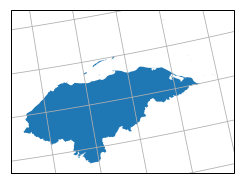

In [44]:
aoi = matches[0]
shape = dl.places.shape(aoi['slug'], geom='low')
bbox = shape['bbox']

# Lets load up the Albers Equal Area projection.
lonlat_crs = cartopy.crs.PlateCarree()
albers = cartopy.crs.AlbersEqualArea(central_latitude=36.0, central_longitude=-105)

fig = plt.figure(figsize=(4, 8))
ax = plt.subplot(projection=albers) # Specify projection of the map here
shp = shapely.geometry.shape(shape['geometry'])

# When adding a geometry in latlon coordinates, specify the latlon projection
ax.add_geometries([shp], lonlat_crs)

# You can set extents in latlon, as long as you specify the projection with `crs`
ax.set_extent((bbox[0], bbox[2], bbox[1], bbox[3]), crs=lonlat_crs)
ax.gridlines(crs=lonlat_crs)
plt.show()

In [31]:
sources = dl.metadata.sources()

In [46]:
import json
feature_collection = dl.metadata.search(products='landsat:LC08:PRE:TOAR', start_time='2017-03-12',
                                        end_time='2015-03-20', limit=10, place=aoi['slug'])

print len(feature_collection['features'])

# print [f['id'] for f in feature_collection['features']]
# f0 = feature_collection['features'][2]

BadRequestError: {
  "error": 400, 
  "message": "failed to create query: {\n  \"bool\" : {\n    \"filter\" : [\n      {\n        \"terms\" : {\n          \"auth_groups\" : [\n            \"public\",\n            \"beta\",\n            \"3d5b5fa78210c94e508a9f81fd6c7f5abfc23e78\"\n          ],\n          \"boost\" : 1.0\n        }\n      },\n      {\n        \"geo_shape\" : {\n          \"geometry\" : {\n            \"shape\" : {\n              \"type\" : \"multipolygon\",\n              \"orientation\" : \"right\",\n              \"coordinates\" : [\n                [\n                  [\n                    [\n                      -87.653503,\n                      13.440056\n                    ],\n                    [\n                      -87.65667,\n                      13.44\n                    ],\n                    [\n                      -87.658195,\n                      13.442972\n                    ],\n                    [\n                      -87.65403,\n                      13.444195\n                    ],\n                    [\n                      -87.652496,\n                      13.442472\n                    ],\n                    [\n                      -87.653503,\n                      13.440056\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.515778,\n                      15.062695\n                    ],\n                    [\n                      -82.51767,\n                      15.060833\n                    ],\n                    [\n                      -82.522446,\n                      15.060917\n                    ],\n                    [\n                      -82.525108,\n                      15.063889\n                    ],\n                    [\n                      -82.521614,\n                      15.0685\n                    ],\n                    [\n                      -82.519302,\n                      15.068444\n                    ],\n                    [\n                      -82.516891,\n                      15.067833\n                    ],\n                    [\n                      -82.515778,\n                      15.062695\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.555,\n                      15.072639\n                    ],\n                    [\n                      -82.558472,\n                      15.070945\n                    ],\n                    [\n                      -82.560081,\n                      15.074139\n                    ],\n                    [\n                      -82.556694,\n                      15.075889\n                    ],\n                    [\n                      -82.555,\n                      15.072639\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.673447,\n                      15.087584\n                    ],\n                    [\n                      -82.678169,\n                      15.08725\n                    ],\n                    [\n                      -82.678055,\n                      15.090972\n                    ],\n                    [\n                      -82.673164,\n                      15.091583\n                    ],\n                    [\n                      -82.673447,\n                      15.087584\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.592499,\n                      15.125055\n                    ],\n                    [\n                      -82.594559,\n                      15.123333\n                    ],\n                    [\n                      -82.596581,\n                      15.126805\n                    ],\n                    [\n                      -82.594002,\n                      15.128195\n                    ],\n                    [\n                      -82.592499,\n                      15.125055\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.582138,\n                      15.132472\n                    ],\n                    [\n                      -82.583969,\n                      15.132305\n                    ],\n                    [\n                      -82.584114,\n                      15.13575\n                    ],\n                    [\n                      -82.580803,\n                      15.136666\n                    ],\n                    [\n                      -82.579803,\n                      15.133528\n                    ],\n                    [\n                      -82.582138,\n                      15.132472\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.716309,\n                      13.35375\n                    ],\n                    [\n                      -87.718109,\n                      13.353416\n                    ],\n                    [\n                      -87.720749,\n                      13.35525\n                    ],\n                    [\n                      -87.716469,\n                      13.356639\n                    ],\n                    [\n                      -87.716309,\n                      13.35375\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.633972,\n                      13.377055\n                    ],\n                    [\n                      -87.635086,\n                      13.375806\n                    ],\n                    [\n                      -87.636665,\n                      13.377111\n                    ],\n                    [\n                      -87.634918,\n                      13.3785\n                    ],\n                    [\n                      -87.633972,\n                      13.377055\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.408836,\n                      13.401472\n                    ],\n                    [\n                      -87.407417,\n                      13.399167\n                    ],\n                    [\n                      -87.405113,\n                      13.39925\n                    ],\n                    [\n                      -87.398781,\n                      13.402056\n                    ],\n                    [\n                      -87.393806,\n                      13.40225\n                    ],\n                    [\n                      -87.389275,\n                      13.397361\n                    ],\n                    [\n                      -87.385948,\n                      13.395638\n                    ],\n                    [\n                      -87.381531,\n                      13.394917\n                    ],\n                    [\n                      -87.380692,\n                      13.392777\n                    ],\n                    [\n                      -87.386696,\n                      13.38825\n                    ],\n                    [\n                      -87.388252,\n                      13.383083\n                    ],\n                    [\n                      -87.38678,\n                      13.375028\n                    ],\n                    [\n                      -87.390587,\n                      13.369917\n                    ],\n                    [\n                      -87.395058,\n                      13.36825\n                    ],\n                    [\n                      -87.402664,\n                      13.37025\n                    ],\n                    [\n                      -87.403969,\n                      13.371555\n                    ],\n                    [\n                      -87.403557,\n                      13.375361\n                    ],\n                    [\n                      -87.405975,\n                      13.374084\n                    ],\n                    [\n                      -87.409142,\n                      13.375861\n                    ],\n                    [\n                      -87.408585,\n                      13.371972\n                    ],\n                    [\n                      -87.415108,\n                      13.370861\n                    ],\n                    [\n                      -87.422058,\n                      13.3585\n                    ],\n                    [\n                      -87.425392,\n                      13.356472\n                    ],\n                    [\n                      -87.428108,\n                      13.360778\n                    ],\n                    [\n                      -87.429054,\n                      13.369111\n                    ],\n                    [\n                      -87.427719,\n                      13.381444\n                    ],\n                    [\n                      -87.42411,\n                      13.393861\n                    ],\n                    [\n                      -87.418083,\n                      13.405945\n                    ],\n                    [\n                      -87.408836,\n                      13.401472\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.557587,\n                      13.364445\n                    ],\n                    [\n                      -87.559586,\n                      13.363389\n                    ],\n                    [\n                      -87.560837,\n                      13.366667\n                    ],\n                    [\n                      -87.558197,\n                      13.367306\n                    ],\n                    [\n                      -87.557587,\n                      13.364445\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.468971,\n                      13.365027\n                    ],\n                    [\n                      -87.472443,\n                      13.365528\n                    ],\n                    [\n                      -87.471497,\n                      13.371056\n                    ],\n                    [\n                      -87.468941,\n                      13.368472\n                    ],\n                    [\n                      -87.468971,\n                      13.365027\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.430527,\n                      13.138333\n                    ],\n                    [\n                      -87.433388,\n                      13.136666\n                    ],\n                    [\n                      -87.43486,\n                      13.14\n                    ],\n                    [\n                      -87.430885,\n                      13.140056\n                    ],\n                    [\n                      -87.430527,\n                      13.138333\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.48661,\n                      13.259916\n                    ],\n                    [\n                      -87.487473,\n                      13.259\n                    ],\n                    [\n                      -87.490692,\n                      13.261639\n                    ],\n                    [\n                      -87.488525,\n                      13.263306\n                    ],\n                    [\n                      -87.48661,\n                      13.259916\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.667053,\n                      13.27575\n                    ],\n                    [\n                      -87.667747,\n                      13.274889\n                    ],\n                    [\n                      -87.668472,\n                      13.278444\n                    ],\n                    [\n                      -87.664558,\n                      13.279028\n                    ],\n                    [\n                      -87.664307,\n                      13.276611\n                    ],\n                    [\n                      -87.667053,\n                      13.27575\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.639969,\n                      13.299945\n                    ],\n                    [\n                      -87.635635,\n                      13.294556\n                    ],\n                    [\n                      -87.62883,\n                      13.293944\n                    ],\n                    [\n                      -87.62558,\n                      13.289917\n                    ],\n                    [\n                      -87.622086,\n                      13.290112\n                    ],\n                    [\n                      -87.619614,\n                      13.292694\n                    ],\n                    [\n                      -87.615082,\n                      13.288222\n                    ],\n                    [\n                      -87.613281,\n                      13.283305\n                    ],\n                    [\n                      -87.61467,\n                      13.277945\n                    ],\n                    [\n                      -87.61097,\n                      13.274111\n                    ],\n                    [\n                      -87.614861,\n                      13.263306\n                    ],\n                    [\n                      -87.614441,\n                      13.257916\n                    ],\n                    [\n                      -87.621582,\n                      13.253139\n                    ],\n                    [\n                      -87.634476,\n                      13.248333\n                    ],\n                    [\n                      -87.656082,\n                      13.250055\n                    ],\n                    [\n                      -87.662498,\n                      13.254111\n                    ],\n                    [\n                      -87.664192,\n                      13.260195\n                    ],\n                    [\n                      -87.662529,\n                      13.272722\n                    ],\n                    [\n                      -87.664253,\n                      13.274222\n                    ],\n                    [\n                      -87.660164,\n                      13.281167\n                    ],\n                    [\n                      -87.660942,\n                      13.285806\n                    ],\n                    [\n                      -87.658775,\n                      13.28725\n                    ],\n                    [\n                      -87.658028,\n                      13.2945\n                    ],\n                    [\n                      -87.651054,\n                      13.296695\n                    ],\n                    [\n                      -87.648361,\n                      13.295083\n                    ],\n                    [\n                      -87.6455,\n                      13.299\n                    ],\n                    [\n                      -87.639969,\n                      13.299945\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.455414,\n                      13.295111\n                    ],\n                    [\n                      -87.458252,\n                      13.296528\n                    ],\n                    [\n                      -87.456886,\n                      13.298889\n                    ],\n                    [\n                      -87.453499,\n                      13.300111\n                    ],\n                    [\n                      -87.452721,\n                      13.297916\n                    ],\n                    [\n                      -87.455414,\n                      13.295111\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.629135,\n                      13.296361\n                    ],\n                    [\n                      -87.632225,\n                      13.296\n                    ],\n                    [\n                      -87.631668,\n                      13.299389\n                    ],\n                    [\n                      -87.629082,\n                      13.298417\n                    ],\n                    [\n                      -87.629135,\n                      13.296361\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.535637,\n                      13.308861\n                    ],\n                    [\n                      -87.538582,\n                      13.308444\n                    ],\n                    [\n                      -87.538887,\n                      13.311722\n                    ],\n                    [\n                      -87.537941,\n                      13.316195\n                    ],\n                    [\n                      -87.535614,\n                      13.317583\n                    ],\n                    [\n                      -87.534142,\n                      13.316556\n                    ],\n                    [\n                      -87.534142,\n                      13.313278\n                    ],\n                    [\n                      -87.535637,\n                      13.308861\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.718666,\n                      13.325111\n                    ],\n                    [\n                      -87.72142,\n                      13.323083\n                    ],\n                    [\n                      -87.723419,\n                      13.325084\n                    ],\n                    [\n                      -87.720024,\n                      13.328362\n                    ],\n                    [\n                      -87.71817,\n                      13.326667\n                    ],\n                    [\n                      -87.718666,\n                      13.325111\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.713806,\n                      13.320694\n                    ],\n                    [\n                      -87.71508,\n                      13.320861\n                    ],\n                    [\n                      -87.714973,\n                      13.323055\n                    ],\n                    [\n                      -87.71228,\n                      13.324083\n                    ],\n                    [\n                      -87.711639,\n                      13.322473\n                    ],\n                    [\n                      -87.713806,\n                      13.320694\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.715775,\n                      13.337861\n                    ],\n                    [\n                      -87.71225,\n                      13.335639\n                    ],\n                    [\n                      -87.709389,\n                      13.337194\n                    ],\n                    [\n                      -87.708443,\n                      13.333333\n                    ],\n                    [\n                      -87.705444,\n                      13.332444\n                    ],\n                    [\n                      -87.703224,\n                      13.328639\n                    ],\n                    [\n                      -87.704391,\n                      13.3275\n                    ],\n                    [\n                      -87.716225,\n                      13.327695\n                    ],\n                    [\n                      -87.720947,\n                      13.334473\n                    ],\n                    [\n                      -87.715775,\n                      13.337861\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.702278,\n                      13.313444\n                    ],\n                    [\n                      -87.706276,\n                      13.31175\n                    ],\n                    [\n                      -87.706642,\n                      13.315778\n                    ],\n                    [\n                      -87.705109,\n                      13.317445\n                    ],\n                    [\n                      -87.698418,\n                      13.315\n                    ],\n                    [\n                      -87.702278,\n                      13.313444\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.699448,\n                      13.307138\n                    ],\n                    [\n                      -87.701859,\n                      13.306723\n                    ],\n                    [\n                      -87.702499,\n                      13.308167\n                    ],\n                    [\n                      -87.700806,\n                      13.31075\n                    ],\n                    [\n                      -87.699448,\n                      13.307138\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.599358,\n                      13.301639\n                    ],\n                    [\n                      -87.601585,\n                      13.302278\n                    ],\n                    [\n                      -87.600777,\n                      13.305083\n                    ],\n                    [\n                      -87.598251,\n                      13.303139\n                    ],\n                    [\n                      -87.599358,\n                      13.301639\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.595612,\n                      13.299194\n                    ],\n                    [\n                      -87.598198,\n                      13.299973\n                    ],\n                    [\n                      -87.597557,\n                      13.302444\n                    ],\n                    [\n                      -87.594864,\n                      13.301723\n                    ],\n                    [\n                      -87.595612,\n                      13.299194\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.587997,\n                      13.301778\n                    ],\n                    [\n                      -87.58992,\n                      13.302527\n                    ],\n                    [\n                      -87.589531,\n                      13.305\n                    ],\n                    [\n                      -87.586586,\n                      13.304194\n                    ],\n                    [\n                      -87.587997,\n                      13.301778\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.676414,\n                      13.305917\n                    ],\n                    [\n                      -87.678696,\n                      13.303917\n                    ],\n                    [\n                      -87.680748,\n                      13.304667\n                    ],\n                    [\n                      -87.682747,\n                      13.311139\n                    ],\n                    [\n                      -87.685913,\n                      13.314278\n                    ],\n                    [\n                      -87.68103,\n                      13.320666\n                    ],\n                    [\n                      -87.681389,\n                      13.323611\n                    ],\n                    [\n                      -87.677528,\n                      13.328195\n                    ],\n                    [\n                      -87.677193,\n                      13.331417\n                    ],\n                    [\n                      -87.6745,\n                      13.33275\n                    ],\n                    [\n                      -87.670059,\n                      13.324833\n                    ],\n                    [\n                      -87.66703,\n                      13.323972\n                    ],\n                    [\n                      -87.666885,\n                      13.317083\n                    ],\n                    [\n                      -87.675552,\n                      13.313444\n                    ],\n                    [\n                      -87.676552,\n                      13.311722\n                    ],\n                    [\n                      -87.675003,\n                      13.308528\n                    ],\n                    [\n                      -87.676414,\n                      13.305917\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.577698,\n                      13.362667\n                    ],\n                    [\n                      -87.568726,\n                      13.359138\n                    ],\n                    [\n                      -87.56292,\n                      13.360528\n                    ],\n                    [\n                      -87.557083,\n                      13.350139\n                    ],\n                    [\n                      -87.552635,\n                      13.348361\n                    ],\n                    [\n                      -87.544693,\n                      13.348389\n                    ],\n                    [\n                      -87.543053,\n                      13.346611\n                    ],\n                    [\n                      -87.542358,\n                      13.340639\n                    ],\n                    [\n                      -87.546608,\n                      13.337472\n                    ],\n                    [\n                      -87.554947,\n                      13.338333\n                    ],\n                    [\n                      -87.557472,\n                      13.336028\n                    ],\n                    [\n                      -87.57428,\n                      13.334556\n                    ],\n                    [\n                      -87.576942,\n                      13.33725\n                    ],\n                    [\n                      -87.577637,\n                      13.341666\n                    ],\n                    [\n                      -87.573608,\n                      13.346027\n                    ],\n                    [\n                      -87.573975,\n                      13.348945\n                    ],\n                    [\n                      -87.576973,\n                      13.350917\n                    ],\n                    [\n                      -87.583778,\n                      13.351111\n                    ],\n                    [\n                      -87.593803,\n                      13.35725\n                    ],\n                    [\n                      -87.592056,\n                      13.358389\n                    ],\n                    [\n                      -87.588837,\n                      13.357528\n                    ],\n                    [\n                      -87.582916,\n                      13.361389\n                    ],\n                    [\n                      -87.577698,\n                      13.362667\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.575607,\n                      15.157306\n                    ],\n                    [\n                      -82.571609,\n                      15.155972\n                    ],\n                    [\n                      -82.572136,\n                      15.151889\n                    ],\n                    [\n                      -82.575554,\n                      15.151639\n                    ],\n                    [\n                      -82.577332,\n                      15.154028\n                    ],\n                    [\n                      -82.575607,\n                      15.157306\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.698059,\n                      15.15275\n                    ],\n                    [\n                      -82.701721,\n                      15.152555\n                    ],\n                    [\n                      -82.703392,\n                      15.15575\n                    ],\n                    [\n                      -82.701637,\n                      15.157556\n                    ],\n                    [\n                      -82.698448,\n                      15.157473\n                    ],\n                    [\n                      -82.698059,\n                      15.15275\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.530724,\n                      15.155111\n                    ],\n                    [\n                      -82.533058,\n                      15.155666\n                    ],\n                    [\n                      -82.532059,\n                      15.159333\n                    ],\n                    [\n                      -82.530136,\n                      15.157\n                    ],\n                    [\n                      -82.530724,\n                      15.155111\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.535057,\n                      15.171556\n                    ],\n                    [\n                      -82.538109,\n                      15.171528\n                    ],\n                    [\n                      -82.537247,\n                      15.175028\n                    ],\n                    [\n                      -82.534836,\n                      15.17425\n                    ],\n                    [\n                      -82.535057,\n                      15.171556\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.541557,\n                      15.181778\n                    ],\n                    [\n                      -82.544861,\n                      15.181639\n                    ],\n                    [\n                      -82.54583,\n                      15.184028\n                    ],\n                    [\n                      -82.543724,\n                      15.185833\n                    ],\n                    [\n                      -82.541557,\n                      15.181778\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.571587,\n                      15.188444\n                    ],\n                    [\n                      -82.574944,\n                      15.189917\n                    ],\n                    [\n                      -82.572861,\n                      15.193389\n                    ],\n                    [\n                      -82.57,\n                      15.192528\n                    ],\n                    [\n                      -82.571587,\n                      15.188444\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.62011,\n                      15.183167\n                    ],\n                    [\n                      -82.62175,\n                      15.181611\n                    ],\n                    [\n                      -82.625725,\n                      15.182445\n                    ],\n                    [\n                      -82.623917,\n                      15.186639\n                    ],\n                    [\n                      -82.621498,\n                      15.186611\n                    ],\n                    [\n                      -82.62011,\n                      15.183167\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.659111,\n                      15.183278\n                    ],\n                    [\n                      -82.660858,\n                      15.181666\n                    ],\n                    [\n                      -82.665947,\n                      15.18175\n                    ],\n                    [\n                      -82.667526,\n                      15.185472\n                    ],\n                    [\n                      -82.664581,\n                      15.188306\n                    ],\n                    [\n                      -82.661697,\n                      15.188389\n                    ],\n                    [\n                      -82.659111,\n                      15.183278\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.555916,\n                      15.189138\n                    ],\n                    [\n                      -82.552559,\n                      15.188361\n                    ],\n                    [\n                      -82.551582,\n                      15.186528\n                    ],\n                    [\n                      -82.553276,\n                      15.183361\n                    ],\n                    [\n                      -82.55658,\n                      15.185\n                    ],\n                    [\n                      -82.557388,\n                      15.188334\n                    ],\n                    [\n                      -82.555916,\n                      15.189138\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.582275,\n                      15.196806\n                    ],\n                    [\n                      -82.584587,\n                      15.196584\n                    ],\n                    [\n                      -82.587303,\n                      15.199889\n                    ],\n                    [\n                      -82.583359,\n                      15.200833\n                    ],\n                    [\n                      -82.582275,\n                      15.196806\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.651497,\n                      15.201028\n                    ],\n                    [\n                      -82.653275,\n                      15.199166\n                    ],\n                    [\n                      -82.655586,\n                      15.199278\n                    ],\n                    [\n                      -82.657501,\n                      15.203167\n                    ],\n                    [\n                      -82.65403,\n                      15.204972\n                    ],\n                    [\n                      -82.651497,\n                      15.201028\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.609497,\n                      15.200528\n                    ],\n                    [\n                      -82.612335,\n                      15.2\n                    ],\n                    [\n                      -82.614304,\n                      15.204056\n                    ],\n                    [\n                      -82.61042,\n                      15.205916\n                    ],\n                    [\n                      -82.608391,\n                      15.204389\n                    ],\n                    [\n                      -82.609497,\n                      15.200528\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.69239,\n                      15.20675\n                    ],\n                    [\n                      -82.694031,\n                      15.205055\n                    ],\n                    [\n                      -82.700081,\n                      15.205944\n                    ],\n                    [\n                      -82.700607,\n                      15.208472\n                    ],\n                    [\n                      -82.69622,\n                      15.211778\n                    ],\n                    [\n                      -82.69397,\n                      15.211611\n                    ],\n                    [\n                      -82.692413,\n                      15.210139\n                    ],\n                    [\n                      -82.69239,\n                      15.20675\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.636528,\n                      15.190917\n                    ],\n                    [\n                      -82.638252,\n                      15.18925\n                    ],\n                    [\n                      -82.641441,\n                      15.191444\n                    ],\n                    [\n                      -82.641525,\n                      15.193167\n                    ],\n                    [\n                      -82.637497,\n                      15.194195\n                    ],\n                    [\n                      -82.636528,\n                      15.190917\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.962692,\n                      15.229972\n                    ],\n                    [\n                      -82.965057,\n                      15.230917\n                    ],\n                    [\n                      -82.965919,\n                      15.234083\n                    ],\n                    [\n                      -82.964668,\n                      15.235\n                    ],\n                    [\n                      -82.961891,\n                      15.235027\n                    ],\n                    [\n                      -82.960892,\n                      15.233556\n                    ],\n                    [\n                      -82.962692,\n                      15.229972\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.949196,\n                      15.247639\n                    ],\n                    [\n                      -82.950668,\n                      15.248083\n                    ],\n                    [\n                      -82.95089,\n                      15.251695\n                    ],\n                    [\n                      -82.947502,\n                      15.25\n                    ],\n                    [\n                      -82.949196,\n                      15.247639\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.947441,\n                      15.262861\n                    ],\n                    [\n                      -82.951775,\n                      15.260083\n                    ],\n                    [\n                      -82.953308,\n                      15.264944\n                    ],\n                    [\n                      -82.947586,\n                      15.264305\n                    ],\n                    [\n                      -82.947441,\n                      15.262861\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.950058,\n                      15.24\n                    ],\n                    [\n                      -82.953331,\n                      15.241528\n                    ],\n                    [\n                      -82.951775,\n                      15.245833\n                    ],\n                    [\n                      -82.94928,\n                      15.244445\n                    ],\n                    [\n                      -82.948502,\n                      15.241555\n                    ],\n                    [\n                      -82.950058,\n                      15.24\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.625084,\n                      15.244778\n                    ],\n                    [\n                      -82.626419,\n                      15.243556\n                    ],\n                    [\n                      -82.629555,\n                      15.244583\n                    ],\n                    [\n                      -82.629776,\n                      15.249222\n                    ],\n                    [\n                      -82.628304,\n                      15.249972\n                    ],\n                    [\n                      -82.625084,\n                      15.244778\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.577446,\n                      15.294222\n                    ],\n                    [\n                      -83.579781,\n                      15.293111\n                    ],\n                    [\n                      -83.57917,\n                      15.296667\n                    ],\n                    [\n                      -83.577499,\n                      15.295667\n                    ],\n                    [\n                      -83.577446,\n                      15.294222\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -84.048859,\n                      15.446305\n                    ],\n                    [\n                      -84.045776,\n                      15.442583\n                    ],\n                    [\n                      -84.045639,\n                      15.439611\n                    ],\n                    [\n                      -84.041862,\n                      15.436111\n                    ],\n                    [\n                      -84.041695,\n                      15.431056\n                    ],\n                    [\n                      -84.0355,\n                      15.418028\n                    ],\n                    [\n                      -84.036415,\n                      15.415\n                    ],\n                    [\n                      -84.048943,\n                      15.403111\n                    ],\n                    [\n                      -84.054749,\n                      15.406\n                    ],\n                    [\n                      -84.052193,\n                      15.42025\n                    ],\n                    [\n                      -84.056305,\n                      15.426139\n                    ],\n                    [\n                      -84.055611,\n                      15.428333\n                    ],\n                    [\n                      -84.059998,\n                      15.431528\n                    ],\n                    [\n                      -84.062416,\n                      15.437528\n                    ],\n                    [\n                      -84.062469,\n                      15.442278\n                    ],\n                    [\n                      -84.059807,\n                      15.445917\n                    ],\n                    [\n                      -84.059891,\n                      15.4485\n                    ],\n                    [\n                      -84.067055,\n                      15.456445\n                    ],\n                    [\n                      -84.068222,\n                      15.461333\n                    ],\n                    [\n                      -84.071388,\n                      15.463611\n                    ],\n                    [\n                      -84.072388,\n                      15.468445\n                    ],\n                    [\n                      -84.083664,\n                      15.472555\n                    ],\n                    [\n                      -84.085808,\n                      15.477361\n                    ],\n                    [\n                      -84.085747,\n                      15.485611\n                    ],\n                    [\n                      -84.084473,\n                      15.486972\n                    ],\n                    [\n                      -84.078918,\n                      15.487056\n                    ],\n                    [\n                      -84.072807,\n                      15.480166\n                    ],\n                    [\n                      -84.054253,\n                      15.475333\n                    ],\n                    [\n                      -84.053947,\n                      15.466556\n                    ],\n                    [\n                      -84.048859,\n                      15.446305\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.966637,\n                      15.493361\n                    ],\n                    [\n                      -83.979836,\n                      15.491639\n                    ],\n                    [\n                      -83.980835,\n                      15.494945\n                    ],\n                    [\n                      -83.979332,\n                      15.496417\n                    ],\n                    [\n                      -83.974358,\n                      15.496417\n                    ],\n                    [\n                      -83.969223,\n                      15.497416\n                    ],\n                    [\n                      -83.966637,\n                      15.493361\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.050636,\n                      15.549139\n                    ],\n                    [\n                      -83.05397,\n                      15.550722\n                    ],\n                    [\n                      -83.05217,\n                      15.553278\n                    ],\n                    [\n                      -83.049004,\n                      15.551695\n                    ],\n                    [\n                      -83.050636,\n                      15.549139\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.064697,\n                      15.558416\n                    ],\n                    [\n                      -83.068138,\n                      15.558972\n                    ],\n                    [\n                      -83.066277,\n                      15.562555\n                    ],\n                    [\n                      -83.063919,\n                      15.561028\n                    ],\n                    [\n                      -83.064697,\n                      15.558416\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.998497,\n                      15.712222\n                    ],\n                    [\n                      -83.0,\n                      15.710834\n                    ],\n                    [\n                      -83.003944,\n                      15.712417\n                    ],\n                    [\n                      -83.001419,\n                      15.714972\n                    ],\n                    [\n                      -82.998497,\n                      15.712222\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.888359,\n                      15.716639\n                    ],\n                    [\n                      -82.891304,\n                      15.715222\n                    ],\n                    [\n                      -82.894081,\n                      15.719694\n                    ],\n                    [\n                      -82.891861,\n                      15.721666\n                    ],\n                    [\n                      -82.889305,\n                      15.721111\n                    ],\n                    [\n                      -82.888359,\n                      15.716639\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.959831,\n                      15.280139\n                    ],\n                    [\n                      -82.961555,\n                      15.279889\n                    ],\n                    [\n                      -82.963303,\n                      15.283028\n                    ],\n                    [\n                      -82.96183,\n                      15.284778\n                    ],\n                    [\n                      -82.957642,\n                      15.284111\n                    ],\n                    [\n                      -82.957558,\n                      15.281611\n                    ],\n                    [\n                      -82.959831,\n                      15.280139\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.96611,\n                      15.281639\n                    ],\n                    [\n                      -82.968002,\n                      15.281555\n                    ],\n                    [\n                      -82.970108,\n                      15.284194\n                    ],\n                    [\n                      -82.968529,\n                      15.286612\n                    ],\n                    [\n                      -82.965195,\n                      15.28525\n                    ],\n                    [\n                      -82.96611,\n                      15.281639\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.679222,\n                      15.223361\n                    ],\n                    [\n                      -82.683365,\n                      15.222639\n                    ],\n                    [\n                      -82.684166,\n                      15.226444\n                    ],\n                    [\n                      -82.679138,\n                      15.2275\n                    ],\n                    [\n                      -82.679222,\n                      15.223361\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.598335,\n                      15.225\n                    ],\n                    [\n                      -82.600861,\n                      15.223416\n                    ],\n                    [\n                      -82.603226,\n                      15.225639\n                    ],\n                    [\n                      -82.603249,\n                      15.228056\n                    ],\n                    [\n                      -82.600777,\n                      15.230028\n                    ],\n                    [\n                      -82.598335,\n                      15.225\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.695808,\n                      15.22825\n                    ],\n                    [\n                      -82.697639,\n                      15.226861\n                    ],\n                    [\n                      -82.700691,\n                      15.230667\n                    ],\n                    [\n                      -82.699219,\n                      15.232333\n                    ],\n                    [\n                      -82.696251,\n                      15.232195\n                    ],\n                    [\n                      -82.695053,\n                      15.230667\n                    ],\n                    [\n                      -82.695808,\n                      15.22825\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.39003,\n                      15.868278\n                    ],\n                    [\n                      -82.393753,\n                      15.868139\n                    ],\n                    [\n                      -82.395889,\n                      15.869972\n                    ],\n                    [\n                      -82.395668,\n                      15.8725\n                    ],\n                    [\n                      -82.39164,\n                      15.873138\n                    ],\n                    [\n                      -82.389137,\n                      15.871028\n                    ],\n                    [\n                      -82.39003,\n                      15.868278\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.321556,\n                      16.031944\n                    ],\n                    [\n                      -83.324196,\n                      16.030001\n                    ],\n                    [\n                      -83.327225,\n                      16.030333\n                    ],\n                    [\n                      -83.327972,\n                      16.033583\n                    ],\n                    [\n                      -83.324142,\n                      16.03511\n                    ],\n                    [\n                      -83.321556,\n                      16.031944\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.327393,\n                      16.034277\n                    ],\n                    [\n                      -83.330254,\n                      16.034416\n                    ],\n                    [\n                      -83.330109,\n                      16.037527\n                    ],\n                    [\n                      -83.32653,\n                      16.035778\n                    ],\n                    [\n                      -83.327393,\n                      16.034277\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.998222,\n                      16.043528\n                    ],\n                    [\n                      -86.999359,\n                      16.04261\n                    ],\n                    [\n                      -86.999886,\n                      16.043751\n                    ],\n                    [\n                      -86.999359,\n                      16.046556\n                    ],\n                    [\n                      -86.998222,\n                      16.043528\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.328552,\n                      16.046305\n                    ],\n                    [\n                      -83.331413,\n                      16.044056\n                    ],\n                    [\n                      -83.333221,\n                      16.044722\n                    ],\n                    [\n                      -83.333969,\n                      16.0485\n                    ],\n                    [\n                      -83.331253,\n                      16.050249\n                    ],\n                    [\n                      -83.329475,\n                      16.0495\n                    ],\n                    [\n                      -83.328552,\n                      16.046305\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.010918,\n                      16.064222\n                    ],\n                    [\n                      -87.014114,\n                      16.064777\n                    ],\n                    [\n                      -87.012642,\n                      16.067556\n                    ],\n                    [\n                      -87.010139,\n                      16.066805\n                    ],\n                    [\n                      -87.010918,\n                      16.064222\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.976669,\n                      16.068251\n                    ],\n                    [\n                      -86.979469,\n                      16.067583\n                    ],\n                    [\n                      -86.98011,\n                      16.072056\n                    ],\n                    [\n                      -86.97683,\n                      16.073999\n                    ],\n                    [\n                      -86.974777,\n                      16.071251\n                    ],\n                    [\n                      -86.976669,\n                      16.068251\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.000893,\n                      16.069279\n                    ],\n                    [\n                      -87.001724,\n                      16.068417\n                    ],\n                    [\n                      -87.004028,\n                      16.069834\n                    ],\n                    [\n                      -87.001831,\n                      16.071667\n                    ],\n                    [\n                      -87.000893,\n                      16.069279\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.988831,\n                      16.062639\n                    ],\n                    [\n                      -86.992836,\n                      16.062639\n                    ],\n                    [\n                      -86.992386,\n                      16.065916\n                    ],\n                    [\n                      -86.98967,\n                      16.06636\n                    ],\n                    [\n                      -86.988831,\n                      16.062639\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.994194,\n                      16.063944\n                    ],\n                    [\n                      -86.996613,\n                      16.063139\n                    ],\n                    [\n                      -86.997276,\n                      16.066778\n                    ],\n                    [\n                      -86.994614,\n                      16.067444\n                    ],\n                    [\n                      -86.994194,\n                      16.063944\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.988892,\n                      16.066778\n                    ],\n                    [\n                      -86.989723,\n                      16.070389\n                    ],\n                    [\n                      -86.986,\n                      16.071306\n                    ],\n                    [\n                      -86.986115,\n                      16.067806\n                    ],\n                    [\n                      -86.988892,\n                      16.066778\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.32975,\n                      16.038389\n                    ],\n                    [\n                      -83.333138,\n                      16.039083\n                    ],\n                    [\n                      -83.332832,\n                      16.043167\n                    ],\n                    [\n                      -83.328247,\n                      16.041779\n                    ],\n                    [\n                      -83.32975,\n                      16.038389\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.906776,\n                      16.092222\n                    ],\n                    [\n                      -86.908142,\n                      16.09086\n                    ],\n                    [\n                      -86.910278,\n                      16.092638\n                    ],\n                    [\n                      -86.911415,\n                      16.097918\n                    ],\n                    [\n                      -86.906059,\n                      16.098028\n                    ],\n                    [\n                      -86.906776,\n                      16.092222\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.886444,\n                      16.133888\n                    ],\n                    [\n                      -86.882637,\n                      16.131889\n                    ],\n                    [\n                      -86.880753,\n                      16.123444\n                    ],\n                    [\n                      -86.881302,\n                      16.117666\n                    ],\n                    [\n                      -86.890747,\n                      16.111334\n                    ],\n                    [\n                      -86.891808,\n                      16.107721\n                    ],\n                    [\n                      -86.889725,\n                      16.102722\n                    ],\n                    [\n                      -86.899307,\n                      16.093721\n                    ],\n                    [\n                      -86.901497,\n                      16.094944\n                    ],\n                    [\n                      -86.902443,\n                      16.101473\n                    ],\n                    [\n                      -86.906197,\n                      16.103777\n                    ],\n                    [\n                      -86.910698,\n                      16.104973\n                    ],\n                    [\n                      -86.91983,\n                      16.098278\n                    ],\n                    [\n                      -86.921028,\n                      16.101999\n                    ],\n                    [\n                      -86.91983,\n                      16.104055\n                    ],\n                    [\n                      -86.923805,\n                      16.104973\n                    ],\n                    [\n                      -86.924469,\n                      16.102057\n                    ],\n                    [\n                      -86.930748,\n                      16.099306\n                    ],\n                    [\n                      -86.925308,\n                      16.096306\n                    ],\n                    [\n                      -86.929108,\n                      16.09086\n                    ],\n                    [\n                      -86.946442,\n                      16.085138\n                    ],\n                    [\n                      -86.952332,\n                      16.085028\n                    ],\n                    [\n                      -86.965752,\n                      16.078472\n                    ],\n                    [\n                      -86.973694,\n                      16.076694\n                    ],\n                    [\n                      -86.982002,\n                      16.078583\n                    ],\n                    [\n                      -86.986893,\n                      16.084389\n                    ],\n                    [\n                      -86.994308,\n                      16.084278\n                    ],\n                    [\n                      -86.999832,\n                      16.089945\n                    ],\n                    [\n                      -86.999222,\n                      16.108723\n                    ],\n                    [\n                      -86.996666,\n                      16.112333\n                    ],\n                    [\n                      -86.993942,\n                      16.112917\n                    ],\n                    [\n                      -86.989723,\n                      16.110806\n                    ],\n                    [\n                      -86.987053,\n                      16.11161\n                    ],\n                    [\n                      -86.984276,\n                      16.114916\n                    ],\n                    [\n                      -86.977669,\n                      16.1175\n                    ],\n                    [\n                      -86.97422,\n                      16.120832\n                    ],\n                    [\n                      -86.971916,\n                      16.120277\n                    ],\n                    [\n                      -86.970497,\n                      16.114916\n                    ],\n                    [\n                      -86.964447,\n                      16.114861\n                    ],\n                    [\n                      -86.957306,\n                      16.12089\n                    ],\n                    [\n                      -86.959862,\n                      16.124056\n                    ],\n                    [\n                      -86.959808,\n                      16.126972\n                    ],\n                    [\n                      -86.953499,\n                      16.12825\n                    ],\n                    [\n                      -86.948112,\n                      16.133751\n                    ],\n                    [\n                      -86.941391,\n                      16.135805\n                    ],\n                    [\n                      -86.938362,\n                      16.131695\n                    ],\n                    [\n                      -86.931473,\n                      16.12825\n                    ],\n                    [\n                      -86.917641,\n                      16.127417\n                    ],\n                    [\n                      -86.915497,\n                      16.130583\n                    ],\n                    [\n                      -86.900803,\n                      16.135\n                    ],\n                    [\n                      -86.893166,\n                      16.135805\n                    ],\n                    [\n                      -86.886444,\n                      16.133888\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.923332,\n                      16.129889\n                    ],\n                    [\n                      -86.926888,\n                      16.130028\n                    ],\n                    [\n                      -86.929031,\n                      16.133583\n                    ],\n                    [\n                      -86.92453,\n                      16.134195\n                    ],\n                    [\n                      -86.923332,\n                      16.129889\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.485138,\n                      16.348223\n                    ],\n                    [\n                      -86.488419,\n                      16.348917\n                    ],\n                    [\n                      -86.486725,\n                      16.353333\n                    ],\n                    [\n                      -86.484276,\n                      16.352528\n                    ],\n                    [\n                      -86.485138,\n                      16.348223\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.585197,\n                      16.294666\n                    ],\n                    [\n                      -86.589111,\n                      16.294834\n                    ],\n                    [\n                      -86.589386,\n                      16.299139\n                    ],\n                    [\n                      -86.586891,\n                      16.298805\n                    ],\n                    [\n                      -86.585197,\n                      16.294666\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.198776,\n                      16.427055\n                    ],\n                    [\n                      -86.207359,\n                      16.426306\n                    ],\n                    [\n                      -86.208946,\n                      16.43111\n                    ],\n                    [\n                      -86.207802,\n                      16.43325\n                    ],\n                    [\n                      -86.201805,\n                      16.434139\n                    ],\n                    [\n                      -86.198364,\n                      16.432638\n                    ],\n                    [\n                      -86.197472,\n                      16.429806\n                    ],\n                    [\n                      -86.198776,\n                      16.427055\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.335892,\n                      16.438499\n                    ],\n                    [\n                      -86.320778,\n                      16.439251\n                    ],\n                    [\n                      -86.317024,\n                      16.441029\n                    ],\n                    [\n                      -86.303223,\n                      16.442583\n                    ],\n                    [\n                      -86.292274,\n                      16.442444\n                    ],\n                    [\n                      -86.285583,\n                      16.440639\n                    ],\n                    [\n                      -86.284164,\n                      16.437889\n                    ],\n                    [\n                      -86.280945,\n                      16.436666\n                    ],\n                    [\n                      -86.274445,\n                      16.439056\n                    ],\n                    [\n                      -86.260864,\n                      16.436028\n                    ],\n                    [\n                      -86.253304,\n                      16.435917\n                    ],\n                    [\n                      -86.242332,\n                      16.43836\n                    ],\n                    [\n                      -86.226059,\n                      16.433306\n                    ],\n                    [\n                      -86.216194,\n                      16.434834\n                    ],\n                    [\n                      -86.213608,\n                      16.426195\n                    ],\n                    [\n                      -86.230721,\n                      16.424194\n                    ],\n                    [\n                      -86.238976,\n                      16.421194\n                    ],\n                    [\n                      -86.24511,\n                      16.416555\n                    ],\n                    [\n                      -86.251526,\n                      16.417028\n                    ],\n                    [\n                      -86.251999,\n                      16.419333\n                    ],\n                    [\n                      -86.257385,\n                      16.420666\n                    ],\n                    [\n                      -86.263107,\n                      16.42\n                    ],\n                    [\n                      -86.274803,\n                      16.422638\n                    ],\n                    [\n                      -86.289444,\n                      16.420111\n                    ],\n                    [\n                      -86.299553,\n                      16.420139\n                    ],\n                    [\n                      -86.302475,\n                      16.422556\n                    ],\n                    [\n                      -86.305443,\n                      16.422388\n                    ],\n                    [\n                      -86.308136,\n                      16.415056\n                    ],\n                    [\n                      -86.315781,\n                      16.413305\n                    ],\n                    [\n                      -86.321167,\n                      16.418417\n                    ],\n                    [\n                      -86.324364,\n                      16.419361\n                    ],\n                    [\n                      -86.333778,\n                      16.41736\n                    ],\n                    [\n                      -86.343864,\n                      16.407694\n                    ],\n                    [\n                      -86.350891,\n                      16.406584\n                    ],\n                    [\n                      -86.359276,\n                      16.400917\n                    ],\n                    [\n                      -86.364754,\n                      16.401056\n                    ],\n                    [\n                      -86.36689,\n                      16.403528\n                    ],\n                    [\n                      -86.373138,\n                      16.399805\n                    ],\n                    [\n                      -86.377525,\n                      16.404194\n                    ],\n                    [\n                      -86.379807,\n                      16.40011\n                    ],\n                    [\n                      -86.389191,\n                      16.397388\n                    ],\n                    [\n                      -86.392113,\n                      16.403139\n                    ],\n                    [\n                      -86.394859,\n                      16.394361\n                    ],\n                    [\n                      -86.399139,\n                      16.393278\n                    ],\n                    [\n                      -86.402054,\n                      16.395889\n                    ],\n                    [\n                      -86.405029,\n                      16.391861\n                    ],\n                    [\n                      -86.415863,\n                      16.391111\n                    ],\n                    [\n                      -86.421585,\n                      16.370861\n                    ],\n                    [\n                      -86.42572,\n                      16.37075\n                    ],\n                    [\n                      -86.430527,\n                      16.37525\n                    ],\n                    [\n                      -86.434998,\n                      16.373583\n                    ],\n                    [\n                      -86.448502,\n                      16.377695\n                    ],\n                    [\n                      -86.460052,\n                      16.367445\n                    ],\n                    [\n                      -86.463387,\n                      16.367332\n                    ],\n                    [\n                      -86.476112,\n                      16.360834\n                    ],\n                    [\n                      -86.490448,\n                      16.360695\n                    ],\n                    [\n                      -86.496109,\n                      16.352112\n                    ],\n                    [\n                      -86.50428,\n                      16.348223\n                    ],\n                    [\n                      -86.50975,\n                      16.343472\n                    ],\n                    [\n                      -86.513031,\n                      16.343\n                    ],\n                    [\n                      -86.520111,\n                      16.336666\n                    ],\n                    [\n                      -86.523247,\n                      16.319111\n                    ],\n                    [\n                      -86.524971,\n                      16.316805\n                    ],\n                    [\n                      -86.528915,\n                      16.315889\n                    ],\n                    [\n                      -86.539223,\n                      16.323278\n                    ],\n                    [\n                      -86.544113,\n                      16.324249\n                    ],\n                    [\n                      -86.551361,\n                      16.319\n                    ],\n                    [\n                      -86.552086,\n                      16.316973\n                    ],\n                    [\n                      -86.564278,\n                      16.313389\n                    ],\n                    [\n                      -86.571777,\n                      16.314028\n                    ],\n                    [\n                      -86.592224,\n                      16.309195\n                    ],\n                    [\n                      -86.59639,\n                      16.307472\n                    ],\n                    [\n                      -86.602837,\n                      16.294361\n                    ],\n                    [\n                      -86.612274,\n                      16.292528\n                    ],\n                    [\n                      -86.614807,\n                      16.287416\n                    ],\n                    [\n                      -86.627998,\n                      16.27861\n                    ],\n                    [\n                      -86.640862,\n                      16.272556\n                    ],\n                    [\n                      -86.648888,\n                      16.273083\n                    ],\n                    [\n                      -86.656914,\n                      16.271528\n                    ],\n                    [\n                      -86.657555,\n                      16.27486\n                    ],\n                    [\n                      -86.648636,\n                      16.282944\n                    ],\n                    [\n                      -86.64653,\n                      16.287527\n                    ],\n                    [\n                      -86.643837,\n                      16.30975\n                    ],\n                    [\n                      -86.63842,\n                      16.312778\n                    ],\n                    [\n                      -86.635361,\n                      16.320639\n                    ],\n                    [\n                      -86.628754,\n                      16.320473\n                    ],\n                    [\n                      -86.62233,\n                      16.3305\n                    ],\n                    [\n                      -86.602585,\n                      16.339861\n                    ],\n                    [\n                      -86.600197,\n                      16.342445\n                    ],\n                    [\n                      -86.580559,\n                      16.349083\n                    ],\n                    [\n                      -86.568474,\n                      16.358223\n                    ],\n                    [\n                      -86.566612,\n                      16.358166\n                    ],\n                    [\n                      -86.563393,\n                      16.363167\n                    ],\n                    [\n                      -86.556503,\n                      16.360666\n                    ],\n                    [\n                      -86.540581,\n                      16.374195\n                    ],\n                    [\n                      -86.520195,\n                      16.375166\n                    ],\n                    [\n                      -86.514862,\n                      16.37414\n                    ],\n                    [\n                      -86.506836,\n                      16.377611\n                    ],\n                    [\n                      -86.501747,\n                      16.383389\n                    ],\n                    [\n                      -86.489555,\n                      16.384111\n                    ],\n                    [\n                      -86.481277,\n                      16.387138\n                    ],\n                    [\n                      -86.466003,\n                      16.403917\n                    ],\n                    [\n                      -86.451973,\n                      16.406473\n                    ],\n                    [\n                      -86.442444,\n                      16.413334\n                    ],\n                    [\n                      -86.428024,\n                      16.417944\n                    ],\n                    [\n                      -86.415497,\n                      16.428249\n                    ],\n                    [\n                      -86.406754,\n                      16.432528\n                    ],\n                    [\n                      -86.400642,\n                      16.431473\n                    ],\n                    [\n                      -86.388306,\n                      16.435972\n                    ],\n                    [\n                      -86.384613,\n                      16.435083\n                    ],\n                    [\n                      -86.369331,\n                      16.439194\n                    ],\n                    [\n                      -86.356056,\n                      16.437834\n                    ],\n                    [\n                      -86.356834,\n                      16.441139\n                    ],\n                    [\n                      -86.353554,\n                      16.443501\n                    ],\n                    [\n                      -86.351776,\n                      16.441723\n                    ],\n                    [\n                      -86.335892,\n                      16.438499\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.330887,\n                      16.410944\n                    ],\n                    [\n                      -86.331947,\n                      16.410084\n                    ],\n                    [\n                      -86.333504,\n                      16.411751\n                    ],\n                    [\n                      -86.332726,\n                      16.414972\n                    ],\n                    [\n                      -86.328308,\n                      16.4135\n                    ],\n                    [\n                      -86.328857,\n                      16.411167\n                    ],\n                    [\n                      -86.330887,\n                      16.410944\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.222946,\n                      16.422333\n                    ],\n                    [\n                      -86.220947,\n                      16.41939\n                    ],\n                    [\n                      -86.221611,\n                      16.417389\n                    ],\n                    [\n                      -86.22683,\n                      16.415972\n                    ],\n                    [\n                      -86.22892,\n                      16.416945\n                    ],\n                    [\n                      -86.229141,\n                      16.420973\n                    ],\n                    [\n                      -86.222946,\n                      16.422333\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -85.861832,\n                      16.448833\n                    ],\n                    [\n                      -85.864754,\n                      16.448223\n                    ],\n                    [\n                      -85.865997,\n                      16.449499\n                    ],\n                    [\n                      -85.862389,\n                      16.453333\n                    ],\n                    [\n                      -85.860695,\n                      16.449972\n                    ],\n                    [\n                      -85.861832,\n                      16.448833\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -85.856697,\n                      16.453222\n                    ],\n                    [\n                      -85.86097,\n                      16.452278\n                    ],\n                    [\n                      -85.86142,\n                      16.456249\n                    ],\n                    [\n                      -85.858971,\n                      16.457445\n                    ],\n                    [\n                      -85.856697,\n                      16.453222\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -85.853333,\n                      16.45911\n                    ],\n                    [\n                      -85.855057,\n                      16.457417\n                    ],\n                    [\n                      -85.857498,\n                      16.458111\n                    ],\n                    [\n                      -85.858498,\n                      16.460417\n                    ],\n                    [\n                      -85.854919,\n                      16.462418\n                    ],\n                    [\n                      -85.856087,\n                      16.464834\n                    ],\n                    [\n                      -85.854332,\n                      16.466639\n                    ],\n                    [\n                      -85.853859,\n                      16.471306\n                    ],\n                    [\n                      -85.849388,\n                      16.470638\n                    ],\n                    [\n                      -85.849052,\n                      16.468334\n                    ],\n                    [\n                      -85.850914,\n                      16.462278\n                    ],\n                    [\n                      -85.853973,\n                      16.461779\n                    ],\n                    [\n                      -85.853333,\n                      16.45911\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.902168,\n                      17.406639\n                    ],\n                    [\n                      -83.903419,\n                      17.405416\n                    ],\n                    [\n                      -83.91011,\n                      17.406221\n                    ],\n                    [\n                      -83.91217,\n                      17.407473\n                    ],\n                    [\n                      -83.911751,\n                      17.412056\n                    ],\n                    [\n                      -83.905052,\n                      17.412027\n                    ],\n                    [\n                      -83.90303,\n                      17.410805\n                    ],\n                    [\n                      -83.902168,\n                      17.406639\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.921303,\n                      17.407499\n                    ],\n                    [\n                      -83.925087,\n                      17.40539\n                    ],\n                    [\n                      -83.933418,\n                      17.407028\n                    ],\n                    [\n                      -83.94342,\n                      17.40539\n                    ],\n                    [\n                      -83.945503,\n                      17.407499\n                    ],\n                    [\n                      -83.945526,\n                      17.409945\n                    ],\n                    [\n                      -83.938416,\n                      17.413723\n                    ],\n                    [\n                      -83.933418,\n                      17.418722\n                    ],\n                    [\n                      -83.930084,\n                      17.418722\n                    ],\n                    [\n                      -83.925919,\n                      17.412945\n                    ],\n                    [\n                      -83.921364,\n                      17.410833\n                    ],\n                    [\n                      -83.921303,\n                      17.407499\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -85.845665,\n                      16.476694\n                    ],\n                    [\n                      -85.849358,\n                      16.475805\n                    ],\n                    [\n                      -85.850777,\n                      16.479305\n                    ],\n                    [\n                      -85.848251,\n                      16.480778\n                    ],\n                    [\n                      -85.845665,\n                      16.476694\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -85.871918,\n                      16.44161\n                    ],\n                    [\n                      -85.874252,\n                      16.44161\n                    ],\n                    [\n                      -85.87558,\n                      16.445528\n                    ],\n                    [\n                      -85.8685,\n                      16.449389\n                    ],\n                    [\n                      -85.867302,\n                      16.447721\n                    ],\n                    [\n                      -85.871918,\n                      16.44161\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -85.890083,\n                      16.449972\n                    ],\n                    [\n                      -85.893837,\n                      16.447472\n                    ],\n                    [\n                      -85.896141,\n                      16.45064\n                    ],\n                    [\n                      -85.893333,\n                      16.453611\n                    ],\n                    [\n                      -85.890945,\n                      16.452944\n                    ],\n                    [\n                      -85.890083,\n                      16.449972\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -85.90136,\n                      16.410084\n                    ],\n                    [\n                      -85.904999,\n                      16.408445\n                    ],\n                    [\n                      -85.908363,\n                      16.412195\n                    ],\n                    [\n                      -85.900719,\n                      16.417418\n                    ],\n                    [\n                      -85.899086,\n                      16.412695\n                    ],\n                    [\n                      -85.90136,\n                      16.410084\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.15097,\n                      16.413834\n                    ],\n                    [\n                      -86.156029,\n                      16.413416\n                    ],\n                    [\n                      -86.156502,\n                      16.414278\n                    ],\n                    [\n                      -86.154274,\n                      16.417418\n                    ],\n                    [\n                      -86.151138,\n                      16.417334\n                    ],\n                    [\n                      -86.15097,\n                      16.413834\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -85.896553,\n                      16.439278\n                    ],\n                    [\n                      -85.902695,\n                      16.437416\n                    ],\n                    [\n                      -85.90567,\n                      16.439194\n                    ],\n                    [\n                      -85.904503,\n                      16.442417\n                    ],\n                    [\n                      -85.901833,\n                      16.443472\n                    ],\n                    [\n                      -85.898445,\n                      16.442888\n                    ],\n                    [\n                      -85.896553,\n                      16.439278\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -85.889893,\n                      16.442444\n                    ],\n                    [\n                      -85.891357,\n                      16.441584\n                    ],\n                    [\n                      -85.89328,\n                      16.443445\n                    ],\n                    [\n                      -85.891525,\n                      16.444916\n                    ],\n                    [\n                      -85.889893,\n                      16.442444\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -85.883553,\n                      16.443666\n                    ],\n                    [\n                      -85.886002,\n                      16.444611\n                    ],\n                    [\n                      -85.884499,\n                      16.446888\n                    ],\n                    [\n                      -85.882195,\n                      16.445333\n                    ],\n                    [\n                      -85.883553,\n                      16.443666\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.150444,\n                      16.438639\n                    ],\n                    [\n                      -86.160858,\n                      16.436722\n                    ],\n                    [\n                      -86.172859,\n                      16.438444\n                    ],\n                    [\n                      -86.183525,\n                      16.434917\n                    ],\n                    [\n                      -86.188835,\n                      16.435167\n                    ],\n                    [\n                      -86.190308,\n                      16.438917\n                    ],\n                    [\n                      -86.179359,\n                      16.446667\n                    ],\n                    [\n                      -86.156029,\n                      16.453417\n                    ],\n                    [\n                      -86.147804,\n                      16.459862\n                    ],\n                    [\n                      -86.139168,\n                      16.462639\n                    ],\n                    [\n                      -86.137474,\n                      16.45775\n                    ],\n                    [\n                      -86.139114,\n                      16.445944\n                    ],\n                    [\n                      -86.147163,\n                      16.442528\n                    ],\n                    [\n                      -86.150444,\n                      16.438639\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -85.90567,\n                      16.446083\n                    ],\n                    [\n                      -85.907059,\n                      16.444944\n                    ],\n                    [\n                      -85.909363,\n                      16.447027\n                    ],\n                    [\n                      -85.907333,\n                      16.448389\n                    ],\n                    [\n                      -85.90567,\n                      16.446083\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -85.873306,\n                      16.501833\n                    ],\n                    [\n                      -85.866585,\n                      16.502361\n                    ],\n                    [\n                      -85.862915,\n                      16.499111\n                    ],\n                    [\n                      -85.854721,\n                      16.505222\n                    ],\n                    [\n                      -85.851753,\n                      16.504528\n                    ],\n                    [\n                      -85.844864,\n                      16.492945\n                    ],\n                    [\n                      -85.845055,\n                      16.489889\n                    ],\n                    [\n                      -85.846138,\n                      16.487944\n                    ],\n                    [\n                      -85.857529,\n                      16.48336\n                    ],\n                    [\n                      -85.866028,\n                      16.48336\n                    ],\n                    [\n                      -85.874695,\n                      16.485861\n                    ],\n                    [\n                      -85.874168,\n                      16.473917\n                    ],\n                    [\n                      -85.871719,\n                      16.468361\n                    ],\n                    [\n                      -85.87767,\n                      16.457251\n                    ],\n                    [\n                      -85.88089,\n                      16.454222\n                    ],\n                    [\n                      -85.887726,\n                      16.453278\n                    ],\n                    [\n                      -85.896835,\n                      16.455694\n                    ],\n                    [\n                      -85.904694,\n                      16.451778\n                    ],\n                    [\n                      -85.907974,\n                      16.448444\n                    ],\n                    [\n                      -85.92186,\n                      16.445833\n                    ],\n                    [\n                      -85.923225,\n                      16.444584\n                    ],\n                    [\n                      -85.915916,\n                      16.444195\n                    ],\n                    [\n                      -85.914139,\n                      16.442583\n                    ],\n                    [\n                      -85.914581,\n                      16.440332\n                    ],\n                    [\n                      -85.930252,\n                      16.431749\n                    ],\n                    [\n                      -85.934692,\n                      16.425222\n                    ],\n                    [\n                      -85.943275,\n                      16.423277\n                    ],\n                    [\n                      -85.94622,\n                      16.415361\n                    ],\n                    [\n                      -85.959198,\n                      16.4125\n                    ],\n                    [\n                      -85.957581,\n                      16.418278\n                    ],\n                    [\n                      -85.950859,\n                      16.425722\n                    ],\n                    [\n                      -85.948082,\n                      16.434668\n                    ],\n                    [\n                      -85.949081,\n                      16.439777\n                    ],\n                    [\n                      -85.944252,\n                      16.453527\n                    ],\n                    [\n                      -85.938499,\n                      16.4575\n                    ],\n                    [\n                      -85.934471,\n                      16.455029\n                    ],\n                    [\n                      -85.930832,\n                      16.455\n                    ],\n                    [\n                      -85.929031,\n                      16.45911\n                    ],\n                    [\n                      -85.929337,\n                      16.469278\n                    ],\n                    [\n                      -85.923615,\n                      16.47275\n                    ],\n                    [\n                      -85.922447,\n                      16.480333\n                    ],\n                    [\n                      -85.915833,\n                      16.483223\n                    ],\n                    [\n                      -85.908669,\n                      16.494888\n                    ],\n                    [\n                      -85.902168,\n                      16.500944\n                    ],\n                    [\n                      -85.887253,\n                      16.499527\n                    ],\n                    [\n                      -85.88472,\n                      16.510555\n                    ],\n                    [\n                      -85.869331,\n                      16.510471\n                    ],\n                    [\n                      -85.868141,\n                      16.50775\n                    ],\n                    [\n                      -85.873306,\n                      16.501833\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.610349,\n                      13.456207\n                    ],\n                    [\n                      -87.616364,\n                      13.455778\n                    ],\n                    [\n                      -87.615364,\n                      13.459278\n                    ],\n                    [\n                      -87.611137,\n                      13.460083\n                    ],\n                    [\n                      -87.608559,\n                      13.458944\n                    ],\n                    [\n                      -87.610349,\n                      13.456207\n                    ],\n                    [\n                      -87.608086,\n                      13.456695\n                    ],\n                    [\n                      -87.607025,\n                      13.460889\n                    ],\n                    [\n                      -87.61689,\n                      13.460195\n                    ],\n                    [\n                      -87.61647,\n                      13.456861\n                    ],\n                    [\n                      -87.618332,\n                      13.454667\n                    ],\n                    [\n                      -87.620331,\n                      13.454333\n                    ],\n                    [\n                      -87.621803,\n                      13.45725\n                    ],\n                    [\n                      -87.624336,\n                      13.456722\n                    ],\n                    [\n                      -87.624443,\n                      13.460389\n                    ],\n                    [\n                      -87.617584,\n                      13.461667\n                    ],\n                    [\n                      -87.61853,\n                      13.464723\n                    ],\n                    [\n                      -87.625809,\n                      13.467222\n                    ],\n                    [\n                      -87.630692,\n                      13.465944\n                    ],\n                    [\n                      -87.635803,\n                      13.467361\n                    ],\n                    [\n                      -87.63578,\n                      13.463805\n                    ],\n                    [\n                      -87.641998,\n                      13.46075\n                    ],\n                    [\n                      -87.647392,\n                      13.462584\n                    ],\n                    [\n                      -87.645805,\n                      13.457945\n                    ],\n                    [\n                      -87.647415,\n                      13.454139\n                    ],\n                    [\n                      -87.65522,\n                      13.452444\n                    ],\n                    [\n                      -87.655975,\n                      13.445167\n                    ],\n                    [\n                      -87.658028,\n                      13.443666\n                    ],\n                    [\n                      -87.661667,\n                      13.444528\n                    ],\n                    [\n                      -87.662003,\n                      13.442056\n                    ],\n                    [\n                      -87.667221,\n                      13.440416\n                    ],\n                    [\n                      -87.67308,\n                      13.434278\n                    ],\n                    [\n                      -87.665749,\n                      13.43675\n                    ],\n                    [\n                      -87.660698,\n                      13.436194\n                    ],\n                    [\n                      -87.659691,\n                      13.437583\n                    ],\n                    [\n                      -87.651726,\n                      13.434195\n                    ],\n                    [\n                      -87.651169,\n                      13.428695\n                    ],\n                    [\n                      -87.65464,\n                      13.428278\n                    ],\n                    [\n                      -87.650887,\n                      13.426917\n                    ],\n                    [\n                      -87.650002,\n                      13.424222\n                    ],\n                    [\n                      -87.649864,\n                      13.415833\n                    ],\n                    [\n                      -87.65258,\n                      13.409\n                    ],\n                    [\n                      -87.654694,\n                      13.407389\n                    ],\n                    [\n                      -87.655998,\n                      13.408305\n                    ],\n                    [\n                      -87.657333,\n                      13.404861\n                    ],\n                    [\n                      -87.660942,\n                      13.403306\n                    ],\n                    [\n                      -87.664413,\n                      13.406777\n                    ],\n                    [\n                      -87.667526,\n                      13.407583\n                    ],\n                    [\n                      -87.657555,\n                      13.398472\n                    ],\n                    [\n                      -87.656609,\n                      13.395333\n                    ],\n                    [\n                      -87.659386,\n                      13.389806\n                    ],\n                    [\n                      -87.661278,\n                      13.3895\n                    ],\n                    [\n                      -87.662109,\n                      13.391417\n                    ],\n                    [\n                      -87.667389,\n                      13.393444\n                    ],\n                    [\n                      -87.671837,\n                      13.392417\n                    ],\n                    [\n                      -87.67292,\n                      13.384417\n                    ],\n                    [\n                      -87.67733,\n                      13.383389\n                    ],\n                    [\n                      -87.675697,\n                      13.38125\n                    ],\n                    [\n                      -87.675194,\n                      13.375584\n                    ],\n                    [\n                      -87.677635,\n                      13.371139\n                    ],\n                    [\n                      -87.685501,\n                      13.36825\n                    ],\n                    [\n                      -87.693832,\n                      13.373278\n                    ],\n                    [\n                      -87.69236,\n                      13.37175\n                    ],\n                    [\n                      -87.692528,\n                      13.367723\n                    ],\n                    [\n                      -87.695168,\n                      13.365694\n                    ],\n                    [\n                      -87.708252,\n                      13.365778\n                    ],\n                    [\n                      -87.714859,\n                      13.364278\n                    ],\n                    [\n                      -87.717667,\n                      13.357833\n                    ],\n                    [\n                      -87.722054,\n                      13.358334\n                    ],\n                    [\n                      -87.726807,\n                      13.35575\n                    ],\n                    [\n                      -87.739693,\n                      13.356806\n                    ],\n                    [\n                      -87.743668,\n                      13.352834\n                    ],\n                    [\n                      -87.747391,\n                      13.354834\n                    ],\n                    [\n                      -87.744247,\n                      13.364305\n                    ],\n                    [\n                      -87.746696,\n                      13.361417\n                    ],\n                    [\n                      -87.752914,\n                      13.359333\n                    ],\n                    [\n                      -87.754028,\n                      13.362556\n                    ],\n                    [\n                      -87.758972,\n                      13.367361\n                    ],\n                    [\n                      -87.758804,\n                      13.369194\n                    ],\n                    [\n                      -87.765083,\n                      13.373195\n                    ],\n                    [\n                      -87.765274,\n                      13.376472\n                    ],\n                    [\n                      -87.768448,\n                      13.375834\n                    ],\n                    [\n                      -87.7715,\n                      13.378278\n                    ],\n                    [\n                      -87.784332,\n                      13.376056\n                    ],\n                    [\n                      -87.785858,\n                      13.377444\n                    ],\n                    [\n                      -87.785637,\n                      13.381416\n                    ],\n                    [\n                      -87.778831,\n                      13.38425\n                    ],\n                    [\n                      -87.778725,\n                      13.385612\n                    ],\n                    [\n                      -87.791611,\n                      13.381778\n                    ],\n                    [\n                      -87.797668,\n                      13.384111\n                    ],\n                    [\n                      -87.800224,\n                      13.389639\n                    ],\n                    [\n                      -87.797859,\n                      13.392555\n                    ],\n                    [\n                      -87.791832,\n                      13.391666\n                    ],\n                    [\n                      -87.78447,\n                      13.40025\n                    ],\n                    [\n                      -87.789444,\n                      13.396778\n                    ],\n                    [\n                      -87.791779,\n                      13.397695\n                    ],\n                    [\n                      -87.801025,\n                      13.394167\n                    ],\n                    [\n                      -87.80275,\n                      13.396667\n                    ],\n                    [\n                      -87.807083,\n                      13.397\n                    ],\n                    [\n                      -87.809135,\n                      13.399\n                    ],\n                    [\n                      -87.808693,\n                      13.402583\n                    ],\n                    [\n                      -87.813553,\n                      13.404222\n                    ],\n                    [\n                      -87.814224,\n                      13.406472\n                    ],\n                    [\n                      -87.818212,\n                      13.409294\n                    ],\n                    [\n                      -87.816256,\n                      13.411502\n                    ],\n                    [\n                      -87.807212,\n                      13.410809\n                    ],\n                    [\n                      -87.806443,\n                      13.409462\n                    ],\n                    [\n                      -87.800189,\n                      13.411923\n                    ],\n                    [\n                      -87.793216,\n                      13.412248\n                    ],\n                    [\n                      -87.789161,\n                      13.41614\n                    ],\n                    [\n                      -87.784459,\n                      13.428302\n                    ],\n                    [\n                      -87.783161,\n                      13.428951\n                    ],\n                    [\n                      -87.779756,\n                      13.426032\n                    ],\n                    [\n                      -87.774729,\n                      13.425059\n                    ],\n                    [\n                      -87.772458,\n                      13.431221\n                    ],\n                    [\n                      -87.756891,\n                      13.441437\n                    ],\n                    [\n                      -87.746674,\n                      13.437059\n                    ],\n                    [\n                      -87.743431,\n                      13.438032\n                    ],\n                    [\n                      -87.739863,\n                      13.444519\n                    ],\n                    [\n                      -87.734674,\n                      13.446951\n                    ],\n                    [\n                      -87.730458,\n                      13.446951\n                    ],\n                    [\n                      -87.724457,\n                      13.442897\n                    ],\n                    [\n                      -87.722076,\n                      13.444008\n                    ],\n                    [\n                      -87.720403,\n                      13.450032\n                    ],\n                    [\n                      -87.721214,\n                      13.462357\n                    ],\n                    [\n                      -87.717655,\n                      13.467532\n                    ],\n                    [\n                      -87.718944,\n                      13.474033\n                    ],\n                    [\n                      -87.721376,\n                      13.477438\n                    ],\n                    [\n                      -87.721538,\n                      13.485384\n                    ],\n                    [\n                      -87.724295,\n                      13.493006\n                    ],\n                    [\n                      -87.719895,\n                      13.503793\n                    ],\n                    [\n                      -87.721127,\n                      13.505794\n                    ],\n                    [\n                      -87.736635,\n                      13.51172\n                    ],\n                    [\n                      -87.745797,\n                      13.505782\n                    ],\n                    [\n                      -87.748534,\n                      13.508518\n                    ],\n                    [\n                      -87.748898,\n                      13.515542\n                    ],\n                    [\n                      -87.752766,\n                      13.518266\n                    ],\n                    [\n                      -87.75646,\n                      13.51792\n                    ],\n                    [\n                      -87.762925,\n                      13.508068\n                    ],\n                    [\n                      -87.765504,\n                      13.507761\n                    ],\n                    [\n                      -87.769775,\n                      13.510993\n                    ],\n                    [\n                      -87.778049,\n                      13.512148\n                    ],\n                    [\n                      -87.780396,\n                      13.510916\n                    ],\n                    [\n                      -87.781974,\n                      13.515688\n                    ],\n                    [\n                      -87.777356,\n                      13.519729\n                    ],\n                    [\n                      -87.791402,\n                      13.522115\n                    ],\n                    [\n                      -87.793327,\n                      13.524462\n                    ],\n                    [\n                      -87.784206,\n                      13.530542\n                    ],\n                    [\n                      -87.781089,\n                      13.53593\n                    ],\n                    [\n                      -87.787054,\n                      13.543395\n                    ],\n                    [\n                      -87.785245,\n                      13.54936\n                    ],\n                    [\n                      -87.785476,\n                      13.555171\n                    ],\n                    [\n                      -87.778318,\n                      13.56737\n                    ],\n                    [\n                      -87.784091,\n                      13.570949\n                    ],\n                    [\n                      -87.773316,\n                      13.573797\n                    ],\n                    [\n                      -87.772354,\n                      13.575605\n                    ],\n                    [\n                      -87.774547,\n                      13.583764\n                    ],\n                    [\n                      -87.768505,\n                      13.585996\n                    ],\n                    [\n                      -87.768544,\n                      13.595039\n                    ],\n                    [\n                      -87.765157,\n                      13.599272\n                    ],\n                    [\n                      -87.754305,\n                      13.604544\n                    ],\n                    [\n                      -87.756922,\n                      13.612703\n                    ],\n                    [\n                      -87.754536,\n                      13.626248\n                    ],\n                    [\n                      -87.755229,\n                      13.637216\n                    ],\n                    [\n                      -87.751919,\n                      13.645182\n                    ],\n                    [\n                      -87.753651,\n                      13.650031\n                    ],\n                    [\n                      -87.752843,\n                      13.656419\n                    ],\n                    [\n                      -87.757038,\n                      13.658651\n                    ],\n                    [\n                      -87.752958,\n                      13.668079\n                    ],\n                    [\n                      -87.755691,\n                      13.672274\n                    ],\n                    [\n                      -87.753574,\n                      13.67947\n                    ],\n                    [\n                      -87.75546,\n                      13.690283\n                    ],\n                    [\n                      -87.748879,\n                      13.693516\n                    ],\n                    [\n                      -87.743761,\n                      13.703983\n                    ],\n                    [\n                      -87.73237,\n                      13.715028\n                    ],\n                    [\n                      -87.733756,\n                      13.720338\n                    ],\n                    [\n                      -87.731023,\n                      13.722032\n                    ],\n                    [\n                      -87.730946,\n                      13.726842\n                    ],\n                    [\n                      -87.727252,\n                      13.730305\n                    ],\n                    [\n                      -87.726559,\n                      13.733653\n                    ],\n                    [\n                      -87.728945,\n                      13.738387\n                    ],\n                    [\n                      -87.735141,\n                      13.741273\n                    ],\n                    [\n                      -87.737027,\n                      13.747815\n                    ],\n                    [\n                      -87.729869,\n                      13.751086\n                    ],\n                    [\n                      -87.730523,\n                      13.755319\n                    ],\n                    [\n                      -87.726328,\n                      13.763092\n                    ],\n                    [\n                      -87.721672,\n                      13.764516\n                    ],\n                    [\n                      -87.719325,\n                      13.768249\n                    ],\n                    [\n                      -87.713629,\n                      13.782988\n                    ],\n                    [\n                      -87.708742,\n                      13.790223\n                    ],\n                    [\n                      -87.710089,\n                      13.792763\n                    ],\n                    [\n                      -87.708203,\n                      13.803345\n                    ],\n                    [\n                      -87.712975,\n                      13.811119\n                    ],\n                    [\n                      -87.712638,\n                      13.815376\n                    ],\n                    [\n                      -87.716968,\n                      13.816992\n                    ],\n                    [\n                      -87.716505,\n                      13.819994\n                    ],\n                    [\n                      -87.72261,\n                      13.82047\n                    ],\n                    [\n                      -87.725453,\n                      13.822765\n                    ],\n                    [\n                      -87.728021,\n                      13.821091\n                    ],\n                    [\n                      -87.731456,\n                      13.824121\n                    ],\n                    [\n                      -87.732899,\n                      13.828595\n                    ],\n                    [\n                      -87.735324,\n                      13.830067\n                    ],\n                    [\n                      -87.741298,\n                      13.830095\n                    ],\n                    [\n                      -87.745656,\n                      13.833761\n                    ],\n                    [\n                      -87.745667,\n                      13.851789\n                    ],\n                    [\n                      -87.748968,\n                      13.858455\n                    ],\n                    [\n                      -87.75679,\n                      13.864657\n                    ],\n                    [\n                      -87.761749,\n                      13.866134\n                    ],\n                    [\n                      -87.770971,\n                      13.875216\n                    ],\n                    [\n                      -87.778967,\n                      13.875244\n                    ],\n                    [\n                      -87.784246,\n                      13.877696\n                    ],\n                    [\n                      -87.78596,\n                      13.883491\n                    ],\n                    [\n                      -87.795795,\n                      13.888366\n                    ],\n                    [\n                      -87.799054,\n                      13.891904\n                    ],\n                    [\n                      -87.799834,\n                      13.895415\n                    ],\n                    [\n                      -87.79507,\n                      13.901015\n                    ],\n                    [\n                      -87.794513,\n                      13.904915\n                    ],\n                    [\n                      -87.800029,\n                      13.920684\n                    ],\n                    [\n                      -87.805713,\n                      13.922105\n                    ],\n                    [\n                      -87.830397,\n                      13.9184\n                    ],\n                    [\n                      -87.842071,\n                      13.906782\n                    ],\n                    [\n                      -87.844327,\n                      13.898312\n                    ],\n                    [\n                      -87.856502,\n                      13.894509\n                    ],\n                    [\n                      -87.859149,\n                      13.894523\n                    ],\n                    [\n                      -87.859344,\n                      13.896083\n                    ],\n                    [\n                      -87.864749,\n                      13.899343\n                    ],\n                    [\n                      -87.867897,\n                      13.896585\n                    ],\n                    [\n                      -87.874612,\n                      13.896669\n                    ],\n                    [\n                      -87.877286,\n                      13.900708\n                    ],\n                    [\n                      -87.882245,\n                      13.902826\n                    ],\n                    [\n                      -87.883666,\n                      13.900597\n                    ],\n                    [\n                      -87.888208,\n                      13.901516\n                    ],\n                    [\n                      -87.890018,\n                      13.898563\n                    ],\n                    [\n                      -87.898098,\n                      13.903188\n                    ],\n                    [\n                      -87.904422,\n                      13.899956\n                    ],\n                    [\n                      -87.906874,\n                      13.901711\n                    ],\n                    [\n                      -87.909381,\n                      13.898535\n                    ],\n                    [\n                      -87.911582,\n                      13.899622\n                    ],\n                    [\n                      -87.914257,\n                      13.89678\n                    ],\n                    [\n                      -87.912446,\n                      13.893409\n                    ],\n                    [\n                      -87.916124,\n                      13.892462\n                    ],\n                    [\n                      -87.91813,\n                      13.895861\n                    ],\n                    [\n                      -87.921891,\n                      13.893771\n                    ],\n                    [\n                      -87.919913,\n                      13.889118\n                    ],\n                    [\n                      -87.922127,\n                      13.884967\n                    ],\n                    [\n                      -87.929998,\n                      13.889118\n                    ],\n                    [\n                      -87.933731,\n                      13.89366\n                    ],\n                    [\n                      -87.940947,\n                      13.893855\n                    ],\n                    [\n                      -87.943204,\n                      13.896167\n                    ],\n                    [\n                      -87.951367,\n                      13.891849\n                    ],\n                    [\n                      -87.957385,\n                      13.897393\n                    ],\n                    [\n                      -87.959502,\n                      13.902881\n                    ],\n                    [\n                      -87.960255,\n                      13.899232\n                    ],\n                    [\n                      -87.964573,\n                      13.893186\n                    ],\n                    [\n                      -87.967944,\n                      13.894885\n                    ],\n                    [\n                      -87.978782,\n                      13.887586\n                    ],\n                    [\n                      -87.985691,\n                      13.887976\n                    ],\n                    [\n                      -87.996202,\n                      13.878262\n                    ],\n                    [\n                      -88.005535,\n                      13.875058\n                    ],\n                    [\n                      -88.006677,\n                      13.870963\n                    ],\n                    [\n                      -88.00938,\n                      13.872272\n                    ],\n                    [\n                      -88.013475,\n                      13.871548\n                    ],\n                    [\n                      -88.014463,\n                      13.881405\n                    ],\n                    [\n                      -88.016195,\n                      13.884059\n                    ],\n                    [\n                      -88.015035,\n                      13.889546\n                    ],\n                    [\n                      -88.017171,\n                      13.893077\n                    ],\n                    [\n                      -88.02047,\n                      13.893323\n                    ],\n                    [\n                      -88.026469,\n                      13.90239\n                    ],\n                    [\n                      -88.028265,\n                      13.90226\n                    ],\n                    [\n                      -88.033565,\n                      13.911752\n                    ],\n                    [\n                      -88.033001,\n                      13.913255\n                    ],\n                    [\n                      -88.035433,\n                      13.913097\n                    ],\n                    [\n                      -88.043664,\n                      13.922294\n                    ],\n                    [\n                      -88.0444,\n                      13.926956\n                    ],\n                    [\n                      -88.046806,\n                      13.928977\n                    ],\n                    [\n                      -88.045702,\n                      13.931799\n                    ],\n                    [\n                      -88.053721,\n                      13.940175\n                    ],\n                    [\n                      -88.063855,\n                      13.944772\n                    ],\n                    [\n                      -88.065496,\n                      13.950507\n                    ],\n                    [\n                      -88.063624,\n                      13.95368\n                    ],\n                    [\n                      -88.065493,\n                      13.96334\n                    ],\n                    [\n                      -88.072514,\n                      13.974749\n                    ],\n                    [\n                      -88.072638,\n                      13.992117\n                    ],\n                    [\n                      -88.107948,\n                      14.000966\n                    ],\n                    [\n                      -88.132389,\n                      13.990629\n                    ],\n                    [\n                      -88.137155,\n                      13.989618\n                    ],\n                    [\n                      -88.141775,\n                      13.99221\n                    ],\n                    [\n                      -88.144454,\n                      13.990512\n                    ],\n                    [\n                      -88.149061,\n                      13.991246\n                    ],\n                    [\n                      -88.151636,\n                      13.986768\n                    ],\n                    [\n                      -88.163456,\n                      13.983649\n                    ],\n                    [\n                      -88.164658,\n                      13.98621\n                    ],\n                    [\n                      -88.173286,\n                      13.98504\n                    ],\n                    [\n                      -88.177118,\n                      13.990306\n                    ],\n                    [\n                      -88.178892,\n                      13.988155\n                    ],\n                    [\n                      -88.180562,\n                      13.989201\n                    ],\n                    [\n                      -88.180514,\n                      13.991581\n                    ],\n                    [\n                      -88.187437,\n                      13.989848\n                    ],\n                    [\n                      -88.190223,\n                      13.992198\n                    ],\n                    [\n                      -88.193972,\n                      13.992263\n                    ],\n                    [\n                      -88.197833,\n                      13.996853\n                    ],\n                    [\n                      -88.207977,\n                      13.996553\n                    ],\n                    [\n                      -88.210515,\n                      13.99365\n                    ],\n                    [\n                      -88.218226,\n                      13.993115\n                    ],\n                    [\n                      -88.220089,\n                      13.995995\n                    ],\n                    [\n                      -88.230121,\n                      13.999873\n                    ],\n                    [\n                      -88.233245,\n                      13.995593\n                    ],\n                    [\n                      -88.238282,\n                      13.994845\n                    ],\n                    [\n                      -88.23824,\n                      13.990876\n                    ],\n                    [\n                      -88.234431,\n                      13.987849\n                    ],\n                    [\n                      -88.236433,\n                      13.97817\n                    ],\n                    [\n                      -88.23604,\n                      13.970778\n                    ],\n                    [\n                      -88.231593,\n                      13.963647\n                    ],\n                    [\n                      -88.220175,\n                      13.954898\n                    ],\n                    [\n                      -88.227503,\n                      13.938227\n                    ],\n                    [\n                      -88.236864,\n                      13.939961\n                    ],\n                    [\n                      -88.265137,\n                      13.937396\n                    ],\n                    [\n                      -88.264886,\n                      13.928432\n                    ],\n                    [\n                      -88.263006,\n                      13.926885\n                    ],\n                    [\n                      -88.266558,\n                      13.924754\n                    ],\n                    [\n                      -88.262797,\n                      13.919258\n                    ],\n                    [\n                      -88.267206,\n                      13.913094\n                    ],\n                    [\n                      -88.271656,\n                      13.914578\n                    ],\n                    [\n                      -88.276776,\n                      13.910378\n                    ],\n                    [\n                      -88.281143,\n                      13.909396\n                    ],\n                    [\n                      -88.282849,\n                      13.91174\n                    ],\n                    [\n                      -88.289749,\n                      13.914363\n                    ],\n                    [\n                      -88.291689,\n                      13.911695\n                    ],\n                    [\n                      -88.297658,\n                      13.910518\n                    ],\n                    [\n                      -88.302238,\n                      13.905742\n                    ],\n                    [\n                      -88.304577,\n                      13.906077\n                    ],\n                    [\n                      -88.307092,\n                      13.902462\n                    ],\n                    [\n                      -88.309666,\n                      13.903802\n                    ],\n                    [\n                      -88.313451,\n                      13.902022\n                    ],\n                    [\n                      -88.317094,\n                      13.897984\n                    ],\n                    [\n                      -88.315731,\n                      13.89219\n                    ],\n                    [\n                      -88.317244,\n                      13.889974\n                    ],\n                    [\n                      -88.329733,\n                      13.893789\n                    ],\n                    [\n                      -88.333187,\n                      13.891968\n                    ],\n                    [\n                      -88.338982,\n                      13.89572\n                    ],\n                    [\n                      -88.345307,\n                      13.896449\n                    ],\n                    [\n                      -88.349848,\n                      13.891156\n                    ],\n                    [\n                      -88.35138,\n                      13.875972\n                    ],\n                    [\n                      -88.356228,\n                      13.870276\n                    ],\n                    [\n                      -88.362217,\n                      13.86958\n                    ],\n                    [\n                      -88.369238,\n                      13.874261\n                    ],\n                    [\n                      -88.374722,\n                      13.879819\n                    ],\n                    [\n                      -88.376196,\n                      13.885189\n                    ],\n                    [\n                      -88.386434,\n                      13.884875\n                    ],\n                    [\n                      -88.394437,\n                      13.881219\n                    ],\n                    [\n                      -88.402921,\n                      13.883037\n                    ],\n                    [\n                      -88.41364,\n                      13.87892\n                    ],\n                    [\n                      -88.418342,\n                      13.885753\n                    ],\n                    [\n                      -88.423565,\n                      13.879464\n                    ],\n                    [\n                      -88.431485,\n                      13.878649\n                    ],\n                    [\n                      -88.433992,\n                      13.872798\n                    ],\n                    [\n                      -88.436082,\n                      13.871691\n                    ],\n                    [\n                      -88.437774,\n                      13.862455\n                    ],\n                    [\n                      -88.439843,\n                      13.859571\n                    ],\n                    [\n                      -88.443813,\n                      13.863437\n                    ],\n                    [\n                      -88.448243,\n                      13.864335\n                    ],\n                    [\n                      -88.450688,\n                      13.864001\n                    ],\n                    [\n                      -88.450792,\n                      13.860261\n                    ],\n                    [\n                      -88.452213,\n                      13.85907\n                    ],\n                    [\n                      -88.457583,\n                      13.861598\n                    ],\n                    [\n                      -88.46147,\n                      13.860658\n                    ],\n                    [\n                      -88.466108,\n                      13.862852\n                    ],\n                    [\n                      -88.465293,\n                      13.854849\n                    ],\n                    [\n                      -88.466881,\n                      13.848936\n                    ],\n                    [\n                      -88.46826,\n                      13.848831\n                    ],\n                    [\n                      -88.472607,\n                      13.854765\n                    ],\n                    [\n                      -88.483598,\n                      13.858297\n                    ],\n                    [\n                      -88.486398,\n                      13.860888\n                    ],\n                    [\n                      -88.492081,\n                      13.859968\n                    ],\n                    [\n                      -88.496177,\n                      13.868473\n                    ],\n                    [\n                      -88.495236,\n                      13.873028\n                    ],\n                    [\n                      -88.491642,\n                      13.875932\n                    ],\n                    [\n                      -88.491935,\n                      13.878461\n                    ],\n                    [\n                      -88.500794,\n                      13.893547\n                    ],\n                    [\n                      -88.505475,\n                      13.908675\n                    ],\n                    [\n                      -88.511033,\n                      13.911329\n                    ],\n                    [\n                      -88.50957,\n                      13.918224\n                    ],\n                    [\n                      -88.506332,\n                      13.922424\n                    ],\n                    [\n                      -88.507502,\n                      13.927606\n                    ],\n                    [\n                      -88.506562,\n                      13.9424\n                    ],\n                    [\n                      -88.497744,\n                      13.952242\n                    ],\n                    [\n                      -88.500631,\n                      13.961885\n                    ],\n                    [\n                      -88.500474,\n                      13.967839\n                    ],\n                    [\n                      -88.525859,\n                      13.982138\n                    ],\n                    [\n                      -88.529502,\n                      13.985781\n                    ],\n                    [\n                      -88.537259,\n                      13.984371\n                    ],\n                    [\n                      -88.54055,\n                      13.985233\n                    ],\n                    [\n                      -88.547209,\n                      13.983078\n                    ],\n                    [\n                      -88.549006,\n                      13.980146\n                    ],\n                    [\n                      -88.557121,\n                      13.983352\n                    ],\n                    [\n                      -88.568285,\n                      13.977868\n                    ],\n                    [\n                      -88.573098,\n                      13.981525\n                    ],\n                    [\n                      -88.573182,\n                      13.988943\n                    ],\n                    [\n                      -88.576985,\n                      13.997113\n                    ],\n                    [\n                      -88.583993,\n                      14.001988\n                    ],\n                    [\n                      -88.586638,\n                      14.007099\n                    ],\n                    [\n                      -88.59322,\n                      14.009309\n                    ],\n                    [\n                      -88.597576,\n                      14.006237\n                    ],\n                    [\n                      -88.608425,\n                      14.005703\n                    ],\n                    [\n                      -88.618466,\n                      14.015326\n                    ],\n                    [\n                      -88.624829,\n                      14.018132\n                    ],\n                    [\n                      -88.628167,\n                      14.022941\n                    ],\n                    [\n                      -88.633914,\n                      14.022189\n                    ],\n                    [\n                      -88.640438,\n                      14.016911\n                    ],\n                    [\n                      -88.648101,\n                      14.01925\n                    ],\n                    [\n                      -88.652875,\n                      14.01756\n                    ],\n                    [\n                      -88.662781,\n                      14.024445\n                    ],\n                    [\n                      -88.664157,\n                      14.022862\n                    ],\n                    [\n                      -88.663827,\n                      14.019062\n                    ],\n                    [\n                      -88.670786,\n                      14.009918\n                    ],\n                    [\n                      -88.67328,\n                      14.009351\n                    ],\n                    [\n                      -88.679507,\n                      14.01181\n                    ],\n                    [\n                      -88.683764,\n                      14.010123\n                    ],\n                    [\n                      -88.684134,\n                      14.015457\n                    ],\n                    [\n                      -88.681478,\n                      14.019499\n                    ],\n                    [\n                      -88.685862,\n                      14.023613\n                    ],\n                    [\n                      -88.683028,\n                      14.027434\n                    ],\n                    [\n                      -88.682486,\n                      14.032225\n                    ],\n                    [\n                      -88.687649,\n                      14.039198\n                    ],\n                    [\n                      -88.689291,\n                      14.038929\n                    ],\n                    [\n                      -88.692468,\n                      14.042117\n                    ],\n                    [\n                      -88.692244,\n                      14.043703\n                    ],\n                    [\n                      -88.697012,\n                      14.042842\n                    ],\n                    [\n                      -88.699299,\n                      14.045339\n                    ],\n                    [\n                      -88.70305,\n                      14.043427\n                    ],\n                    [\n                      -88.706993,\n                      14.046871\n                    ],\n                    [\n                      -88.710343,\n                      14.044973\n                    ],\n                    [\n                      -88.73215,\n                      14.050549\n                    ],\n                    [\n                      -88.73789,\n                      14.05626\n                    ],\n                    [\n                      -88.738983,\n                      14.070337\n                    ],\n                    [\n                      -88.740473,\n                      14.071966\n                    ],\n                    [\n                      -88.737315,\n                      14.073452\n                    ],\n                    [\n                      -88.729203,\n                      14.091602\n                    ],\n                    [\n                      -88.730922,\n                      14.101848\n                    ],\n                    [\n                      -88.728991,\n                      14.114325\n                    ],\n                    [\n                      -88.739136,\n                      14.122156\n                    ],\n                    [\n                      -88.740906,\n                      14.117259\n                    ],\n                    [\n                      -88.750123,\n                      14.115185\n                    ],\n                    [\n                      -88.753914,\n                      14.109573\n                    ],\n                    [\n                      -88.764638,\n                      14.10969\n                    ],\n                    [\n                      -88.766827,\n                      14.105195\n                    ],\n                    [\n                      -88.769104,\n                      14.104593\n                    ],\n                    [\n                      -88.771366,\n                      14.106429\n                    ],\n                    [\n                      -88.774789,\n                      14.102874\n                    ],\n                    [\n                      -88.78478,\n                      14.105896\n                    ],\n                    [\n                      -88.783605,\n                      14.107629\n                    ],\n                    [\n                      -88.789422,\n                      14.111008\n                    ],\n                    [\n                      -88.791978,\n                      14.11468\n                    ],\n                    [\n                      -88.798119,\n                      14.11471\n                    ],\n                    [\n                      -88.805291,\n                      14.110993\n                    ],\n                    [\n                      -88.813283,\n                      14.112508\n                    ],\n                    [\n                      -88.81485,\n                      14.108819\n                    ],\n                    [\n                      -88.820123,\n                      14.109635\n                    ],\n                    [\n                      -88.831225,\n                      14.104666\n                    ],\n                    [\n                      -88.829863,\n                      14.112134\n                    ],\n                    [\n                      -88.834212,\n                      14.115307\n                    ],\n                    [\n                      -88.836768,\n                      14.121654\n                    ],\n                    [\n                      -88.835975,\n                      14.12421\n                    ],\n                    [\n                      -88.840031,\n                      14.127926\n                    ],\n                    [\n                      -88.840102,\n                      14.130641\n                    ],\n                    [\n                      -88.846813,\n                      14.131323\n                    ],\n                    [\n                      -88.848059,\n                      14.139186\n                    ],\n                    [\n                      -88.846331,\n                      14.141549\n                    ],\n                    [\n                      -88.849872,\n                      14.144953\n                    ],\n                    [\n                      -88.849065,\n                      14.149048\n                    ],\n                    [\n                      -88.858276,\n                      14.152693\n                    ],\n                    [\n                      -88.859718,\n                      14.163528\n                    ],\n                    [\n                      -88.862425,\n                      14.168533\n                    ],\n                    [\n                      -88.860362,\n                      14.172295\n                    ],\n                    [\n                      -88.864376,\n                      14.173922\n                    ],\n                    [\n                      -88.866615,\n                      14.178606\n                    ],\n                    [\n                      -88.87124,\n                      14.180117\n                    ],\n                    [\n                      -88.875865,\n                      14.185658\n                    ],\n                    [\n                      -88.879309,\n                      14.185353\n                    ],\n                    [\n                      -88.882542,\n                      14.18969\n                    ],\n                    [\n                      -88.885409,\n                      14.188091\n                    ],\n                    [\n                      -88.891421,\n                      14.191835\n                    ],\n                    [\n                      -88.896634,\n                      14.189901\n                    ],\n                    [\n                      -88.900466,\n                      14.19103\n                    ],\n                    [\n                      -88.900677,\n                      14.195079\n                    ],\n                    [\n                      -88.903587,\n                      14.197671\n                    ],\n                    [\n                      -88.902487,\n                      14.205593\n                    ],\n                    [\n                      -88.922198,\n                      14.208537\n                    ],\n                    [\n                      -88.930755,\n                      14.203066\n                    ],\n                    [\n                      -88.937431,\n                      14.204076\n                    ],\n                    [\n                      -88.940563,\n                      14.202701\n                    ],\n                    [\n                      -88.944695,\n                      14.206034\n                    ],\n                    [\n                      -88.946957,\n                      14.204888\n                    ],\n                    [\n                      -88.948468,\n                      14.206885\n                    ],\n                    [\n                      -88.954897,\n                      14.206215\n                    ],\n                    [\n                      -88.958697,\n                      14.209133\n                    ],\n                    [\n                      -88.961134,\n                      14.208451\n                    ],\n                    [\n                      -88.962106,\n                      14.211977\n                    ],\n                    [\n                      -88.965295,\n                      14.21117\n                    ],\n                    [\n                      -88.972495,\n                      14.213207\n                    ],\n                    [\n                      -88.97476,\n                      14.219123\n                    ],\n                    [\n                      -88.970341,\n                      14.222578\n                    ],\n                    [\n                      -88.970129,\n                      14.225306\n                    ],\n                    [\n                      -88.976696,\n                      14.23246\n                    ],\n                    [\n                      -88.975951,\n                      14.234756\n                    ],\n                    [\n                      -88.979368,\n                      14.237623\n                    ],\n                    [\n                      -88.977722,\n                      14.240585\n                    ],\n                    [\n                      -88.981515,\n                      14.24111\n                    ],\n                    [\n                      -88.982353,\n                      14.245827\n                    ],\n                    [\n                      -88.984547,\n                      14.24495\n                    ],\n                    [\n                      -88.98736,\n                      14.248029\n                    ],\n                    [\n                      -88.98794,\n                      14.252746\n                    ],\n                    [\n                      -88.991295,\n                      14.258316\n                    ],\n                    [\n                      -88.994583,\n                      14.258761\n                    ],\n                    [\n                      -89.014457,\n                      14.2714\n                    ],\n                    [\n                      -89.016104,\n                      14.269995\n                    ],\n                    [\n                      -89.017993,\n                      14.271083\n                    ],\n                    [\n                      -89.023349,\n                      14.269565\n                    ],\n                    [\n                      -89.026001,\n                      14.271551\n                    ],\n                    [\n                      -89.024626,\n                      14.278713\n                    ],\n                    [\n                      -89.025842,\n                      14.283738\n                    ],\n                    [\n                      -89.023931,\n                      14.283881\n                    ],\n                    [\n                      -89.021558,\n                      14.288709\n                    ],\n                    [\n                      -89.022909,\n                      14.290995\n                    ],\n                    [\n                      -89.022138,\n                      14.294508\n                    ],\n                    [\n                      -89.025366,\n                      14.298507\n                    ],\n                    [\n                      -89.023311,\n                      14.299671\n                    ],\n                    [\n                      -89.024475,\n                      14.301741\n                    ],\n                    [\n                      -89.022956,\n                      14.303532\n                    ],\n                    [\n                      -89.02452,\n                      14.30579\n                    ],\n                    [\n                      -89.022163,\n                      14.307528\n                    ],\n                    [\n                      -89.022382,\n                      14.314267\n                    ],\n                    [\n                      -89.026457,\n                      14.31341\n                    ],\n                    [\n                      -89.026647,\n                      14.315299\n                    ],\n                    [\n                      -89.030128,\n                      14.317723\n                    ],\n                    [\n                      -89.03454,\n                      14.316431\n                    ],\n                    [\n                      -89.033196,\n                      14.319325\n                    ],\n                    [\n                      -89.036112,\n                      14.322029\n                    ],\n                    [\n                      -89.03383,\n                      14.325867\n                    ],\n                    [\n                      -89.03586,\n                      14.328731\n                    ],\n                    [\n                      -89.035155,\n                      14.331541\n                    ],\n                    [\n                      -89.037467,\n                      14.333334\n                    ],\n                    [\n                      -89.048705,\n                      14.335052\n                    ],\n                    [\n                      -89.063166,\n                      14.334623\n                    ],\n                    [\n                      -89.073809,\n                      14.338044\n                    ],\n                    [\n                      -89.07609,\n                      14.340985\n                    ],\n                    [\n                      -89.079709,\n                      14.340043\n                    ],\n                    [\n                      -89.08232,\n                      14.3412\n                    ],\n                    [\n                      -89.083081,\n                      14.344406\n                    ],\n                    [\n                      -89.081527,\n                      14.347447\n                    ],\n                    [\n                      -89.086146,\n                      14.350216\n                    ],\n                    [\n                      -89.080431,\n                      14.356683\n                    ],\n                    [\n                      -89.081775,\n                      14.362203\n                    ],\n                    [\n                      -89.081489,\n                      14.37429\n                    ],\n                    [\n                      -89.083923,\n                      14.378157\n                    ],\n                    [\n                      -89.083692,\n                      14.381352\n                    ],\n                    [\n                      -89.0904,\n                      14.390927\n                    ],\n                    [\n                      -89.090541,\n                      14.395575\n                    ],\n                    [\n                      -89.09789,\n                      14.402605\n                    ],\n                    [\n                      -89.10162,\n                      14.404496\n                    ],\n                    [\n                      -89.112643,\n                      14.402189\n                    ],\n                    [\n                      -89.116552,\n                      14.392959\n                    ],\n                    [\n                      -89.122138,\n                      14.389075\n                    ],\n                    [\n                      -89.125669,\n                      14.380448\n                    ],\n                    [\n                      -89.148077,\n                      14.352817\n                    ],\n                    [\n                      -89.16773,\n                      14.365765\n                    ],\n                    [\n                      -89.189208,\n                      14.365974\n                    ],\n                    [\n                      -89.208799,\n                      14.373149\n                    ],\n                    [\n                      -89.212508,\n                      14.380723\n                    ],\n                    [\n                      -89.213142,\n                      14.388095\n                    ],\n                    [\n                      -89.214751,\n                      14.388798\n                    ],\n                    [\n                      -89.220338,\n                      14.388818\n                    ],\n                    [\n                      -89.231489,\n                      14.385568\n                    ],\n                    [\n                      -89.237318,\n                      14.389498\n                    ],\n                    [\n                      -89.277983,\n                      14.401188\n                    ],\n                    [\n                      -89.299313,\n                      14.415878\n                    ],\n                    [\n                      -89.302722,\n                      14.415731\n                    ],\n                    [\n                      -89.311418,\n                      14.411148\n                    ],\n                    [\n                      -89.32179,\n                      14.411119\n                    ],\n                    [\n                      -89.340029,\n                      14.417365\n                    ],\n                    [\n                      -89.342014,\n                      14.420186\n                    ],\n                    [\n                      -89.345409,\n                      14.417992\n                    ],\n                    [\n                      -89.355961,\n                      14.42046\n                    ],\n                    [\n                      -89.350467,\n                      14.425605\n                    ],\n                    [\n                      -89.348016,\n                      14.430732\n                    ],\n                    [\n                      -89.34913,\n                      14.44299\n                    ],\n                    [\n                      -89.353588,\n                      14.447893\n                    ],\n                    [\n                      -89.351582,\n                      14.455025\n                    ],\n                    [\n                      -89.353365,\n                      14.45926\n                    ],\n                    [\n                      -89.353142,\n                      14.464386\n                    ],\n                    [\n                      -89.354925,\n                      14.4655\n                    ],\n                    [\n                      -89.354479,\n                      14.469289\n                    ],\n                    [\n                      -89.333752,\n                      14.477981\n                    ],\n                    [\n                      -89.316144,\n                      14.48868\n                    ],\n                    [\n                      -89.31191,\n                      14.489125\n                    ],\n                    [\n                      -89.307006,\n                      14.492914\n                    ],\n                    [\n                      -89.302103,\n                      14.493806\n                    ],\n                    [\n                      -89.303886,\n                      14.506956\n                    ],\n                    [\n                      -89.294525,\n                      14.510299\n                    ],\n                    [\n                      -89.286948,\n                      14.518099\n                    ],\n                    [\n                      -89.28249,\n                      14.533032\n                    ],\n                    [\n                      -89.274912,\n                      14.542616\n                    ],\n                    [\n                      -89.263323,\n                      14.548188\n                    ],\n                    [\n                      -89.258419,\n                      14.556434\n                    ],\n                    [\n                      -89.25307,\n                      14.560669\n                    ],\n                    [\n                      -89.252179,\n                      14.568692\n                    ],\n                    [\n                      -89.239475,\n                      14.583625\n                    ],\n                    [\n                      -89.234572,\n                      14.585185\n                    ],\n                    [\n                      -89.207603,\n                      14.582065\n                    ],\n                    [\n                      -89.195345,\n                      14.576716\n                    ],\n                    [\n                      -89.164811,\n                      14.570253\n                    ],\n                    [\n                      -89.158347,\n                      14.57471\n                    ],\n                    [\n                      -89.158125,\n                      14.578053\n                    ],\n                    [\n                      -89.153221,\n                      14.583402\n                    ],\n                    [\n                      -89.15389,\n                      14.589866\n                    ],\n                    [\n                      -89.148541,\n                      14.608588\n                    ],\n                    [\n                      -89.151438,\n                      14.615051\n                    ],\n                    [\n                      -89.151215,\n                      14.619063\n                    ],\n                    [\n                      -89.148095,\n                      14.625972\n                    ],\n                    [\n                      -89.148095,\n                      14.629761\n                    ],\n                    [\n                      -89.150324,\n                      14.647591\n                    ],\n                    [\n                      -89.155673,\n                      14.668987\n                    ],\n                    [\n                      -89.154336,\n                      14.672999\n                    ],\n                    [\n                      -89.152553,\n                      14.67233\n                    ],\n                    [\n                      -89.149209,\n                      14.675005\n                    ],\n                    [\n                      -89.132271,\n                      14.71334\n                    ],\n                    [\n                      -89.166148,\n                      14.731839\n                    ],\n                    [\n                      -89.168377,\n                      14.773517\n                    ],\n                    [\n                      -89.202254,\n                      14.806725\n                    ],\n                    [\n                      -89.218079,\n                      14.824778\n                    ],\n                    [\n                      -89.225211,\n                      14.837705\n                    ],\n                    [\n                      -89.227662,\n                      14.882281\n                    ],\n                    [\n                      -89.225735,\n                      14.885878\n                    ],\n                    [\n                      -89.22139,\n                      14.889037\n                    ],\n                    [\n                      -89.21428,\n                      14.890618\n                    ],\n                    [\n                      -89.20875,\n                      14.896937\n                    ],\n                    [\n                      -89.2048,\n                      14.898912\n                    ],\n                    [\n                      -89.195715,\n                      14.899307\n                    ],\n                    [\n                      -89.186631,\n                      14.904047\n                    ],\n                    [\n                      -89.180311,\n                      14.912737\n                    ],\n                    [\n                      -89.176361,\n                      14.925772\n                    ],\n                    [\n                      -89.172016,\n                      14.931697\n                    ],\n                    [\n                      -89.174781,\n                      14.938016\n                    ],\n                    [\n                      -89.173201,\n                      14.941571\n                    ],\n                    [\n                      -89.165301,\n                      14.946311\n                    ],\n                    [\n                      -89.16103,\n                      14.962581\n                    ],\n                    [\n                      -89.162283,\n                      14.971884\n                    ],\n                    [\n                      -89.157631,\n                      14.978862\n                    ],\n                    [\n                      -89.157452,\n                      14.981545\n                    ],\n                    [\n                      -89.159063,\n                      14.983692\n                    ],\n                    [\n                      -89.165325,\n                      14.985839\n                    ],\n                    [\n                      -89.169797,\n                      14.990133\n                    ],\n                    [\n                      -89.177669,\n                      14.993711\n                    ],\n                    [\n                      -89.179816,\n                      14.999257\n                    ],\n                    [\n                      -89.183573,\n                      15.001762\n                    ],\n                    [\n                      -89.185004,\n                      15.004803\n                    ],\n                    [\n                      -89.180352,\n                      15.010707\n                    ],\n                    [\n                      -89.179458,\n                      15.017148\n                    ],\n                    [\n                      -89.171407,\n                      15.027525\n                    ],\n                    [\n                      -89.171228,\n                      15.029314\n                    ],\n                    [\n                      -89.175164,\n                      15.032355\n                    ],\n                    [\n                      -89.17427,\n                      15.039332\n                    ],\n                    [\n                      -89.16604,\n                      15.040764\n                    ],\n                    [\n                      -89.157273,\n                      15.051498\n                    ],\n                    [\n                      -89.154769,\n                      15.05615\n                    ],\n                    [\n                      -89.155306,\n                      15.063127\n                    ],\n                    [\n                      -89.153713,\n                      15.067924\n                    ],\n                    [\n                      -88.972968,\n                      15.136145\n                    ],\n                    [\n                      -88.847452,\n                      15.241468\n                    ],\n                    [\n                      -88.678174,\n                      15.34296\n                    ],\n                    [\n                      -88.604122,\n                      15.413905\n                    ],\n                    [\n                      -88.590681,\n                      15.42139\n                    ],\n                    [\n                      -88.587701,\n                      15.422135\n                    ],\n                    [\n                      -88.584225,\n                      15.4199\n                    ],\n                    [\n                      -88.581991,\n                      15.420397\n                    ],\n                    [\n                      -88.578018,\n                      15.424121\n                    ],\n                    [\n                      -88.570321,\n                      15.427101\n                    ],\n                    [\n                      -88.564859,\n                      15.433556\n                    ],\n                    [\n                      -88.560141,\n                      15.444977\n                    ],\n                    [\n                      -88.550707,\n                      15.446715\n                    ],\n                    [\n                      -88.340657,\n                      15.624239\n                    ],\n                    [\n                      -88.332721,\n                      15.637474\n                    ],\n                    [\n                      -88.329404,\n                      15.63923\n                    ],\n                    [\n                      -88.329208,\n                      15.643523\n                    ],\n                    [\n                      -88.323159,\n                      15.652109\n                    ],\n                    [\n                      -88.32433,\n                      15.655817\n                    ],\n                    [\n                      -88.322379,\n                      15.658158\n                    ],\n                    [\n                      -88.324721,\n                      15.659915\n                    ],\n                    [\n                      -88.326672,\n                      15.666159\n                    ],\n                    [\n                      -88.32433,\n                      15.672598\n                    ],\n                    [\n                      -88.320623,\n                      15.670061\n                    ],\n                    [\n                      -88.3175,\n                      15.670647\n                    ],\n                    [\n                      -88.313207,\n                      15.681965\n                    ],\n                    [\n                      -88.308134,\n                      15.680208\n                    ],\n                    [\n                      -88.305988,\n                      15.672598\n                    ],\n                    [\n                      -88.304622,\n                      15.672208\n                    ],\n                    [\n                      -88.29506,\n                      15.675525\n                    ],\n                    [\n                      -88.283352,\n                      15.674745\n                    ],\n                    [\n                      -88.280425,\n                      15.676111\n                    ],\n                    [\n                      -88.27984,\n                      15.681574\n                    ],\n                    [\n                      -88.286279,\n                      15.68938\n                    ],\n                    [\n                      -88.284718,\n                      15.695234\n                    ],\n                    [\n                      -88.282572,\n                      15.695039\n                    ],\n                    [\n                      -88.274571,\n                      15.684892\n                    ],\n                    [\n                      -88.271254,\n                      15.687428\n                    ],\n                    [\n                      -88.268327,\n                      15.693282\n                    ],\n                    [\n                      -88.265595,\n                      15.693087\n                    ],\n                    [\n                      -88.264424,\n                      15.688599\n                    ],\n                    [\n                      -88.267937,\n                      15.683331\n                    ],\n                    [\n                      -88.265205,\n                      15.681965\n                    ],\n                    [\n                      -88.259724,\n                      15.683256\n                    ],\n                    [\n                      -88.257794,\n                      15.685392\n                    ],\n                    [\n                      -88.257835,\n                      15.688595\n                    ],\n                    [\n                      -88.262863,\n                      15.693087\n                    ],\n                    [\n                      -88.262278,\n                      15.696014\n                    ],\n                    [\n                      -88.256808,\n                      15.692989\n                    ],\n                    [\n                      -88.254016,\n                      15.687034\n                    ],\n                    [\n                      -88.246911,\n                      15.688677\n                    ],\n                    [\n                      -88.247281,\n                      15.693974\n                    ],\n                    [\n                      -88.25057,\n                      15.698161\n                    ],\n                    [\n                      -88.242723,\n                      15.698697\n                    ],\n                    [\n                      -88.245301,\n                      15.704795\n                    ],\n                    [\n                      -88.241399,\n                      15.709674\n                    ],\n                    [\n                      -88.241984,\n                      15.71182\n                    ],\n                    [\n                      -88.247448,\n                      15.71182\n                    ],\n                    [\n                      -88.248033,\n                      15.716893\n                    ],\n                    [\n                      -88.252291,\n                      15.720996\n                    ],\n                    [\n                      -88.252044,\n                      15.724445\n                    ],\n                    [\n                      -88.250073,\n                      15.725061\n                    ],\n                    [\n                      -88.244325,\n                      15.722747\n                    ],\n                    [\n                      -88.237014,\n                      15.72268\n                    ],\n                    [\n                      -88.232422,\n                      15.724894\n                    ],\n                    [\n                      -88.228287,\n                      15.723903\n                    ],\n                    [\n                      -88.214475,\n                      15.716863\n                    ],\n                    [\n                      -88.171837,\n                      15.688306\n                    ],\n                    [\n                      -88.159302,\n                      15.683389\n                    ],\n                    [\n                      -88.149025,\n                      15.681666\n                    ],\n                    [\n                      -88.142334,\n                      15.682389\n                    ],\n                    [\n                      -88.118805,\n                      15.691112\n                    ],\n                    [\n                      -88.105858,\n                      15.707583\n                    ],\n                    [\n                      -88.104248,\n                      15.717028\n                    ],\n                    [\n                      -88.105003,\n                      15.724944\n                    ],\n                    [\n                      -88.103447,\n                      15.728333\n                    ],\n                    [\n                      -88.097748,\n                      15.731639\n                    ],\n                    [\n                      -88.085861,\n                      15.734278\n                    ],\n                    [\n                      -88.07753,\n                      15.749306\n                    ],\n                    [\n                      -88.061142,\n                      15.757361\n                    ],\n                    [\n                      -88.047691,\n                      15.767361\n                    ],\n                    [\n                      -88.04583,\n                      15.777166\n                    ],\n                    [\n                      -88.050613,\n                      15.780416\n                    ],\n                    [\n                      -88.050858,\n                      15.783222\n                    ],\n                    [\n                      -88.049248,\n                      15.784917\n                    ],\n                    [\n                      -88.035889,\n                      15.788417\n                    ],\n                    [\n                      -88.0,\n                      15.787889\n                    ],\n                    [\n                      -87.981529,\n                      15.796667\n                    ],\n                    [\n                      -87.975807,\n                      15.804083\n                    ],\n                    [\n                      -87.961639,\n                      15.803972\n                    ],\n                    [\n                      -87.949913,\n                      15.809889\n                    ],\n                    [\n                      -87.940002,\n                      15.817445\n                    ],\n                    [\n                      -87.933113,\n                      15.828333\n                    ],\n                    [\n                      -87.933388,\n                      15.833389\n                    ],\n                    [\n                      -87.936722,\n                      15.840083\n                    ],\n                    [\n                      -87.94503,\n                      15.8425\n                    ],\n                    [\n                      -87.959915,\n                      15.842556\n                    ],\n                    [\n                      -87.964973,\n                      15.8465\n                    ],\n                    [\n                      -87.963364,\n                      15.855056\n                    ],\n                    [\n                      -87.955276,\n                      15.864\n                    ],\n                    [\n                      -87.947586,\n                      15.867528\n                    ],\n                    [\n                      -87.90667,\n                      15.864944\n                    ],\n                    [\n                      -87.896309,\n                      15.869361\n                    ],\n                    [\n                      -87.89064,\n                      15.878445\n                    ],\n                    [\n                      -87.876221,\n                      15.887278\n                    ],\n                    [\n                      -87.869164,\n                      15.89\n                    ],\n                    [\n                      -87.845337,\n                      15.892528\n                    ],\n                    [\n                      -87.832611,\n                      15.900028\n                    ],\n                    [\n                      -87.819336,\n                      15.900888\n                    ],\n                    [\n                      -87.81353,\n                      15.903306\n                    ],\n                    [\n                      -87.808365,\n                      15.903389\n                    ],\n                    [\n                      -87.800804,\n                      15.900028\n                    ],\n                    [\n                      -87.794357,\n                      15.900805\n                    ],\n                    [\n                      -87.772446,\n                      15.895083\n                    ],\n                    [\n                      -87.76136,\n                      15.895\n                    ],\n                    [\n                      -87.754364,\n                      15.896694\n                    ],\n                    [\n                      -87.741219,\n                      15.902945\n                    ],\n                    [\n                      -87.734192,\n                      15.914111\n                    ],\n                    [\n                      -87.732559,\n                      15.919972\n                    ],\n                    [\n                      -87.729141,\n                      15.923306\n                    ],\n                    [\n                      -87.722504,\n                      15.925805\n                    ],\n                    [\n                      -87.719223,\n                      15.922527\n                    ],\n                    [\n                      -87.715889,\n                      15.922556\n                    ],\n                    [\n                      -87.670998,\n                      15.895139\n                    ],\n                    [\n                      -87.655891,\n                      15.890528\n                    ],\n                    [\n                      -87.654167,\n                      15.893416\n                    ],\n                    [\n                      -87.647469,\n                      15.895667\n                    ],\n                    [\n                      -87.646858,\n                      15.892333\n                    ],\n                    [\n                      -87.650803,\n                      15.881639\n                    ],\n                    [\n                      -87.646751,\n                      15.877584\n                    ],\n                    [\n                      -87.640053,\n                      15.87675\n                    ],\n                    [\n                      -87.634972,\n                      15.879222\n                    ],\n                    [\n                      -87.635834,\n                      15.89175\n                    ],\n                    [\n                      -87.638275,\n                      15.8935\n                    ],\n                    [\n                      -87.638275,\n                      15.899472\n                    ],\n                    [\n                      -87.640556,\n                      15.901417\n                    ],\n                    [\n                      -87.640808,\n                      15.903944\n                    ],\n                    [\n                      -87.645081,\n                      15.895861\n                    ],\n                    [\n                      -87.647224,\n                      15.896694\n                    ],\n                    [\n                      -87.645836,\n                      15.906694\n                    ],\n                    [\n                      -87.63839,\n                      15.911777\n                    ],\n                    [\n                      -87.634941,\n                      15.910861\n                    ],\n                    [\n                      -87.63736,\n                      15.907416\n                    ],\n                    [\n                      -87.633278,\n                      15.906722\n                    ],\n                    [\n                      -87.633057,\n                      15.911889\n                    ],\n                    [\n                      -87.626724,\n                      15.919194\n                    ],\n                    [\n                      -87.625114,\n                      15.918694\n                    ],\n                    [\n                      -87.625,\n                      15.915083\n                    ],\n                    [\n                      -87.623337,\n                      15.915889\n                    ],\n                    [\n                      -87.623222,\n                      15.920417\n                    ],\n                    [\n                      -87.620972,\n                      15.921695\n                    ],\n                    [\n                      -87.61747,\n                      15.920944\n                    ],\n                    [\n                      -87.614914,\n                      15.923361\n                    ],\n                    [\n                      -87.612503,\n                      15.923333\n                    ],\n                    [\n                      -87.610031,\n                      15.926723\n                    ],\n                    [\n                      -87.604919,\n                      15.927527\n                    ],\n                    [\n                      -87.602303,\n                      15.930139\n                    ],\n                    [\n                      -87.600777,\n                      15.929389\n                    ],\n                    [\n                      -87.600754,\n                      15.925889\n                    ],\n                    [\n                      -87.60508,\n                      15.920944\n                    ],\n                    [\n                      -87.608276,\n                      15.920055\n                    ],\n                    [\n                      -87.621109,\n                      15.908305\n                    ],\n                    [\n                      -87.627441,\n                      15.906806\n                    ],\n                    [\n                      -87.627502,\n                      15.900833\n                    ],\n                    [\n                      -87.61908,\n                      15.881528\n                    ],\n                    [\n                      -87.607391,\n                      15.866055\n                    ],\n                    [\n                      -87.582306,\n                      15.839889\n                    ],\n                    [\n                      -87.559639,\n                      15.820027\n                    ],\n                    [\n                      -87.53997,\n                      15.805778\n                    ],\n                    [\n                      -87.523888,\n                      15.797194\n                    ],\n                    [\n                      -87.521751,\n                      15.794111\n                    ],\n                    [\n                      -87.524109,\n                      15.791639\n                    ],\n                    [\n                      -87.523224,\n                      15.786472\n                    ],\n                    [\n                      -87.509804,\n                      15.777445\n                    ],\n                    [\n                      -87.507614,\n                      15.777722\n                    ],\n                    [\n                      -87.514,\n                      15.780306\n                    ],\n                    [\n                      -87.520836,\n                      15.786834\n                    ],\n                    [\n                      -87.522469,\n                      15.792222\n                    ],\n                    [\n                      -87.520615,\n                      15.794111\n                    ],\n                    [\n                      -87.504974,\n                      15.787556\n                    ],\n                    [\n                      -87.489113,\n                      15.784139\n                    ],\n                    [\n                      -87.471558,\n                      15.782473\n                    ],\n                    [\n                      -87.456696,\n                      15.783167\n                    ],\n                    [\n                      -87.452553,\n                      15.787444\n                    ],\n                    [\n                      -87.446609,\n                      15.789972\n                    ],\n                    [\n                      -87.441559,\n                      15.798417\n                    ],\n                    [\n                      -87.43428,\n                      15.805667\n                    ],\n                    [\n                      -87.43161,\n                      15.815778\n                    ],\n                    [\n                      -87.40683,\n                      15.815778\n                    ],\n                    [\n                      -87.396637,\n                      15.819111\n                    ],\n                    [\n                      -87.37925,\n                      15.838278\n                    ],\n                    [\n                      -87.375725,\n                      15.84925\n                    ],\n                    [\n                      -87.356781,\n                      15.845028\n                    ],\n                    [\n                      -87.328163,\n                      15.835028\n                    ],\n                    [\n                      -87.300056,\n                      15.829139\n                    ],\n                    [\n                      -87.276337,\n                      15.820806\n                    ],\n                    [\n                      -87.214226,\n                      15.805778\n                    ],\n                    [\n                      -87.19828,\n                      15.8\n                    ],\n                    [\n                      -87.191582,\n                      15.799889\n                    ],\n                    [\n                      -87.164001,\n                      15.794167\n                    ],\n                    [\n                      -87.149834,\n                      15.793305\n                    ],\n                    [\n                      -87.1455,\n                      15.789056\n                    ],\n                    [\n                      -87.14389,\n                      15.790833\n                    ],\n                    [\n                      -87.139946,\n                      15.790861\n                    ],\n                    [\n                      -87.114082,\n                      15.788389\n                    ],\n                    [\n                      -87.091667,\n                      15.789083\n                    ],\n                    [\n                      -87.074776,\n                      15.7825\n                    ],\n                    [\n                      -87.062447,\n                      15.780084\n                    ],\n                    [\n                      -87.049858,\n                      15.778361\n                    ],\n                    [\n                      -87.014252,\n                      15.778334\n                    ],\n                    [\n                      -86.998474,\n                      15.770778\n                    ],\n                    [\n                      -86.968941,\n                      15.764112\n                    ],\n                    [\n                      -86.908531,\n                      15.75675\n                    ],\n                    [\n                      -86.899475,\n                      15.758194\n                    ],\n                    [\n                      -86.892365,\n                      15.762667\n                    ],\n                    [\n                      -86.885361,\n                      15.763361\n                    ],\n                    [\n                      -86.8825,\n                      15.765139\n                    ],\n                    [\n                      -86.841141,\n                      15.7675\n                    ],\n                    [\n                      -86.830971,\n                      15.770028\n                    ],\n                    [\n                      -86.813194,\n                      15.781028\n                    ],\n                    [\n                      -86.807808,\n                      15.781722\n                    ],\n                    [\n                      -86.803169,\n                      15.784361\n                    ],\n                    [\n                      -86.801918,\n                      15.786722\n                    ],\n                    [\n                      -86.794388,\n                      15.790889\n                    ],\n                    [\n                      -86.789001,\n                      15.796\n                    ],\n                    [\n                      -86.783836,\n                      15.797833\n                    ],\n                    [\n                      -86.782692,\n                      15.800861\n                    ],\n                    [\n                      -86.776779,\n                      15.800972\n                    ],\n                    [\n                      -86.736275,\n                      15.7925\n                    ],\n                    [\n                      -86.702309,\n                      15.788389\n                    ],\n                    [\n                      -86.676224,\n                      15.78925\n                    ],\n                    [\n                      -86.665031,\n                      15.790167\n                    ],\n                    [\n                      -86.662476,\n                      15.792639\n                    ],\n                    [\n                      -86.651665,\n                      15.793528\n                    ],\n                    [\n                      -86.645805,\n                      15.796861\n                    ],\n                    [\n                      -86.634941,\n                      15.799361\n                    ],\n                    [\n                      -86.628891,\n                      15.79825\n                    ],\n                    [\n                      -86.589111,\n                      15.800083\n                    ],\n                    [\n                      -86.541,\n                      15.807722\n                    ],\n                    [\n                      -86.525108,\n                      15.808333\n                    ],\n                    [\n                      -86.511833,\n                      15.8125\n                    ],\n                    [\n                      -86.508194,\n                      15.816833\n                    ],\n                    [\n                      -86.50322,\n                      15.818556\n                    ],\n                    [\n                      -86.479164,\n                      15.811778\n                    ],\n                    [\n                      -86.471581,\n                      15.805861\n                    ],\n                    [\n                      -86.457359,\n                      15.799222\n                    ],\n                    [\n                      -86.445778,\n                      15.791667\n                    ],\n                    [\n                      -86.415916,\n                      15.779361\n                    ],\n                    [\n                      -86.406975,\n                      15.779056\n                    ],\n                    [\n                      -86.404831,\n                      15.782722\n                    ],\n                    [\n                      -86.397697,\n                      15.787333\n                    ],\n                    [\n                      -86.391586,\n                      15.7875\n                    ],\n                    [\n                      -86.371635,\n                      15.781472\n                    ],\n                    [\n                      -86.360611,\n                      15.782528\n                    ],\n                    [\n                      -86.351448,\n                      15.789278\n                    ],\n                    [\n                      -86.347443,\n                      15.795806\n                    ],\n                    [\n                      -86.337364,\n                      15.798361\n                    ],\n                    [\n                      -86.333336,\n                      15.803223\n                    ],\n                    [\n                      -86.30983,\n                      15.805861\n                    ],\n                    [\n                      -86.285973,\n                      15.814806\n                    ],\n                    [\n                      -86.278473,\n                      15.823889\n                    ],\n                    [\n                      -86.261833,\n                      15.833195\n                    ],\n                    [\n                      -86.253525,\n                      15.846611\n                    ],\n                    [\n                      -86.244942,\n                      15.848166\n                    ],\n                    [\n                      -86.242142,\n                      15.854584\n                    ],\n                    [\n                      -86.222191,\n                      15.872444\n                    ],\n                    [\n                      -86.21875,\n                      15.87225\n                    ],\n                    [\n                      -86.21167,\n                      15.875778\n                    ],\n                    [\n                      -86.209167,\n                      15.878944\n                    ],\n                    [\n                      -86.200333,\n                      15.882472\n                    ],\n                    [\n                      -86.194115,\n                      15.882611\n                    ],\n                    [\n                      -86.189331,\n                      15.88575\n                    ],\n                    [\n                      -86.18425,\n                      15.885777\n                    ],\n                    [\n                      -86.180252,\n                      15.889833\n                    ],\n                    [\n                      -86.171776,\n                      15.889916\n                    ],\n                    [\n                      -86.169891,\n                      15.888416\n                    ],\n                    [\n                      -86.160027,\n                      15.889833\n                    ],\n                    [\n                      -86.144218,\n                      15.898194\n                    ],\n                    [\n                      -86.131386,\n                      15.89925\n                    ],\n                    [\n                      -86.128304,\n                      15.901584\n                    ],\n                    [\n                      -86.127335,\n                      15.905889\n                    ],\n                    [\n                      -86.123528,\n                      15.906667\n                    ],\n                    [\n                      -86.113998,\n                      15.901584\n                    ],\n                    [\n                      -86.074532,\n                      15.899\n                    ],\n                    [\n                      -86.037781,\n                      15.900611\n                    ],\n                    [\n                      -86.033997,\n                      15.902445\n                    ],\n                    [\n                      -86.023552,\n                      15.901417\n                    ],\n                    [\n                      -86.01239,\n                      15.902472\n                    ],\n                    [\n                      -85.997559,\n                      15.906667\n                    ],\n                    [\n                      -85.989197,\n                      15.906667\n                    ],\n                    [\n                      -85.975082,\n                      15.913278\n                    ],\n                    [\n                      -85.964363,\n                      15.920777\n                    ],\n                    [\n                      -85.944473,\n                      15.926444\n                    ],\n                    [\n                      -85.937225,\n                      15.930805\n                    ],\n                    [\n                      -85.922943,\n                      15.949333\n                    ],\n                    [\n                      -85.915138,\n                      15.965777\n                    ],\n                    [\n                      -85.912666,\n                      15.983833\n                    ],\n                    [\n                      -85.913445,\n                      15.990861\n                    ],\n                    [\n                      -85.91703,\n                      16.0\n                    ],\n                    [\n                      -85.922302,\n                      16.005722\n                    ],\n                    [\n                      -85.92997,\n                      16.009251\n                    ],\n                    [\n                      -85.941025,\n                      16.011028\n                    ],\n                    [\n                      -85.95089,\n                      16.006666\n                    ],\n                    [\n                      -85.955498,\n                      16.008333\n                    ],\n                    [\n                      -85.964111,\n                      16.008389\n                    ],\n                    [\n                      -85.968887,\n                      16.004389\n                    ],\n                    [\n                      -85.975754,\n                      16.005333\n                    ],\n                    [\n                      -85.981003,\n                      16.004168\n                    ],\n                    [\n                      -85.998085,\n                      16.016582\n                    ],\n                    [\n                      -86.009277,\n                      16.02\n                    ],\n                    [\n                      -86.011917,\n                      16.024529\n                    ],\n                    [\n                      -86.007805,\n                      16.029112\n                    ],\n                    [\n                      -85.984306,\n                      16.028389\n                    ],\n                    [\n                      -85.924614,\n                      16.015888\n                    ],\n                    [\n                      -85.86525,\n                      16.010111\n                    ],\n                    [\n                      -85.842552,\n                      16.004333\n                    ],\n                    [\n                      -85.83503,\n                      16.000944\n                    ],\n                    [\n                      -85.826668,\n                      16.000973\n                    ],\n                    [\n                      -85.822746,\n                      15.998305\n                    ],\n                    [\n                      -85.789917,\n                      15.9915\n                    ],\n                    [\n                      -85.785774,\n                      15.988916\n                    ],\n                    [\n                      -85.769417,\n                      15.984917\n                    ],\n                    [\n                      -85.747391,\n                      15.976417\n                    ],\n                    [\n                      -85.728142,\n                      15.972333\n                    ],\n                    [\n                      -85.69297,\n                      15.959723\n                    ],\n                    [\n                      -85.681664,\n                      15.950639\n                    ],\n                    [\n                      -85.641975,\n                      15.925028\n                    ],\n                    [\n                      -85.589943,\n                      15.89725\n                    ],\n                    [\n                      -85.565109,\n                      15.887222\n                    ],\n                    [\n                      -85.531586,\n                      15.8765\n                    ],\n                    [\n                      -85.530609,\n                      15.877417\n                    ],\n                    [\n                      -85.502525,\n                      15.866305\n                    ],\n                    [\n                      -85.484779,\n                      15.862056\n                    ],\n                    [\n                      -85.465363,\n                      15.860611\n                    ],\n                    [\n                      -85.452888,\n                      15.861305\n                    ],\n                    [\n                      -85.443726,\n                      15.864056\n                    ],\n                    [\n                      -85.436226,\n                      15.867972\n                    ],\n                    [\n                      -85.430969,\n                      15.873889\n                    ],\n                    [\n                      -85.417915,\n                      15.874556\n                    ],\n                    [\n                      -85.407524,\n                      15.877277\n                    ],\n                    [\n                      -85.403946,\n                      15.879945\n                    ],\n                    [\n                      -85.384781,\n                      15.880555\n                    ],\n                    [\n                      -85.372475,\n                      15.878805\n                    ],\n                    [\n                      -85.295609,\n                      15.879583\n                    ],\n                    [\n                      -85.263275,\n                      15.883805\n                    ],\n                    [\n                      -85.21508,\n                      15.895528\n                    ],\n                    [\n                      -85.191582,\n                      15.904111\n                    ],\n                    [\n                      -85.169197,\n                      15.915389\n                    ],\n                    [\n                      -85.12764,\n                      15.951639\n                    ],\n                    [\n                      -85.110611,\n                      15.96325\n                    ],\n                    [\n                      -85.089691,\n                      15.9745\n                    ],\n                    [\n                      -85.065941,\n                      15.984777\n                    ],\n                    [\n                      -85.054169,\n                      15.987306\n                    ],\n                    [\n                      -85.032669,\n                      15.988222\n                    ],\n                    [\n                      -85.012054,\n                      15.985666\n                    ],\n                    [\n                      -84.974251,\n                      15.973194\n                    ],\n                    [\n                      -84.968277,\n                      15.972555\n                    ],\n                    [\n                      -84.944275,\n                      15.9635\n                    ],\n                    [\n                      -84.92308,\n                      15.959056\n                    ],\n                    [\n                      -84.919693,\n                      15.955\n                    ],\n                    [\n                      -84.916611,\n                      15.955722\n                    ],\n                    [\n                      -84.904694,\n                      15.948195\n                    ],\n                    [\n                      -84.899139,\n                      15.946722\n                    ],\n                    [\n                      -84.890083,\n                      15.941\n                    ],\n                    [\n                      -84.864334,\n                      15.929167\n                    ],\n                    [\n                      -84.778358,\n                      15.898222\n                    ],\n                    [\n                      -84.721497,\n                      15.881583\n                    ],\n                    [\n                      -84.703529,\n                      15.878278\n                    ],\n                    [\n                      -84.702667,\n                      15.876778\n                    ],\n                    [\n                      -84.700226,\n                      15.878361\n                    ],\n                    [\n                      -84.676941,\n                      15.871917\n                    ],\n                    [\n                      -84.661835,\n                      15.870944\n                    ],\n                    [\n                      -84.657585,\n                      15.869083\n                    ],\n                    [\n                      -84.648415,\n                      15.86325\n                    ],\n                    [\n                      -84.649139,\n                      15.860723\n                    ],\n                    [\n                      -84.65358,\n                      15.860723\n                    ],\n                    [\n                      -84.660057,\n                      15.855861\n                    ],\n                    [\n                      -84.665916,\n                      15.844889\n                    ],\n                    [\n                      -84.667419,\n                      15.823584\n                    ],\n                    [\n                      -84.670029,\n                      15.822111\n                    ],\n                    [\n                      -84.672386,\n                      15.816861\n                    ],\n                    [\n                      -84.672668,\n                      15.810833\n                    ],\n                    [\n                      -84.669975,\n                      15.801528\n                    ],\n                    [\n                      -84.665085,\n                      15.794416\n                    ],\n                    [\n                      -84.664055,\n                      15.789805\n                    ],\n                    [\n                      -84.650642,\n                      15.776417\n                    ],\n                    [\n                      -84.641724,\n                      15.77575\n                    ],\n                    [\n                      -84.639252,\n                      15.774055\n                    ],\n                    [\n                      -84.63678,\n                      15.776444\n                    ],\n                    [\n                      -84.626915,\n                      15.779083\n                    ],\n                    [\n                      -84.617165,\n                      15.786667\n                    ],\n                    [\n                      -84.615196,\n                      15.794444\n                    ],\n                    [\n                      -84.622643,\n                      15.80675\n                    ],\n                    [\n                      -84.622696,\n                      15.811389\n                    ],\n                    [\n                      -84.620163,\n                      15.814111\n                    ],\n                    [\n                      -84.619362,\n                      15.818417\n                    ],\n                    [\n                      -84.613052,\n                      15.814777\n                    ],\n                    [\n                      -84.608498,\n                      15.809111\n                    ],\n                    [\n                      -84.600945,\n                      15.807028\n                    ],\n                    [\n                      -84.600555,\n                      15.803805\n                    ],\n                    [\n                      -84.597832,\n                      15.802972\n                    ],\n                    [\n                      -84.593391,\n                      15.794306\n                    ],\n                    [\n                      -84.592445,\n                      15.788389\n                    ],\n                    [\n                      -84.584724,\n                      15.781667\n                    ],\n                    [\n                      -84.578392,\n                      15.780945\n                    ],\n                    [\n                      -84.570831,\n                      15.783389\n                    ],\n                    [\n                      -84.56028,\n                      15.783611\n                    ],\n                    [\n                      -84.559975,\n                      15.78075\n                    ],\n                    [\n                      -84.556442,\n                      15.778306\n                    ],\n                    [\n                      -84.559135,\n                      15.774944\n                    ],\n                    [\n                      -84.554695,\n                      15.775\n                    ],\n                    [\n                      -84.553139,\n                      15.772361\n                    ],\n                    [\n                      -84.551697,\n                      15.773945\n                    ],\n                    [\n                      -84.552498,\n                      15.776639\n                    ],\n                    [\n                      -84.555779,\n                      15.778417\n                    ],\n                    [\n                      -84.554611,\n                      15.782416\n                    ],\n                    [\n                      -84.544777,\n                      15.777416\n                    ],\n                    [\n                      -84.542747,\n                      15.777638\n                    ],\n                    [\n                      -84.544167,\n                      15.779639\n                    ],\n                    [\n                      -84.542892,\n                      15.782166\n                    ],\n                    [\n                      -84.539192,\n                      15.783222\n                    ],\n                    [\n                      -84.537086,\n                      15.781472\n                    ],\n                    [\n                      -84.536163,\n                      15.783055\n                    ],\n                    [\n                      -84.533226,\n                      15.78325\n                    ],\n                    [\n                      -84.532776,\n                      15.785306\n                    ],\n                    [\n                      -84.535942,\n                      15.786722\n                    ],\n                    [\n                      -84.535973,\n                      15.790639\n                    ],\n                    [\n                      -84.538307,\n                      15.793361\n                    ],\n                    [\n                      -84.53347,\n                      15.799889\n                    ],\n                    [\n                      -84.527695,\n                      15.798972\n                    ],\n                    [\n                      -84.521858,\n                      15.80075\n                    ],\n                    [\n                      -84.51886,\n                      15.798472\n                    ],\n                    [\n                      -84.515999,\n                      15.801416\n                    ],\n                    [\n                      -84.516251,\n                      15.8095\n                    ],\n                    [\n                      -84.509361,\n                      15.809889\n                    ],\n                    [\n                      -84.507416,\n                      15.8055\n                    ],\n                    [\n                      -84.505554,\n                      15.805722\n                    ],\n                    [\n                      -84.506668,\n                      15.813194\n                    ],\n                    [\n                      -84.498253,\n                      15.818944\n                    ],\n                    [\n                      -84.495415,\n                      15.813167\n                    ],\n                    [\n                      -84.491531,\n                      15.809916\n                    ],\n                    [\n                      -84.488693,\n                      15.809527\n                    ],\n                    [\n                      -84.487663,\n                      15.807445\n                    ],\n                    [\n                      -84.484863,\n                      15.812139\n                    ],\n                    [\n                      -84.484779,\n                      15.815639\n                    ],\n                    [\n                      -84.489777,\n                      15.818334\n                    ],\n                    [\n                      -84.488251,\n                      15.822389\n                    ],\n                    [\n                      -84.490837,\n                      15.824083\n                    ],\n                    [\n                      -84.494835,\n                      15.822445\n                    ],\n                    [\n                      -84.495918,\n                      15.819944\n                    ],\n                    [\n                      -84.500832,\n                      15.820056\n                    ],\n                    [\n                      -84.502609,\n                      15.824083\n                    ],\n                    [\n                      -84.506638,\n                      15.824833\n                    ],\n                    [\n                      -84.507141,\n                      15.826944\n                    ],\n                    [\n                      -84.502167,\n                      15.82775\n                    ],\n                    [\n                      -84.50428,\n                      15.828305\n                    ],\n                    [\n                      -84.505142,\n                      15.831639\n                    ],\n                    [\n                      -84.514442,\n                      15.835806\n                    ],\n                    [\n                      -84.540833,\n                      15.838472\n                    ],\n                    [\n                      -84.55014,\n                      15.843389\n                    ],\n                    [\n                      -84.55603,\n                      15.841611\n                    ],\n                    [\n                      -84.560608,\n                      15.844028\n                    ],\n                    [\n                      -84.57164,\n                      15.844139\n                    ],\n                    [\n                      -84.578918,\n                      15.846\n                    ],\n                    [\n                      -84.581886,\n                      15.849889\n                    ],\n                    [\n                      -84.602943,\n                      15.852472\n                    ],\n                    [\n                      -84.610558,\n                      15.855778\n                    ],\n                    [\n                      -84.603615,\n                      15.851444\n                    ],\n                    [\n                      -84.613525,\n                      15.849889\n                    ],\n                    [\n                      -84.619919,\n                      15.855416\n                    ],\n                    [\n                      -84.619835,\n                      15.857417\n                    ],\n                    [\n                      -84.633499,\n                      15.860556\n                    ],\n                    [\n                      -84.626724,\n                      15.857333\n                    ],\n                    [\n                      -84.629471,\n                      15.855528\n                    ],\n                    [\n                      -84.644218,\n                      15.860945\n                    ],\n                    [\n                      -84.647804,\n                      15.863277\n                    ],\n                    [\n                      -84.648552,\n                      15.866222\n                    ],\n                    [\n                      -84.647331,\n                      15.867528\n                    ],\n                    [\n                      -84.607475,\n                      15.857333\n                    ],\n                    [\n                      -84.556,\n                      15.848333\n                    ],\n                    [\n                      -84.545502,\n                      15.844944\n                    ],\n                    [\n                      -84.500275,\n                      15.836278\n                    ],\n                    [\n                      -84.497475,\n                      15.834139\n                    ],\n                    [\n                      -84.490944,\n                      15.834278\n                    ],\n                    [\n                      -84.466415,\n                      15.829056\n                    ],\n                    [\n                      -84.414001,\n                      15.823112\n                    ],\n                    [\n                      -84.38517,\n                      15.821333\n                    ],\n                    [\n                      -84.360443,\n                      15.821777\n                    ],\n                    [\n                      -84.304832,\n                      15.817361\n                    ],\n                    [\n                      -84.297859,\n                      15.811084\n                    ],\n                    [\n                      -84.296608,\n                      15.807861\n                    ],\n                    [\n                      -84.296913,\n                      15.811028\n                    ],\n                    [\n                      -84.295135,\n                      15.811111\n                    ],\n                    [\n                      -84.26828,\n                      15.786445\n                    ],\n                    [\n                      -84.210304,\n                      15.742084\n                    ],\n                    [\n                      -84.190918,\n                      15.726111\n                    ],\n                    [\n                      -84.188309,\n                      15.722167\n                    ],\n                    [\n                      -84.162331,\n                      15.703333\n                    ],\n                    [\n                      -84.08242,\n                      15.637639\n                    ],\n                    [\n                      -84.055862,\n                      15.610861\n                    ],\n                    [\n                      -84.021805,\n                      15.580916\n                    ],\n                    [\n                      -83.994888,\n                      15.554584\n                    ],\n                    [\n                      -83.939835,\n                      15.506444\n                    ],\n                    [\n                      -83.889969,\n                      15.4665\n                    ],\n                    [\n                      -83.84903,\n                      15.439055\n                    ],\n                    [\n                      -83.801804,\n                      15.414306\n                    ],\n                    [\n                      -83.765694,\n                      15.401639\n                    ],\n                    [\n                      -83.738304,\n                      15.396639\n                    ],\n                    [\n                      -83.729141,\n                      15.396584\n                    ],\n                    [\n                      -83.727448,\n                      15.393333\n                    ],\n                    [\n                      -83.731476,\n                      15.393278\n                    ],\n                    [\n                      -83.730637,\n                      15.388306\n                    ],\n                    [\n                      -83.734947,\n                      15.384055\n                    ],\n                    [\n                      -83.735725,\n                      15.379861\n                    ],\n                    [\n                      -83.739807,\n                      15.374945\n                    ],\n                    [\n                      -83.757362,\n                      15.369889\n                    ],\n                    [\n                      -83.761612,\n                      15.374833\n                    ],\n                    [\n                      -83.773224,\n                      15.381639\n                    ],\n                    [\n                      -83.803192,\n                      15.407416\n                    ],\n                    [\n                      -83.836555,\n                      15.42575\n                    ],\n                    [\n                      -83.839027,\n                      15.425028\n                    ],\n                    [\n                      -83.84478,\n                      15.427417\n                    ],\n                    [\n                      -83.860725,\n                      15.429055\n                    ],\n                    [\n                      -83.869003,\n                      15.434889\n                    ],\n                    [\n                      -83.883331,\n                      15.440805\n                    ],\n                    [\n                      -83.904114,\n                      15.437528\n                    ],\n                    [\n                      -83.909164,\n                      15.439944\n                    ],\n                    [\n                      -83.916496,\n                      15.440028\n                    ],\n                    [\n                      -83.924164,\n                      15.442445\n                    ],\n                    [\n                      -83.93161,\n                      15.450778\n                    ],\n                    [\n                      -83.938332,\n                      15.454805\n                    ],\n                    [\n                      -83.937416,\n                      15.456528\n                    ],\n                    [\n                      -83.933334,\n                      15.455861\n                    ],\n                    [\n                      -83.925056,\n                      15.450861\n                    ],\n                    [\n                      -83.924164,\n                      15.452361\n                    ],\n                    [\n                      -83.925751,\n                      15.463223\n                    ],\n                    [\n                      -83.931641,\n                      15.474167\n                    ],\n                    [\n                      -83.941833,\n                      15.483306\n                    ],\n                    [\n                      -83.955086,\n                      15.489166\n                    ],\n                    [\n                      -83.96167,\n                      15.497222\n                    ],\n                    [\n                      -83.961609,\n                      15.503139\n                    ],\n                    [\n                      -83.964226,\n                      15.506416\n                    ],\n                    [\n                      -83.965836,\n                      15.500778\n                    ],\n                    [\n                      -83.968307,\n                      15.498333\n                    ],\n                    [\n                      -83.974136,\n                      15.497556\n                    ],\n                    [\n                      -83.974892,\n                      15.496805\n                    ],\n                    [\n                      -83.98922,\n                      15.499084\n                    ],\n                    [\n                      -83.99408,\n                      15.502334\n                    ],\n                    [\n                      -84.00267,\n                      15.504389\n                    ],\n                    [\n                      -84.01564,\n                      15.516389\n                    ],\n                    [\n                      -84.028893,\n                      15.516389\n                    ],\n                    [\n                      -84.044693,\n                      15.5275\n                    ],\n                    [\n                      -84.054306,\n                      15.525666\n                    ],\n                    [\n                      -84.044556,\n                      15.525473\n                    ],\n                    [\n                      -84.044113,\n                      15.523306\n                    ],\n                    [\n                      -84.058807,\n                      15.499139\n                    ],\n                    [\n                      -84.070892,\n                      15.490389\n                    ],\n                    [\n                      -84.070114,\n                      15.482417\n                    ],\n                    [\n                      -84.071304,\n                      15.481055\n                    ],\n                    [\n                      -84.077553,\n                      15.487166\n                    ],\n                    [\n                      -84.080025,\n                      15.488277\n                    ],\n                    [\n                      -84.085526,\n                      15.488139\n                    ],\n                    [\n                      -84.087585,\n                      15.485695\n                    ],\n                    [\n                      -84.088608,\n                      15.478583\n                    ],\n                    [\n                      -84.092667,\n                      15.477222\n                    ],\n                    [\n                      -84.097275,\n                      15.472389\n                    ],\n                    [\n                      -84.10408,\n                      15.471167\n                    ],\n                    [\n                      -84.10611,\n                      15.466389\n                    ],\n                    [\n                      -84.113197,\n                      15.467444\n                    ],\n                    [\n                      -84.1175,\n                      15.471694\n                    ],\n                    [\n                      -84.118248,\n                      15.473361\n                    ],\n                    [\n                      -84.115692,\n                      15.473778\n                    ],\n                    [\n                      -84.119141,\n                      15.477278\n                    ],\n                    [\n                      -84.118858,\n                      15.466833\n                    ],\n                    [\n                      -84.113724,\n                      15.460111\n                    ],\n                    [\n                      -84.106613,\n                      15.455667\n                    ],\n                    [\n                      -84.108582,\n                      15.4535\n                    ],\n                    [\n                      -84.104195,\n                      15.450861\n                    ],\n                    [\n                      -84.101501,\n                      15.435862\n                    ],\n                    [\n                      -84.105194,\n                      15.429556\n                    ],\n                    [\n                      -84.110863,\n                      15.425777\n                    ],\n                    [\n                      -84.123581,\n                      15.425834\n                    ],\n                    [\n                      -84.125275,\n                      15.430388\n                    ],\n                    [\n                      -84.121109,\n                      15.429\n                    ],\n                    [\n                      -84.122391,\n                      15.430972\n                    ],\n                    [\n                      -84.12664,\n                      15.4315\n                    ],\n                    [\n                      -84.128975,\n                      15.428361\n                    ],\n                    [\n                      -84.138336,\n                      15.423667\n                    ],\n                    [\n                      -84.133888,\n                      15.420278\n                    ],\n                    [\n                      -84.134087,\n                      15.418222\n                    ],\n                    [\n                      -84.128975,\n                      15.417194\n                    ],\n                    [\n                      -84.126747,\n                      15.410389\n                    ],\n                    [\n                      -84.132446,\n                      15.405806\n                    ],\n                    [\n                      -84.135498,\n                      15.406472\n                    ],\n                    [\n                      -84.138084,\n                      15.403778\n                    ],\n                    [\n                      -84.136803,\n                      15.400888\n                    ],\n                    [\n                      -84.137474,\n                      15.395223\n                    ],\n                    [\n                      -84.124275,\n                      15.370389\n                    ],\n                    [\n                      -84.111443,\n                      15.353139\n                    ],\n                    [\n                      -84.101135,\n                      15.343638\n                    ],\n                    [\n                      -84.094276,\n                      15.339361\n                    ],\n                    [\n                      -84.087608,\n                      15.338195\n                    ],\n                    [\n                      -84.079697,\n                      15.334139\n                    ],\n                    [\n                      -84.054802,\n                      15.335584\n                    ],\n                    [\n                      -84.053391,\n                      15.335111\n                    ],\n                    [\n                      -84.054108,\n                      15.33025\n                    ],\n                    [\n                      -84.051445,\n                      15.3305\n                    ],\n                    [\n                      -84.04808,\n                      15.325472\n                    ],\n                    [\n                      -84.042389,\n                      15.322917\n                    ],\n                    [\n                      -84.036667,\n                      15.323028\n                    ],\n                    [\n                      -84.03067,\n                      15.328111\n                    ],\n                    [\n                      -84.030693,\n                      15.339611\n                    ],\n                    [\n                      -84.034775,\n                      15.347834\n                    ],\n                    [\n                      -84.03833,\n                      15.350917\n                    ],\n                    [\n                      -84.043198,\n                      15.361472\n                    ],\n                    [\n                      -84.043861,\n                      15.365666\n                    ],\n                    [\n                      -84.040497,\n                      15.369056\n                    ],\n                    [\n                      -84.043503,\n                      15.369083\n                    ],\n                    [\n                      -84.051582,\n                      15.375694\n                    ],\n                    [\n                      -84.051582,\n                      15.383472\n                    ],\n                    [\n                      -84.049637,\n                      15.383805\n                    ],\n                    [\n                      -84.045525,\n                      15.380944\n                    ],\n                    [\n                      -84.045219,\n                      15.382139\n                    ],\n                    [\n                      -84.047501,\n                      15.383889\n                    ],\n                    [\n                      -84.049774,\n                      15.390056\n                    ],\n                    [\n                      -84.031944,\n                      15.393084\n                    ],\n                    [\n                      -84.02858,\n                      15.395805\n                    ],\n                    [\n                      -84.024109,\n                      15.395166\n                    ],\n                    [\n                      -84.024918,\n                      15.396444\n                    ],\n                    [\n                      -84.023003,\n                      15.398583\n                    ],\n                    [\n                      -84.024025,\n                      15.400888\n                    ],\n                    [\n                      -84.020332,\n                      15.40325\n                    ],\n                    [\n                      -84.009636,\n                      15.402945\n                    ],\n                    [\n                      -83.986557,\n                      15.397445\n                    ],\n                    [\n                      -83.980003,\n                      15.399083\n                    ],\n                    [\n                      -83.974197,\n                      15.3975\n                    ],\n                    [\n                      -83.972557,\n                      15.395\n                    ],\n                    [\n                      -83.968361,\n                      15.395111\n                    ],\n                    [\n                      -83.968391,\n                      15.392528\n                    ],\n                    [\n                      -83.965775,\n                      15.393306\n                    ],\n                    [\n                      -83.959198,\n                      15.390833\n                    ],\n                    [\n                      -83.949059,\n                      15.38075\n                    ],\n                    [\n                      -83.930031,\n                      15.371528\n                    ],\n                    [\n                      -83.916527,\n                      15.356527\n                    ],\n                    [\n                      -83.896667,\n                      15.349083\n                    ],\n                    [\n                      -83.884972,\n                      15.335667\n                    ],\n                    [\n                      -83.884804,\n                      15.333195\n                    ],\n                    [\n                      -83.87661,\n                      15.329056\n                    ],\n                    [\n                      -83.875809,\n                      15.327333\n                    ],\n                    [\n                      -83.869942,\n                      15.325694\n                    ],\n                    [\n                      -83.863136,\n                      15.32075\n                    ],\n                    [\n                      -83.84417,\n                      15.32075\n                    ],\n                    [\n                      -83.840668,\n                      15.319139\n                    ],\n                    [\n                      -83.840637,\n                      15.317139\n                    ],\n                    [\n                      -83.838142,\n                      15.315222\n                    ],\n                    [\n                      -83.835167,\n                      15.318916\n                    ],\n                    [\n                      -83.832558,\n                      15.31825\n                    ],\n                    [\n                      -83.827393,\n                      15.308278\n                    ],\n                    [\n                      -83.822388,\n                      15.305028\n                    ],\n                    [\n                      -83.819862,\n                      15.301111\n                    ],\n                    [\n                      -83.818192,\n                      15.301528\n                    ],\n                    [\n                      -83.814919,\n                      15.29825\n                    ],\n                    [\n                      -83.802498,\n                      15.293305\n                    ],\n                    [\n                      -83.80072,\n                      15.290055\n                    ],\n                    [\n                      -83.802498,\n                      15.288305\n                    ],\n                    [\n                      -83.802414,\n                      15.283305\n                    ],\n                    [\n                      -83.80497,\n                      15.28075\n                    ],\n                    [\n                      -83.809219,\n                      15.279972\n                    ],\n                    [\n                      -83.810837,\n                      15.276556\n                    ],\n                    [\n                      -83.820946,\n                      15.273111\n                    ],\n                    [\n                      -83.824913,\n                      15.268361\n                    ],\n                    [\n                      -83.804886,\n                      15.268306\n                    ],\n                    [\n                      -83.794083,\n                      15.274138\n                    ],\n                    [\n                      -83.794914,\n                      15.278417\n                    ],\n                    [\n                      -83.790802,\n                      15.280027\n                    ],\n                    [\n                      -83.790726,\n                      15.283278\n                    ],\n                    [\n                      -83.790749,\n                      15.285\n                    ],\n                    [\n                      -83.794861,\n                      15.288278\n                    ],\n                    [\n                      -83.793999,\n                      15.289278\n                    ],\n                    [\n                      -83.789108,\n                      15.2875\n                    ],\n                    [\n                      -83.787361,\n                      15.283334\n                    ],\n                    [\n                      -83.784081,\n                      15.2825\n                    ],\n                    [\n                      -83.781609,\n                      15.278306\n                    ],\n                    [\n                      -83.76992,\n                      15.268416\n                    ],\n                    [\n                      -83.765747,\n                      15.257556\n                    ],\n                    [\n                      -83.766418,\n                      15.255028\n                    ],\n                    [\n                      -83.768196,\n                      15.255\n                    ],\n                    [\n                      -83.767334,\n                      15.243444\n                    ],\n                    [\n                      -83.771553,\n                      15.240916\n                    ],\n                    [\n                      -83.773277,\n                      15.237445\n                    ],\n                    [\n                      -83.774887,\n                      15.2375\n                    ],\n                    [\n                      -83.776527,\n                      15.227445\n                    ],\n                    [\n                      -83.772362,\n                      15.220834\n                    ],\n                    [\n                      -83.772415,\n                      15.216583\n                    ],\n                    [\n                      -83.767334,\n                      15.206722\n                    ],\n                    [\n                      -83.773247,\n                      15.204083\n                    ],\n                    [\n                      -83.774055,\n                      15.201722\n                    ],\n                    [\n                      -83.773193,\n                      15.198334\n                    ],\n                    [\n                      -83.768166,\n                      15.194278\n                    ],\n                    [\n                      -83.768143,\n                      15.19675\n                    ],\n                    [\n                      -83.76564,\n                      15.199166\n                    ],\n                    [\n                      -83.767387,\n                      15.203278\n                    ],\n                    [\n                      -83.764832,\n                      15.205889\n                    ],\n                    [\n                      -83.762337,\n                      15.204139\n                    ],\n                    [\n                      -83.760666,\n                      15.198389\n                    ],\n                    [\n                      -83.753998,\n                      15.199195\n                    ],\n                    [\n                      -83.754913,\n                      15.200861\n                    ],\n                    [\n                      -83.758224,\n                      15.20075\n                    ],\n                    [\n                      -83.758942,\n                      15.203167\n                    ],\n                    [\n                      -83.759026,\n                      15.208305\n                    ],\n                    [\n                      -83.7565,\n                      15.210139\n                    ],\n                    [\n                      -83.738998,\n                      15.204194\n                    ],\n                    [\n                      -83.732193,\n                      15.197528\n                    ],\n                    [\n                      -83.717529,\n                      15.201612\n                    ],\n                    [\n                      -83.714836,\n                      15.204166\n                    ],\n                    [\n                      -83.714081,\n                      15.209167\n                    ],\n                    [\n                      -83.715775,\n                      15.221694\n                    ],\n                    [\n                      -83.712418,\n                      15.231833\n                    ],\n                    [\n                      -83.695747,\n                      15.244194\n                    ],\n                    [\n                      -83.68914,\n                      15.244083\n                    ],\n                    [\n                      -83.682388,\n                      15.247611\n                    ],\n                    [\n                      -83.676582,\n                      15.246667\n                    ],\n                    [\n                      -83.674026,\n                      15.249888\n                    ],\n                    [\n                      -83.674919,\n                      15.255611\n                    ],\n                    [\n                      -83.673225,\n                      15.257527\n                    ],\n                    [\n                      -83.667358,\n                      15.256695\n                    ],\n                    [\n                      -83.660774,\n                      15.259167\n                    ],\n                    [\n                      -83.654114,\n                      15.265\n                    ],\n                    [\n                      -83.648972,\n                      15.274222\n                    ],\n                    [\n                      -83.650719,\n                      15.277361\n                    ],\n                    [\n                      -83.650665,\n                      15.282583\n                    ],\n                    [\n                      -83.649002,\n                      15.284083\n                    ],\n                    [\n                      -83.650696,\n                      15.288445\n                    ],\n                    [\n                      -83.648109,\n                      15.289333\n                    ],\n                    [\n                      -83.650719,\n                      15.289805\n                    ],\n                    [\n                      -83.650719,\n                      15.291639\n                    ],\n                    [\n                      -83.646553,\n                      15.293361\n                    ],\n                    [\n                      -83.634941,\n                      15.304222\n                    ],\n                    [\n                      -83.631531,\n                      15.304833\n                    ],\n                    [\n                      -83.630608,\n                      15.303306\n                    ],\n                    [\n                      -83.630692,\n                      15.300777\n                    ],\n                    [\n                      -83.633972,\n                      15.297584\n                    ],\n                    [\n                      -83.632889,\n                      15.291917\n                    ],\n                    [\n                      -83.627472,\n                      15.292556\n                    ],\n                    [\n                      -83.624031,\n                      15.295861\n                    ],\n                    [\n                      -83.620834,\n                      15.295722\n                    ],\n                    [\n                      -83.615692,\n                      15.292528\n                    ],\n                    [\n                      -83.608276,\n                      15.295055\n                    ],\n                    [\n                      -83.605782,\n                      15.291611\n                    ],\n                    [\n                      -83.599915,\n                      15.291667\n                    ],\n                    [\n                      -83.596802,\n                      15.289222\n                    ],\n                    [\n                      -83.59333,\n                      15.294278\n                    ],\n                    [\n                      -83.590836,\n                      15.29425\n                    ],\n                    [\n                      -83.589111,\n                      15.292583\n                    ],\n                    [\n                      -83.589165,\n                      15.283361\n                    ],\n                    [\n                      -83.58503,\n                      15.285944\n                    ],\n                    [\n                      -83.580803,\n                      15.285916\n                    ],\n                    [\n                      -83.579025,\n                      15.284166\n                    ],\n                    [\n                      -83.574081,\n                      15.285944\n                    ],\n                    [\n                      -83.570808,\n                      15.283389\n                    ],\n                    [\n                      -83.567413,\n                      15.28775\n                    ],\n                    [\n                      -83.565109,\n                      15.288333\n                    ],\n                    [\n                      -83.560837,\n                      15.284139\n                    ],\n                    [\n                      -83.556526,\n                      15.286722\n                    ],\n                    [\n                      -83.554863,\n                      15.280833\n                    ],\n                    [\n                      -83.553223,\n                      15.280778\n                    ],\n                    [\n                      -83.549919,\n                      15.291667\n                    ],\n                    [\n                      -83.55327,\n                      15.297368\n                    ],\n                    [\n                      -83.554947,\n                      15.295972\n                    ],\n                    [\n                      -83.563278,\n                      15.295944\n                    ],\n                    [\n                      -83.564941,\n                      15.293555\n                    ],\n                    [\n                      -83.568085,\n                      15.293361\n                    ],\n                    [\n                      -83.572388,\n                      15.288555\n                    ],\n                    [\n                      -83.57328,\n                      15.289166\n                    ],\n                    [\n                      -83.574142,\n                      15.291805\n                    ],\n                    [\n                      -83.571587,\n                      15.294917\n                    ],\n                    [\n                      -83.571587,\n                      15.299277\n                    ],\n                    [\n                      -83.573334,\n                      15.306666\n                    ],\n                    [\n                      -83.58239,\n                      15.307584\n                    ],\n                    [\n                      -83.584114,\n                      15.305056\n                    ],\n                    [\n                      -83.588364,\n                      15.304194\n                    ],\n                    [\n                      -83.593391,\n                      15.3125\n                    ],\n                    [\n                      -83.598198,\n                      15.315028\n                    ],\n                    [\n                      -83.601524,\n                      15.312528\n                    ],\n                    [\n                      -83.604774,\n                      15.312555\n                    ],\n                    [\n                      -83.605553,\n                      15.314138\n                    ],\n                    [\n                      -83.609802,\n                      15.313416\n                    ],\n                    [\n                      -83.613251,\n                      15.304889\n                    ],\n                    [\n                      -83.621529,\n                      15.300889\n                    ],\n                    [\n                      -83.624809,\n                      15.301695\n                    ],\n                    [\n                      -83.627441,\n                      15.299945\n                    ],\n                    [\n                      -83.629112,\n                      15.300722\n                    ],\n                    [\n                      -83.630753,\n                      15.309139\n                    ],\n                    [\n                      -83.634834,\n                      15.310139\n                    ],\n                    [\n                      -83.638138,\n                      15.309111\n                    ],\n                    [\n                      -83.642303,\n                      15.3125\n                    ],\n                    [\n                      -83.649055,\n                      15.312528\n                    ],\n                    [\n                      -83.651497,\n                      15.314972\n                    ],\n                    [\n                      -83.648224,\n                      15.317528\n                    ],\n                    [\n                      -83.651413,\n                      15.31825\n                    ],\n                    [\n                      -83.65564,\n                      15.324111\n                    ],\n                    [\n                      -83.65567,\n                      15.326639\n                    ],\n                    [\n                      -83.653168,\n                      15.32925\n                    ],\n                    [\n                      -83.653999,\n                      15.334333\n                    ],\n                    [\n                      -83.655525,\n                      15.33425\n                    ],\n                    [\n                      -83.654915,\n                      15.3325\n                    ],\n                    [\n                      -83.656555,\n                      15.330861\n                    ],\n                    [\n                      -83.665001,\n                      15.327194\n                    ],\n                    [\n                      -83.664055,\n                      15.325833\n                    ],\n                    [\n                      -83.661636,\n                      15.327473\n                    ],\n                    [\n                      -83.655861,\n                      15.323361\n                    ],\n                    [\n                      -83.659027,\n                      15.321722\n                    ],\n                    [\n                      -83.659836,\n                      15.318444\n                    ],\n                    [\n                      -83.664864,\n                      15.314138\n                    ],\n                    [\n                      -83.668114,\n                      15.320694\n                    ],\n                    [\n                      -83.667336,\n                      15.32425\n                    ],\n                    [\n                      -83.67067,\n                      15.326555\n                    ],\n                    [\n                      -83.672333,\n                      15.331639\n                    ],\n                    [\n                      -83.679863,\n                      15.336611\n                    ],\n                    [\n                      -83.679031,\n                      15.340917\n                    ],\n                    [\n                      -83.681526,\n                      15.338305\n                    ],\n                    [\n                      -83.680664,\n                      15.331667\n                    ],\n                    [\n                      -83.683083,\n                      15.329972\n                    ],\n                    [\n                      -83.689804,\n                      15.338333\n                    ],\n                    [\n                      -83.689804,\n                      15.3425\n                    ],\n                    [\n                      -83.69397,\n                      15.340917\n                    ],\n                    [\n                      -83.699059,\n                      15.345834\n                    ],\n                    [\n                      -83.703972,\n                      15.346694\n                    ],\n                    [\n                      -83.705719,\n                      15.349139\n                    ],\n                    [\n                      -83.711418,\n                      15.351722\n                    ],\n                    [\n                      -83.737358,\n                      15.35575\n                    ],\n                    [\n                      -83.741585,\n                      15.3615\n                    ],\n                    [\n                      -83.737389,\n                      15.370833\n                    ],\n                    [\n                      -83.737442,\n                      15.375028\n                    ],\n                    [\n                      -83.73172,\n                      15.380777\n                    ],\n                    [\n                      -83.724945,\n                      15.382527\n                    ],\n                    [\n                      -83.724777,\n                      15.387444\n                    ],\n                    [\n                      -83.72242,\n                      15.392528\n                    ],\n                    [\n                      -83.717552,\n                      15.396722\n                    ],\n                    [\n                      -83.699142,\n                      15.379916\n                    ],\n                    [\n                      -83.680031,\n                      15.368278\n                    ],\n                    [\n                      -83.678276,\n                      15.36575\n                    ],\n                    [\n                      -83.641556,\n                      15.345722\n                    ],\n                    [\n                      -83.621391,\n                      15.336555\n                    ],\n                    [\n                      -83.576614,\n                      15.319111\n                    ],\n                    [\n                      -83.551414,\n                      15.311666\n                    ],\n                    [\n                      -83.529892,\n                      15.307445\n                    ],\n                    [\n                      -83.472557,\n                      15.289945\n                    ],\n                    [\n                      -83.419113,\n                      15.269083\n                    ],\n                    [\n                      -83.39167,\n                      15.255667\n                    ],\n                    [\n                      -83.388222,\n                      15.250083\n                    ],\n                    [\n                      -83.385803,\n                      15.251361\n                    ],\n                    [\n                      -83.377441,\n                      15.241472\n                    ],\n                    [\n                      -83.35833,\n                      15.212417\n                    ],\n                    [\n                      -83.353584,\n                      15.201805\n                    ],\n                    [\n                      -83.344887,\n                      15.162306\n                    ],\n                    [\n                      -83.336502,\n                      15.1395\n                    ],\n                    [\n                      -83.321724,\n                      15.113277\n                    ],\n                    [\n                      -83.319664,\n                      15.107083\n                    ],\n                    [\n                      -83.316498,\n                      15.104889\n                    ],\n                    [\n                      -83.30658,\n                      15.089778\n                    ],\n                    [\n                      -83.278198,\n                      15.062361\n                    ],\n                    [\n                      -83.26564,\n                      15.052333\n                    ],\n                    [\n                      -83.244003,\n                      15.039056\n                    ],\n                    [\n                      -83.220665,\n                      15.027416\n                    ],\n                    [\n                      -83.167358,\n                      15.009861\n                    ],\n                    [\n                      -83.158226,\n                      15.004084\n                    ],\n                    [\n                      -83.149887,\n                      15.003305\n                    ],\n                    [\n                      -83.148445,\n                      15.0\n                    ],\n                    [\n                      -83.150693,\n                      14.996517\n                    ],\n                    [\n                      -83.167112,\n                      14.993758\n                    ],\n                    [\n                      -83.171311,\n                      14.991623\n                    ],\n                    [\n                      -83.179044,\n                      14.992288\n                    ],\n                    [\n                      -83.197159,\n                      14.999861\n                    ],\n                    [\n                      -83.202294,\n                      14.999071\n                    ],\n                    [\n                      -83.232313,\n                      14.984457\n                    ],\n                    [\n                      -83.239423,\n                      14.983667\n                    ],\n                    [\n                      -83.250088,\n                      14.989591\n                    ],\n                    [\n                      -83.256408,\n                      14.991171\n                    ],\n                    [\n                      -83.265492,\n                      14.989591\n                    ],\n                    [\n                      -83.279317,\n                      14.990381\n                    ],\n                    [\n                      -83.282082,\n                      14.988406\n                    ],\n                    [\n                      -83.279317,\n                      14.983272\n                    ],\n                    [\n                      -83.283267,\n                      14.977742\n                    ],\n                    [\n                      -83.288402,\n                      14.979717\n                    ],\n                    [\n                      -83.291167,\n                      14.982877\n                    ],\n                    [\n                      -83.291957,\n                      14.988406\n                    ],\n                    [\n                      -83.291167,\n                      14.990776\n                    ],\n                    [\n                      -83.277342,\n                      14.995911\n                    ],\n                    [\n                      -83.274182,\n                      15.001046\n                    ],\n                    [\n                      -83.274182,\n                      15.003811\n                    ],\n                    [\n                      -83.277737,\n                      15.006576\n                    ],\n                    [\n                      -83.292747,\n                      14.999466\n                    ],\n                    [\n                      -83.303411,\n                      14.999071\n                    ],\n                    [\n                      -83.308152,\n                      15.002231\n                    ],\n                    [\n                      -83.317631,\n                      15.001836\n                    ],\n                    [\n                      -83.340936,\n                      15.010921\n                    ],\n                    [\n                      -83.344886,\n                      15.010526\n                    ],\n                    [\n                      -83.347255,\n                      15.008156\n                    ],\n                    [\n                      -83.346861,\n                      14.998281\n                    ],\n                    [\n                      -83.348045,\n                      14.996306\n                    ],\n                    [\n                      -83.355945,\n                      15.000256\n                    ],\n                    [\n                      -83.360685,\n                      15.014871\n                    ],\n                    [\n                      -83.3674,\n                      15.016451\n                    ],\n                    [\n                      -83.377275,\n                      15.015266\n                    ],\n                    [\n                      -83.384384,\n                      15.017241\n                    ],\n                    [\n                      -83.393074,\n                      15.025931\n                    ],\n                    [\n                      -83.401764,\n                      15.030275\n                    ],\n                    [\n                      -83.404529,\n                      15.029485\n                    ],\n                    [\n                      -83.406504,\n                      15.026721\n                    ],\n                    [\n                      -83.405714,\n                      15.021586\n                    ],\n                    [\n                      -83.402159,\n                      15.019216\n                    ],\n                    [\n                      -83.400974,\n                      15.016056\n                    ],\n                    [\n                      -83.405714,\n                      15.009341\n                    ],\n                    [\n                      -83.406899,\n                      14.997491\n                    ],\n                    [\n                      -83.408874,\n                      14.997886\n                    ],\n                    [\n                      -83.411244,\n                      15.002626\n                    ],\n                    [\n                      -83.414009,\n                      15.004206\n                    ],\n                    [\n                      -83.422304,\n                      14.991171\n                    ],\n                    [\n                      -83.428228,\n                      14.995516\n                    ],\n                    [\n                      -83.438893,\n                      14.996306\n                    ],\n                    [\n                      -83.442843,\n                      14.994331\n                    ],\n                    [\n                      -83.445608,\n                      14.986827\n                    ],\n                    [\n                      -83.459038,\n                      14.981692\n                    ],\n                    [\n                      -83.468123,\n                      14.985247\n                    ],\n                    [\n                      -83.472467,\n                      14.990776\n                    ],\n                    [\n                      -83.480762,\n                      14.991961\n                    ],\n                    [\n                      -83.476417,\n                      15.001441\n                    ],\n                    [\n                      -83.477602,\n                      15.004996\n                    ],\n                    [\n                      -83.483527,\n                      15.005391\n                    ],\n                    [\n                      -83.492217,\n                      15.010131\n                    ],\n                    [\n                      -83.502882,\n                      15.011316\n                    ],\n                    [\n                      -83.510781,\n                      15.001046\n                    ],\n                    [\n                      -83.514731,\n                      14.999861\n                    ],\n                    [\n                      -83.514336,\n                      14.995516\n                    ],\n                    [\n                      -83.515917,\n                      14.991566\n                    ],\n                    [\n                      -83.524211,\n                      14.994726\n                    ],\n                    [\n                      -83.528161,\n                      14.993541\n                    ],\n                    [\n                      -83.529346,\n                      14.989197\n                    ],\n                    [\n                      -83.523026,\n                      14.980902\n                    ],\n                    [\n                      -83.523026,\n                      14.977742\n                    ],\n                    [\n                      -83.526581,\n                      14.975372\n                    ],\n                    [\n                      -83.530926,\n                      14.975767\n                    ],\n                    [\n                      -83.536061,\n                      14.981297\n                    ],\n                    [\n                      -83.539616,\n                      14.981297\n                    ],\n                    [\n                      -83.541196,\n                      14.978532\n                    ],\n                    [\n                      -83.538826,\n                      14.969447\n                    ],\n                    [\n                      -83.539221,\n                      14.963127\n                    ],\n                    [\n                      -83.538036,\n                      14.960757\n                    ],\n                    [\n                      -83.533691,\n                      14.958387\n                    ],\n                    [\n                      -83.530136,\n                      14.951672\n                    ],\n                    [\n                      -83.531716,\n                      14.949302\n                    ],\n                    [\n                      -83.539221,\n                      14.949697\n                    ],\n                    [\n                      -83.543171,\n                      14.952067\n                    ],\n                    [\n                      -83.546331,\n                      14.956807\n                    ],\n                    [\n                      -83.548701,\n                      14.956807\n                    ],\n                    [\n                      -83.548306,\n                      14.951277\n                    ],\n                    [\n                      -83.545146,\n                      14.946933\n                    ],\n                    [\n                      -83.538826,\n                      14.942588\n                    ],\n                    [\n                      -83.540011,\n                      14.939823\n                    ],\n                    [\n                      -83.543566,\n                      14.937848\n                    ],\n                    [\n                      -83.55739,\n                      14.941008\n                    ],\n                    [\n                      -83.560945,\n                      14.938243\n                    ],\n                    [\n                      -83.561735,\n                      14.929158\n                    ],\n                    [\n                      -83.560155,\n                      14.915333\n                    ],\n                    [\n                      -83.562525,\n                      14.912963\n                    ],\n                    [\n                      -83.567265,\n                      14.914543\n                    ],\n                    [\n                      -83.57003,\n                      14.918098\n                    ],\n                    [\n                      -83.575165,\n                      14.918493\n                    ],\n                    [\n                      -83.57793,\n                      14.913358\n                    ],\n                    [\n                      -83.583065,\n                      14.912173\n                    ],\n                    [\n                      -83.58583,\n                      14.915333\n                    ],\n                    [\n                      -83.592149,\n                      14.918493\n                    ],\n                    [\n                      -83.59689,\n                      14.916518\n                    ],\n                    [\n                      -83.598074,\n                      14.914148\n                    ],\n                    [\n                      -83.59847,\n                      14.910593\n                    ],\n                    [\n                      -83.595309,\n                      14.905853\n                    ],\n                    [\n                      -83.595704,\n                      14.903484\n                    ],\n                    [\n                      -83.600049,\n                      14.901509\n                    ],\n                    [\n                      -83.611899,\n                      14.900719\n                    ],\n                    [\n                      -83.614664,\n                      14.898744\n                    ],\n                    [\n                      -83.615454,\n                      14.897559\n                    ],\n                    [\n                      -83.612294,\n                      14.894004\n                    ],\n                    [\n                      -83.611109,\n                      14.889659\n                    ],\n                    [\n                      -83.612689,\n                      14.884129\n                    ],\n                    [\n                      -83.616639,\n                      14.880179\n                    ],\n                    [\n                      -83.618614,\n                      14.871489\n                    ],\n                    [\n                      -83.616639,\n                      14.864774\n                    ],\n                    [\n                      -83.618614,\n                      14.862405\n                    ],\n                    [\n                      -83.622169,\n                      14.862405\n                    ],\n                    [\n                      -83.623749,\n                      14.866354\n                    ],\n                    [\n                      -83.621774,\n                      14.874254\n                    ],\n                    [\n                      -83.624144,\n                      14.878204\n                    ],\n                    [\n                      -83.628884,\n                      14.879784\n                    ],\n                    [\n                      -83.639548,\n                      14.880574\n                    ],\n                    [\n                      -83.644683,\n                      14.882549\n                    ],\n                    [\n                      -83.655348,\n                      14.878204\n                    ],\n                    [\n                      -83.662853,\n                      14.879389\n                    ],\n                    [\n                      -83.681812,\n                      14.870304\n                    ],\n                    [\n                      -83.687737,\n                      14.871094\n                    ],\n                    [\n                      -83.693267,\n                      14.877809\n                    ],\n                    [\n                      -83.696427,\n                      14.876229\n                    ],\n                    [\n                      -83.697217,\n                      14.873859\n                    ],\n                    [\n                      -83.694847,\n                      14.867539\n                    ],\n                    [\n                      -83.695637,\n                      14.8628\n                    ],\n                    [\n                      -83.699192,\n                      14.85885\n                    ],\n                    [\n                      -83.704722,\n                      14.85648\n                    ],\n                    [\n                      -83.713412,\n                      14.85648\n                    ],\n                    [\n                      -83.717362,\n                      14.854505\n                    ],\n                    [\n                      -83.718152,\n                      14.850555\n                    ],\n                    [\n                      -83.717362,\n                      14.84858\n                    ],\n                    [\n                      -83.714597,\n                      14.848185\n                    ],\n                    [\n                      -83.707882,\n                      14.85174\n                    ],\n                    [\n                      -83.701957,\n                      14.85016\n                    ],\n                    [\n                      -83.700377,\n                      14.84779\n                    ],\n                    [\n                      -83.698402,\n                      14.83278\n                    ],\n                    [\n                      -83.700377,\n                      14.82804\n                    ],\n                    [\n                      -83.707487,\n                      14.82962\n                    ],\n                    [\n                      -83.708277,\n                      14.837125\n                    ],\n                    [\n                      -83.711437,\n                      14.840285\n                    ],\n                    [\n                      -83.715387,\n                      14.840285\n                    ],\n                    [\n                      -83.727236,\n                      14.834755\n                    ],\n                    [\n                      -83.732371,\n                      14.836335\n                    ],\n                    [\n                      -83.738296,\n                      14.84621\n                    ],\n                    [\n                      -83.739876,\n                      14.846605\n                    ],\n                    [\n                      -83.744221,\n                      14.84305\n                    ],\n                    [\n                      -83.743826,\n                      14.840285\n                    ],\n                    [\n                      -83.737111,\n                      14.837125\n                    ],\n                    [\n                      -83.731976,\n                      14.831595\n                    ],\n                    [\n                      -83.730791,\n                      14.82646\n                    ],\n                    [\n                      -83.733951,\n                      14.822115\n                    ],\n                    [\n                      -83.738296,\n                      14.82172\n                    ],\n                    [\n                      -83.743036,\n                      14.824485\n                    ],\n                    [\n                      -83.748566,\n                      14.830805\n                    ],\n                    [\n                      -83.752911,\n                      14.830805\n                    ],\n                    [\n                      -83.754886,\n                      14.826855\n                    ],\n                    [\n                      -83.755676,\n                      14.813821\n                    ],\n                    [\n                      -83.75765,\n                      14.809081\n                    ],\n                    [\n                      -83.76634,\n                      14.807896\n                    ],\n                    [\n                      -83.771475,\n                      14.810266\n                    ],\n                    [\n                      -83.78135,\n                      14.822115\n                    ],\n                    [\n                      -83.78451,\n                      14.8233\n                    ],\n                    [\n                      -83.78688,\n                      14.820141\n                    ],\n                    [\n                      -83.786485,\n                      14.808291\n                    ],\n                    [\n                      -83.79241,\n                      14.805131\n                    ],\n                    [\n                      -83.79873,\n                      14.804341\n                    ],\n                    [\n                      -83.810579,\n                      14.812241\n                    ],\n                    [\n                      -83.816504,\n                      14.812636\n                    ],\n                    [\n                      -83.818479,\n                      14.809871\n                    ],\n                    [\n                      -83.814924,\n                      14.804341\n                    ],\n                    [\n                      -83.795175,\n                      14.799206\n                    ],\n                    [\n                      -83.7932,\n                      14.795256\n                    ],\n                    [\n                      -83.79636,\n                      14.790516\n                    ],\n                    [\n                      -83.805049,\n                      14.794861\n                    ],\n                    [\n                      -83.809394,\n                      14.795256\n                    ],\n                    [\n                      -83.815714,\n                      14.792491\n                    ],\n                    [\n                      -83.829539,\n                      14.793281\n                    ],\n                    [\n                      -83.832304,\n                      14.792096\n                    ],\n                    [\n                      -83.836649,\n                      14.786171\n                    ],\n                    [\n                      -83.837439,\n                      14.782221\n                    ],\n                    [\n                      -83.844944,\n                      14.775507\n                    ],\n                    [\n                      -83.856398,\n                      14.774717\n                    ],\n                    [\n                      -83.875358,\n                      14.768002\n                    ],\n                    [\n                      -83.878518,\n                      14.769582\n                    ],\n                    [\n                      -83.880098,\n                      14.774322\n                    ],\n                    [\n                      -83.878913,\n                      14.784591\n                    ],\n                    [\n                      -83.883653,\n                      14.786961\n                    ],\n                    [\n                      -83.887997,\n                      14.785381\n                    ],\n                    [\n                      -83.887602,\n                      14.769977\n                    ],\n                    [\n                      -83.892737,\n                      14.764052\n                    ],\n                    [\n                      -83.895897,\n                      14.764842\n                    ],\n                    [\n                      -83.898662,\n                      14.769582\n                    ],\n                    [\n                      -83.894317,\n                      14.778667\n                    ],\n                    [\n                      -83.893527,\n                      14.785381\n                    ],\n                    [\n                      -83.895107,\n                      14.788146\n                    ],\n                    [\n                      -83.901032,\n                      14.786566\n                    ],\n                    [\n                      -83.901822,\n                      14.780642\n                    ],\n                    [\n                      -83.904192,\n                      14.776692\n                    ],\n                    [\n                      -83.907747,\n                      14.775507\n                    ],\n                    [\n                      -83.912092,\n                      14.779457\n                    ],\n                    [\n                      -83.911302,\n                      14.787751\n                    ],\n                    [\n                      -83.913277,\n                      14.791306\n                    ],\n                    [\n                      -83.916042,\n                      14.791306\n                    ],\n                    [\n                      -83.918807,\n                      14.788146\n                    ],\n                    [\n                      -83.916042,\n                      14.775902\n                    ],\n                    [\n                      -83.919597,\n                      14.773137\n                    ],\n                    [\n                      -83.932236,\n                      14.775507\n                    ],\n                    [\n                      -83.935396,\n                      14.773532\n                    ],\n                    [\n                      -83.935001,\n                      14.765632\n                    ],\n                    [\n                      -83.927102,\n                      14.756152\n                    ],\n                    [\n                      -83.926706,\n                      14.752597\n                    ],\n                    [\n                      -83.928681,\n                      14.749437\n                    ],\n                    [\n                      -83.936581,\n                      14.749832\n                    ],\n                    [\n                      -83.941321,\n                      14.754967\n                    ],\n                    [\n                      -83.946851,\n                      14.757337\n                    ],\n                    [\n                      -83.962651,\n                      14.752597\n                    ],\n                    [\n                      -83.972525,\n                      14.747857\n                    ],\n                    [\n                      -83.97845,\n                      14.747462\n                    ],\n                    [\n                      -84.004915,\n                      14.755757\n                    ],\n                    [\n                      -84.009654,\n                      14.754967\n                    ],\n                    [\n                      -84.018344,\n                      14.746277\n                    ],\n                    [\n                      -84.025454,\n                      14.745092\n                    ],\n                    [\n                      -84.046389,\n                      14.753782\n                    ],\n                    [\n                      -84.045993,\n                      14.759707\n                    ],\n                    [\n                      -84.043229,\n                      14.762472\n                    ],\n                    [\n                      -84.042439,\n                      14.766422\n                    ],\n                    [\n                      -84.043624,\n                      14.770767\n                    ],\n                    [\n                      -84.052709,\n                      14.771952\n                    ],\n                    [\n                      -84.063768,\n                      14.762472\n                    ],\n                    [\n                      -84.069693,\n                      14.760497\n                    ],\n                    [\n                      -84.075618,\n                      14.759312\n                    ],\n                    [\n                      -84.085098,\n                      14.760497\n                    ],\n                    [\n                      -84.083913,\n                      14.774717\n                    ],\n                    [\n                      -84.085888,\n                      14.788936\n                    ],\n                    [\n                      -84.094973,\n                      14.792491\n                    ],\n                    [\n                      -84.103662,\n                      14.792491\n                    ],\n                    [\n                      -84.113537,\n                      14.789726\n                    ],\n                    [\n                      -84.116697,\n                      14.784986\n                    ],\n                    [\n                      -84.117882,\n                      14.777482\n                    ],\n                    [\n                      -84.117092,\n                      14.771952\n                    ],\n                    [\n                      -84.096948,\n                      14.733638\n                    ],\n                    [\n                      -84.098132,\n                      14.730873\n                    ],\n                    [\n                      -84.101687,\n                      14.730478\n                    ],\n                    [\n                      -84.121832,\n                      14.735218\n                    ],\n                    [\n                      -84.129337,\n                      14.733638\n                    ],\n                    [\n                      -84.151061,\n                      14.718628\n                    ],\n                    [\n                      -84.158566,\n                      14.719023\n                    ],\n                    [\n                      -84.169231,\n                      14.714678\n                    ],\n                    [\n                      -84.190165,\n                      14.716653\n                    ],\n                    [\n                      -84.217024,\n                      14.735613\n                    ],\n                    [\n                      -84.226504,\n                      14.736008\n                    ],\n                    [\n                      -84.229664,\n                      14.737982\n                    ],\n                    [\n                      -84.230059,\n                      14.742722\n                    ],\n                    [\n                      -84.225714,\n                      14.751017\n                    ],\n                    [\n                      -84.226504,\n                      14.755362\n                    ],\n                    [\n                      -84.228874,\n                      14.758917\n                    ],\n                    [\n                      -84.233219,\n                      14.760892\n                    ],\n                    [\n                      -84.238749,\n                      14.760497\n                    ],\n                    [\n                      -84.247439,\n                      14.754177\n                    ],\n                    [\n                      -84.256919,\n                      14.750227\n                    ],\n                    [\n                      -84.267978,\n                      14.741537\n                    ],\n                    [\n                      -84.272718,\n                      14.734428\n                    ],\n                    [\n                      -84.274298,\n                      14.726528\n                    ],\n                    [\n                      -84.273508,\n                      14.722183\n                    ],\n                    [\n                      -84.264818,\n                      14.701248\n                    ],\n                    [\n                      -84.264818,\n                      14.696904\n                    ],\n                    [\n                      -84.268373,\n                      14.688609\n                    ],\n                    [\n                      -84.266004,\n                      14.685449\n                    ],\n                    [\n                      -84.262054,\n                      14.684264\n                    ],\n                    [\n                      -84.259683,\n                      14.679524\n                    ],\n                    [\n                      -84.261263,\n                      14.676364\n                    ],\n                    [\n                      -84.274298,\n                      14.665699\n                    ],\n                    [\n                      -84.279038,\n                      14.662934\n                    ],\n                    [\n                      -84.283383,\n                      14.662539\n                    ],\n                    [\n                      -84.290098,\n                      14.665304\n                    ],\n                    [\n                      -84.296022,\n                      14.664119\n                    ],\n                    [\n                      -84.301158,\n                      14.666094\n                    ],\n                    [\n                      -84.305502,\n                      14.677549\n                    ],\n                    [\n                      -84.311032,\n                      14.685449\n                    ],\n                    [\n                      -84.316562,\n                      14.685054\n                    ],\n                    [\n                      -84.324462,\n                      14.677944\n                    ],\n                    [\n                      -84.330387,\n                      14.676364\n                    ],\n                    [\n                      -84.340261,\n                      14.677154\n                    ],\n                    [\n                      -84.348951,\n                      14.679919\n                    ],\n                    [\n                      -84.354086,\n                      14.686634\n                    ],\n                    [\n                      -84.354086,\n                      14.691374\n                    ],\n                    [\n                      -84.352506,\n                      14.695324\n                    ],\n                    [\n                      -84.345396,\n                      14.702038\n                    ],\n                    [\n                      -84.345002,\n                      14.705593\n                    ],\n                    [\n                      -84.346582,\n                      14.707568\n                    ],\n                    [\n                      -84.352901,\n                      14.707963\n                    ],\n                    [\n                      -84.364356,\n                      14.716653\n                    ],\n                    [\n                      -84.367516,\n                      14.715468\n                    ],\n                    [\n                      -84.368701,\n                      14.706778\n                    ],\n                    [\n                      -84.371466,\n                      14.702433\n                    ],\n                    [\n                      -84.378971,\n                      14.697299\n                    ],\n                    [\n                      -84.382131,\n                      14.685844\n                    ],\n                    [\n                      -84.38845,\n                      14.678734\n                    ],\n                    [\n                      -84.39793,\n                      14.672019\n                    ],\n                    [\n                      -84.400695,\n                      14.666884\n                    ],\n                    [\n                      -84.415705,\n                      14.658984\n                    ],\n                    [\n                      -84.41689,\n                      14.653455\n                    ],\n                    [\n                      -84.41373,\n                      14.645555\n                    ],\n                    [\n                      -84.41768,\n                      14.64279\n                    ],\n                    [\n                      -84.42558,\n                      14.643185\n                    ],\n                    [\n                      -84.435059,\n                      14.634495\n                    ],\n                    [\n                      -84.443749,\n                      14.63489\n                    ],\n                    [\n                      -84.447304,\n                      14.63252\n                    ],\n                    [\n                      -84.463104,\n                      14.634495\n                    ],\n                    [\n                      -84.466659,\n                      14.632915\n                    ],\n                    [\n                      -84.467053,\n                      14.622645\n                    ],\n                    [\n                      -84.470214,\n                      14.6183\n                    ],\n                    [\n                      -84.474163,\n                      14.61751\n                    ],\n                    [\n                      -84.502208,\n                      14.622645\n                    ],\n                    [\n                      -84.506553,\n                      14.63015\n                    ],\n                    [\n                      -84.508133,\n                      14.637655\n                    ],\n                    [\n                      -84.510108,\n                      14.63884\n                    ],\n                    [\n                      -84.526302,\n                      14.637655\n                    ],\n                    [\n                      -84.528277,\n                      14.632125\n                    ],\n                    [\n                      -84.533412,\n                      14.633705\n                    ],\n                    [\n                      -84.538942,\n                      14.643975\n                    ],\n                    [\n                      -84.537757,\n                      14.648715\n                    ],\n                    [\n                      -84.529067,\n                      14.651085\n                    ],\n                    [\n                      -84.525907,\n                      14.653455\n                    ],\n                    [\n                      -84.527092,\n                      14.658589\n                    ],\n                    [\n                      -84.545657,\n                      14.657404\n                    ],\n                    [\n                      -84.552372,\n                      14.658589\n                    ],\n                    [\n                      -84.561851,\n                      14.653455\n                    ],\n                    [\n                      -84.563826,\n                      14.654245\n                    ],\n                    [\n                      -84.565406,\n                      14.659379\n                    ],\n                    [\n                      -84.570146,\n                      14.660169\n                    ],\n                    [\n                      -84.580811,\n                      14.656219\n                    ],\n                    [\n                      -84.583971,\n                      14.658194\n                    ],\n                    [\n                      -84.588711,\n                      14.665699\n                    ],\n                    [\n                      -84.600955,\n                      14.661749\n                    ],\n                    [\n                      -84.612015,\n                      14.666489\n                    ],\n                    [\n                      -84.61715,\n                      14.667279\n                    ],\n                    [\n                      -84.621495,\n                      14.665699\n                    ],\n                    [\n                      -84.62979,\n                      14.666884\n                    ],\n                    [\n                      -84.63532,\n                      14.677944\n                    ],\n                    [\n                      -84.640454,\n                      14.678734\n                    ],\n                    [\n                      -84.648354,\n                      14.673994\n                    ],\n                    [\n                      -84.653489,\n                      14.673599\n                    ],\n                    [\n                      -84.663759,\n                      14.675574\n                    ],\n                    [\n                      -84.669684,\n                      14.678734\n                    ],\n                    [\n                      -84.672449,\n                      14.683079\n                    ],\n                    [\n                      -84.672449,\n                      14.691374\n                    ],\n                    [\n                      -84.676398,\n                      14.694139\n                    ],\n                    [\n                      -84.679953,\n                      14.693349\n                    ],\n                    [\n                      -84.694963,\n                      14.666884\n                    ],\n                    [\n                      -84.699308,\n                      14.666094\n                    ],\n                    [\n                      -84.703258,\n                      14.667674\n                    ],\n                    [\n                      -84.704048,\n                      14.670834\n                    ],\n                    [\n                      -84.702468,\n                      14.677944\n                    ],\n                    [\n                      -84.707603,\n                      14.686634\n                    ],\n                    [\n                      -84.710368,\n                      14.695718\n                    ],\n                    [\n                      -84.721032,\n                      14.697299\n                    ],\n                    [\n                      -84.727352,\n                      14.705198\n                    ],\n                    [\n                      -84.737622,\n                      14.709938\n                    ],\n                    [\n                      -84.740782,\n                      14.715863\n                    ],\n                    [\n                      -84.747102,\n                      14.717443\n                    ],\n                    [\n                      -84.748287,\n                      14.734428\n                    ],\n                    [\n                      -84.744732,\n                      14.743512\n                    ],\n                    [\n                      -84.745127,\n                      14.747462\n                    ],\n                    [\n                      -84.750262,\n                      14.749832\n                    ],\n                    [\n                      -84.760532,\n                      14.743117\n                    ],\n                    [\n                      -84.766062,\n                      14.743907\n                    ],\n                    [\n                      -84.769616,\n                      14.750227\n                    ],\n                    [\n                      -84.770801,\n                      14.759312\n                    ],\n                    [\n                      -84.768431,\n                      14.761682\n                    ],\n                    [\n                      -84.764876,\n                      14.761287\n                    ],\n                    [\n                      -84.755002,\n                      14.757337\n                    ],\n                    [\n                      -84.751842,\n                      14.758917\n                    ],\n                    [\n                      -84.751447,\n                      14.766422\n                    ],\n                    [\n                      -84.754212,\n                      14.773137\n                    ],\n                    [\n                      -84.786996,\n                      14.793281\n                    ],\n                    [\n                      -84.788971,\n                      14.804341\n                    ],\n                    [\n                      -84.792131,\n                      14.811056\n                    ],\n                    [\n                      -84.790156,\n                      14.816586\n                    ],\n                    [\n                      -84.791341,\n                      14.818166\n                    ],\n                    [\n                      -84.79608,\n                      14.818956\n                    ],\n                    [\n                      -84.800426,\n                      14.822906\n                    ],\n                    [\n                      -84.806351,\n                      14.8233\n                    ],\n                    [\n                      -84.815435,\n                      14.830015\n                    ],\n                    [\n                      -84.81899,\n                      14.830805\n                    ],\n                    [\n                      -84.8261,\n                      14.83041\n                    ],\n                    [\n                      -84.83005,\n                      14.82804\n                    ],\n                    [\n                      -84.845849,\n                      14.825275\n                    ],\n                    [\n                      -84.848615,\n                      14.819351\n                    ],\n                    [\n                      -84.853354,\n                      14.814611\n                    ],\n                    [\n                      -84.863624,\n                      14.813031\n                    ],\n                    [\n                      -84.877054,\n                      14.817376\n                    ],\n                    [\n                      -84.888508,\n                      14.814611\n                    ],\n                    [\n                      -84.897593,\n                      14.816981\n                    ],\n                    [\n                      -84.901938,\n                      14.815006\n                    ],\n                    [\n                      -84.907863,\n                      14.809081\n                    ],\n                    [\n                      -84.917343,\n                      14.791701\n                    ],\n                    [\n                      -84.932747,\n                      14.772347\n                    ],\n                    [\n                      -84.931563,\n                      14.768792\n                    ],\n                    [\n                      -84.923663,\n                      14.767607\n                    ],\n                    [\n                      -84.925638,\n                      14.762867\n                    ],\n                    [\n                      -84.929192,\n                      14.761287\n                    ],\n                    [\n                      -84.940647,\n                      14.760497\n                    ],\n                    [\n                      -84.945387,\n                      14.756152\n                    ],\n                    [\n                      -84.958027,\n                      14.758917\n                    ],\n                    [\n                      -84.963557,\n                      14.757337\n                    ],\n                    [\n                      -84.967506,\n                      14.752597\n                    ],\n                    [\n                      -84.971852,\n                      14.751017\n                    ],\n                    [\n                      -84.972641,\n                      14.746277\n                    ],\n                    [\n                      -84.976591,\n                      14.743907\n                    ],\n                    [\n                      -84.983306,\n                      14.744302\n                    ],\n                    [\n                      -84.987651,\n                      14.741932\n                    ],\n                    [\n                      -84.998711,\n                      14.726133\n                    ],\n                    [\n                      -85.004241,\n                      14.722973\n                    ],\n                    [\n                      -85.012536,\n                      14.713888\n                    ],\n                    [\n                      -85.018855,\n                      14.712703\n                    ],\n                    [\n                      -85.025965,\n                      14.705198\n                    ],\n                    [\n                      -85.02952,\n                      14.703618\n                    ],\n                    [\n                      -85.02952,\n                      14.699273\n                    ],\n                    [\n                      -85.02715,\n                      14.696509\n                    ],\n                    [\n                      -85.0232,\n                      14.695324\n                    ],\n                    [\n                      -85.021225,\n                      14.690189\n                    ],\n                    [\n                      -85.02794,\n                      14.674389\n                    ],\n                    [\n                      -85.03347,\n                      14.672019\n                    ],\n                    [\n                      -85.04295,\n                      14.673204\n                    ],\n                    [\n                      -85.04848,\n                      14.671229\n                    ],\n                    [\n                      -85.052034,\n                      14.655824\n                    ],\n                    [\n                      -85.049664,\n                      14.652665\n                    ],\n                    [\n                      -85.035445,\n                      14.6499\n                    ],\n                    [\n                      -85.025965,\n                      14.63963\n                    ],\n                    [\n                      -85.025175,\n                      14.6341\n                    ],\n                    [\n                      -85.02715,\n                      14.62699\n                    ],\n                    [\n                      -85.033865,\n                      14.62383\n                    ],\n                    [\n                      -85.041765,\n                      14.61593\n                    ],\n                    [\n                      -85.04216,\n                      14.612376\n                    ],\n                    [\n                      -85.039395,\n                      14.610401\n                    ],\n                    [\n                      -85.023595,\n                      14.611585\n                    ],\n                    [\n                      -85.02241,\n                      14.610401\n                    ],\n                    [\n                      -85.04295,\n                      14.576036\n                    ],\n                    [\n                      -85.060329,\n                      14.569322\n                    ],\n                    [\n                      -85.065069,\n                      14.563397\n                    ],\n                    [\n                      -85.070204,\n                      14.560632\n                    ],\n                    [\n                      -85.079684,\n                      14.559447\n                    ],\n                    [\n                      -85.087584,\n                      14.553917\n                    ],\n                    [\n                      -85.099433,\n                      14.555102\n                    ],\n                    [\n                      -85.108913,\n                      14.565767\n                    ],\n                    [\n                      -85.111283,\n                      14.576431\n                    ],\n                    [\n                      -85.119578,\n                      14.581171\n                    ],\n                    [\n                      -85.121948,\n                      14.585911\n                    ],\n                    [\n                      -85.125503,\n                      14.586306\n                    ],\n                    [\n                      -85.133008,\n                      14.578801\n                    ],\n                    [\n                      -85.139722,\n                      14.576826\n                    ],\n                    [\n                      -85.146832,\n                      14.577616\n                    ],\n                    [\n                      -85.151572,\n                      14.572481\n                    ],\n                    [\n                      -85.150782,\n                      14.567347\n                    ],\n                    [\n                      -85.142487,\n                      14.564187\n                    ],\n                    [\n                      -85.140907,\n                      14.554707\n                    ],\n                    [\n                      -85.146832,\n                      14.543647\n                    ],\n                    [\n                      -85.143277,\n                      14.537722\n                    ],\n                    [\n                      -85.138142,\n                      14.519553\n                    ],\n                    [\n                      -85.146437,\n                      14.506518\n                    ],\n                    [\n                      -85.150782,\n                      14.487164\n                    ],\n                    [\n                      -85.164212,\n                      14.481634\n                    ],\n                    [\n                      -85.165792,\n                      14.476894\n                    ],\n                    [\n                      -85.168557,\n                      14.476104\n                    ],\n                    [\n                      -85.172112,\n                      14.477684\n                    ],\n                    [\n                      -85.178431,\n                      14.474524\n                    ],\n                    [\n                      -85.184356,\n                      14.467809\n                    ],\n                    [\n                      -85.181592,\n                      14.458724\n                    ],\n                    [\n                      -85.185541,\n                      14.448059\n                    ],\n                    [\n                      -85.181986,\n                      14.43937\n                    ],\n                    [\n                      -85.181592,\n                      14.431075\n                    ],\n                    [\n                      -85.189096,\n                      14.422385\n                    ],\n                    [\n                      -85.189096,\n                      14.416065\n                    ],\n                    [\n                      -85.192651,\n                      14.40935\n                    ],\n                    [\n                      -85.198576,\n                      14.40935\n                    ],\n                    [\n                      -85.201341,\n                      14.40777\n                    ],\n                    [\n                      -85.203316,\n                      14.403031\n                    ],\n                    [\n                      -85.203711,\n                      14.395526\n                    ],\n                    [\n                      -85.206871,\n                      14.388021\n                    ],\n                    [\n                      -85.219115,\n                      14.381306\n                    ],\n                    [\n                      -85.221485,\n                      14.377356\n                    ],\n                    [\n                      -85.221881,\n                      14.373011\n                    ],\n                    [\n                      -85.219906,\n                      14.370246\n                    ],\n                    [\n                      -85.207266,\n                      14.370246\n                    ],\n                    [\n                      -85.203316,\n                      14.367876\n                    ],\n                    [\n                      -85.196996,\n                      14.367086\n                    ],\n                    [\n                      -85.197391,\n                      14.357212\n                    ],\n                    [\n                      -85.195416,\n                      14.350497\n                    ],\n                    [\n                      -85.197786,\n                      14.348522\n                    ],\n                    [\n                      -85.197786,\n                      14.345757\n                    ],\n                    [\n                      -85.190676,\n                      14.329562\n                    ],\n                    [\n                      -85.186726,\n                      14.330747\n                    ],\n                    [\n                      -85.183961,\n                      14.333907\n                    ],\n                    [\n                      -85.181986,\n                      14.333512\n                    ],\n                    [\n                      -85.180406,\n                      14.316528\n                    ],\n                    [\n                      -85.176456,\n                      14.312578\n                    ],\n                    [\n                      -85.154337,\n                      14.304678\n                    ],\n                    [\n                      -85.151967,\n                      14.299938\n                    ],\n                    [\n                      -85.160262,\n                      14.286113\n                    ],\n                    [\n                      -85.166187,\n                      14.282558\n                    ],\n                    [\n                      -85.170927,\n                      14.274659\n                    ],\n                    [\n                      -85.176851,\n                      14.271499\n                    ],\n                    [\n                      -85.180801,\n                      14.257674\n                    ],\n                    [\n                      -85.184751,\n                      14.251354\n                    ],\n                    [\n                      -85.190676,\n                      14.251749\n                    ],\n                    [\n                      -85.197786,\n                      14.257279\n                    ],\n                    [\n                      -85.208056,\n                      14.254909\n                    ],\n                    [\n                      -85.22109,\n                      14.254909\n                    ],\n                    [\n                      -85.227015,\n                      14.251749\n                    ],\n                    [\n                      -85.23057,\n                      14.253724\n                    ],\n                    [\n                      -85.242025,\n                      14.253724\n                    ],\n                    [\n                      -85.25506,\n                      14.259649\n                    ],\n                    [\n                      -85.259799,\n                      14.258464\n                    ],\n                    [\n                      -85.269674,\n                      14.261624\n                    ],\n                    [\n                      -85.271649,\n                      14.259649\n                    ],\n                    [\n                      -85.284684,\n                      14.260834\n                    ],\n                    [\n                      -85.288239,\n                      14.259254\n                    ],\n                    [\n                      -85.290609,\n                      14.253329\n                    ],\n                    [\n                      -85.297719,\n                      14.250169\n                    ],\n                    [\n                      -85.302459,\n                      14.252144\n                    ],\n                    [\n                      -85.304829,\n                      14.255699\n                    ],\n                    [\n                      -85.311148,\n                      14.256884\n                    ],\n                    [\n                      -85.330898,\n                      14.251354\n                    ],\n                    [\n                      -85.334058,\n                      14.248194\n                    ],\n                    [\n                      -85.339983,\n                      14.249379\n                    ],\n                    [\n                      -85.342352,\n                      14.247404\n                    ],\n                    [\n                      -85.343143,\n                      14.242664\n                    ],\n                    [\n                      -85.341563,\n                      14.236345\n                    ],\n                    [\n                      -85.346302,\n                      14.232395\n                    ],\n                    [\n                      -85.349462,\n                      14.23358\n                    ],\n                    [\n                      -85.355782,\n                      14.232395\n                    ],\n                    [\n                      -85.359732,\n                      14.216595\n                    ],\n                    [\n                      -85.362102,\n                      14.21304\n                    ],\n                    [\n                      -85.367237,\n                      14.21304\n                    ],\n                    [\n                      -85.370002,\n                      14.21541\n                    ],\n                    [\n                      -85.369212,\n                      14.22173\n                    ],\n                    [\n                      -85.373557,\n                      14.22489\n                    ],\n                    [\n                      -85.377902,\n                      14.22489\n                    ],\n                    [\n                      -85.383827,\n                      14.22015\n                    ],\n                    [\n                      -85.382247,\n                      14.21778\n                    ],\n                    [\n                      -85.377112,\n                      14.215805\n                    ],\n                    [\n                      -85.376322,\n                      14.212645\n                    ],\n                    [\n                      -85.377507,\n                      14.2083\n                    ],\n                    [\n                      -85.375532,\n                      14.2004\n                    ],\n                    [\n                      -85.376322,\n                      14.197241\n                    ],\n                    [\n                      -85.381852,\n                      14.195266\n                    ],\n                    [\n                      -85.376322,\n                      14.184206\n                    ],\n                    [\n                      -85.377902,\n                      14.181046\n                    ],\n                    [\n                      -85.381852,\n                      14.179466\n                    ],\n                    [\n                      -85.388961,\n                      14.173146\n                    ],\n                    [\n                      -85.392911,\n                      14.166431\n                    ],\n                    [\n                      -85.398046,\n                      14.163271\n                    ],\n                    [\n                      -85.399626,\n                      14.146287\n                    ],\n                    [\n                      -85.399231,\n                      14.144312\n                    ],\n                    [\n                      -85.395281,\n                      14.142732\n                    ],\n                    [\n                      -85.394491,\n                      14.139967\n                    ],\n                    [\n                      -85.397256,\n                      14.136017\n                    ],\n                    [\n                      -85.403971,\n                      14.134042\n                    ],\n                    [\n                      -85.404366,\n                      14.126142\n                    ],\n                    [\n                      -85.406736,\n                      14.122587\n                    ],\n                    [\n                      -85.413056,\n                      14.122192\n                    ],\n                    [\n                      -85.418981,\n                      14.115477\n                    ],\n                    [\n                      -85.42293,\n                      14.117057\n                    ],\n                    [\n                      -85.428066,\n                      14.115477\n                    ],\n                    [\n                      -85.42925,\n                      14.109158\n                    ],\n                    [\n                      -85.431621,\n                      14.107578\n                    ],\n                    [\n                      -85.436755,\n                      14.107973\n                    ],\n                    [\n                      -85.439125,\n                      14.105603\n                    ],\n                    [\n                      -85.44189,\n                      14.105603\n                    ],\n                    [\n                      -85.45137,\n                      14.113502\n                    ],\n                    [\n                      -85.45374,\n                      14.113897\n                    ],\n                    [\n                      -85.455715,\n                      14.112713\n                    ],\n                    [\n                      -85.456505,\n                      14.107578\n                    ],\n                    [\n                      -85.46243,\n                      14.103233\n                    ],\n                    [\n                      -85.463615,\n                      14.097308\n                    ],\n                    [\n                      -85.466775,\n                      14.094148\n                    ],\n                    [\n                      -85.475859,\n                      14.094938\n                    ],\n                    [\n                      -85.477834,\n                      14.093358\n                    ],\n                    [\n                      -85.477834,\n                      14.086248\n                    ],\n                    [\n                      -85.479414,\n                      14.084668\n                    ],\n                    [\n                      -85.485734,\n                      14.090198\n                    ],\n                    [\n                      -85.492844,\n                      14.086248\n                    ],\n                    [\n                      -85.493634,\n                      14.085063\n                    ],\n                    [\n                      -85.490869,\n                      14.078743\n                    ],\n                    [\n                      -85.493239,\n                      14.076373\n                    ],\n                    [\n                      -85.496399,\n                      14.077163\n                    ],\n                    [\n                      -85.498769,\n                      14.084668\n                    ],\n                    [\n                      -85.501929,\n                      14.089013\n                    ],\n                    [\n                      -85.507458,\n                      14.087038\n                    ],\n                    [\n                      -85.509039,\n                      14.073608\n                    ],\n                    [\n                      -85.506669,\n                      14.068474\n                    ],\n                    [\n                      -85.506669,\n                      14.062944\n                    ],\n                    [\n                      -85.509433,\n                      14.060574\n                    ],\n                    [\n                      -85.518518,\n                      14.061364\n                    ],\n                    [\n                      -85.520888,\n                      14.059389\n                    ],\n                    [\n                      -85.521283,\n                      14.056624\n                    ],\n                    [\n                      -85.516543,\n                      14.053464\n                    ],\n                    [\n                      -85.517333,\n                      14.048724\n                    ],\n                    [\n                      -85.522468,\n                      14.047144\n                    ],\n                    [\n                      -85.529973,\n                      14.049514\n                    ],\n                    [\n                      -85.535898,\n                      14.046749\n                    ],\n                    [\n                      -85.550513,\n                      14.048724\n                    ],\n                    [\n                      -85.561572,\n                      14.052674\n                    ],\n                    [\n                      -85.558017,\n                      14.059784\n                    ],\n                    [\n                      -85.554858,\n                      14.062154\n                    ],\n                    [\n                      -85.556042,\n                      14.064129\n                    ],\n                    [\n                      -85.565522,\n                      14.062944\n                    ],\n                    [\n                      -85.573817,\n                      14.064524\n                    ],\n                    [\n                      -85.577767,\n                      14.059389\n                    ],\n                    [\n                      -85.577372,\n                      14.045169\n                    ],\n                    [\n                      -85.586062,\n                      14.041219\n                    ],\n                    [\n                      -85.588827,\n                      14.044379\n                    ],\n                    [\n                      -85.592381,\n                      14.042404\n                    ],\n                    [\n                      -85.597122,\n                      14.034109\n                    ],\n                    [\n                      -85.600676,\n                      14.032529\n                    ],\n                    [\n                      -85.603046,\n                      14.02858\n                    ],\n                    [\n                      -85.616081,\n                      14.02068\n                    ],\n                    [\n                      -85.621611,\n                      14.02226\n                    ],\n                    [\n                      -85.624376,\n                      14.02147\n                    ],\n                    [\n                      -85.623191,\n                      14.0112\n                    ],\n                    [\n                      -85.639386,\n                      14.01278\n                    ],\n                    [\n                      -85.643335,\n                      14.0112\n                    ],\n                    [\n                      -85.64847,\n                      14.01199\n                    ],\n                    [\n                      -85.658345,\n                      14.01041\n                    ],\n                    [\n                      -85.66348,\n                      14.012385\n                    ],\n                    [\n                      -85.66506,\n                      14.009225\n                    ],\n                    [\n                      -85.663875,\n                      14.00567\n                    ],\n                    [\n                      -85.66822,\n                      13.9954\n                    ],\n                    [\n                      -85.668615,\n                      13.985131\n                    ],\n                    [\n                      -85.670985,\n                      13.985131\n                    ],\n                    [\n                      -85.678095,\n                      13.978811\n                    ],\n                    [\n                      -85.683229,\n                      13.980786\n                    ],\n                    [\n                      -85.686784,\n                      13.988291\n                    ],\n                    [\n                      -85.703769,\n                      13.992635\n                    ],\n                    [\n                      -85.707324,\n                      13.99224\n                    ],\n                    [\n                      -85.723123,\n                      13.980786\n                    ],\n                    [\n                      -85.724703,\n                      13.975256\n                    ],\n                    [\n                      -85.732998,\n                      13.970121\n                    ],\n                    [\n                      -85.744848,\n                      13.970911\n                    ],\n                    [\n                      -85.752748,\n                      13.967356\n                    ],\n                    [\n                      -85.754328,\n                      13.963011\n                    ],\n                    [\n                      -85.752748,\n                      13.959061\n                    ],\n                    [\n                      -85.754328,\n                      13.953531\n                    ],\n                    [\n                      -85.757093,\n                      13.952741\n                    ],\n                    [\n                      -85.757882,\n                      13.949186\n                    ],\n                    [\n                      -85.753143,\n                      13.940892\n                    ],\n                    [\n                      -85.752353,\n                      13.930622\n                    ],\n                    [\n                      -85.755118,\n                      13.921537\n                    ],\n                    [\n                      -85.753932,\n                      13.917587\n                    ],\n                    [\n                      -85.757093,\n                      13.911267\n                    ],\n                    [\n                      -85.756303,\n                      13.904948\n                    ],\n                    [\n                      -85.763807,\n                      13.889938\n                    ],\n                    [\n                      -85.763807,\n                      13.884408\n                    ],\n                    [\n                      -85.761437,\n                      13.882433\n                    ],\n                    [\n                      -85.755907,\n                      13.883223\n                    ],\n                    [\n                      -85.748403,\n                      13.876903\n                    ],\n                    [\n                      -85.737738,\n                      13.871373\n                    ],\n                    [\n                      -85.734973,\n                      13.864263\n                    ],\n                    [\n                      -85.736158,\n                      13.857549\n                    ],\n                    [\n                      -85.741293,\n                      13.854389\n                    ],\n                    [\n                      -85.741688,\n                      13.850044\n                    ],\n                    [\n                      -85.739318,\n                      13.848069\n                    ],\n                    [\n                      -85.738133,\n                      13.844119\n                    ],\n                    [\n                      -85.739318,\n                      13.841749\n                    ],\n                    [\n                      -85.746823,\n                      13.839774\n                    ],\n                    [\n                      -85.751958,\n                      13.832664\n                    ],\n                    [\n                      -85.756303,\n                      13.841354\n                    ],\n                    [\n                      -85.755513,\n                      13.844909\n                    ],\n                    [\n                      -85.759462,\n                      13.844514\n                    ],\n                    [\n                      -85.767757,\n                      13.848859\n                    ],\n                    [\n                      -85.772102,\n                      13.848859\n                    ],\n                    [\n                      -85.786322,\n                      13.842144\n                    ],\n                    [\n                      -85.791457,\n                      13.843724\n                    ],\n                    [\n                      -85.793827,\n                      13.841749\n                    ],\n                    [\n                      -85.803306,\n                      13.842934\n                    ],\n                    [\n                      -85.812786,\n                      13.849254\n                    ],\n                    [\n                      -85.817526,\n                      13.848859\n                    ],\n                    [\n                      -85.819896,\n                      13.850834\n                    ],\n                    [\n                      -85.821476,\n                      13.853204\n                    ],\n                    [\n                      -85.821081,\n                      13.857549\n                    ],\n                    [\n                      -85.827006,\n                      13.859129\n                    ],\n                    [\n                      -85.826611,\n                      13.862684\n                    ],\n                    [\n                      -85.828586,\n                      13.865843\n                    ],\n                    [\n                      -85.827796,\n                      13.871373\n                    ],\n                    [\n                      -85.837276,\n                      13.879273\n                    ],\n                    [\n                      -85.838856,\n                      13.885198\n                    ],\n                    [\n                      -85.841226,\n                      13.885593\n                    ],\n                    [\n                      -85.837671,\n                      13.888753\n                    ],\n                    [\n                      -85.840435,\n                      13.890333\n                    ],\n                    [\n                      -85.83846,\n                      13.893098\n                    ],\n                    [\n                      -85.840831,\n                      13.895468\n                    ],\n                    [\n                      -85.840831,\n                      13.897838\n                    ],\n                    [\n                      -85.838856,\n                      13.897443\n                    ],\n                    [\n                      -85.837276,\n                      13.900208\n                    ],\n                    [\n                      -85.838856,\n                      13.902578\n                    ],\n                    [\n                      -85.835301,\n                      13.905343\n                    ],\n                    [\n                      -85.839646,\n                      13.906132\n                    ],\n                    [\n                      -85.84241,\n                      13.910082\n                    ],\n                    [\n                      -85.838856,\n                      13.910872\n                    ],\n                    [\n                      -85.846756,\n                      13.919167\n                    ],\n                    [\n                      -85.849915,\n                      13.918772\n                    ],\n                    [\n                      -85.87875,\n                      13.926672\n                    ],\n                    [\n                      -85.881515,\n                      13.930227\n                    ],\n                    [\n                      -85.88349,\n                      13.925487\n                    ],\n                    [\n                      -85.887834,\n                      13.923907\n                    ],\n                    [\n                      -85.887834,\n                      13.921537\n                    ],\n                    [\n                      -85.891784,\n                      13.915612\n                    ],\n                    [\n                      -85.889415,\n                      13.912057\n                    ],\n                    [\n                      -85.892574,\n                      13.904948\n                    ],\n                    [\n                      -85.898104,\n                      13.904553\n                    ],\n                    [\n                      -85.914694,\n                      13.909687\n                    ],\n                    [\n                      -85.915879,\n                      13.917587\n                    ],\n                    [\n                      -85.912719,\n                      13.925092\n                    ],\n                    [\n                      -85.916669,\n                      13.936942\n                    ],\n                    [\n                      -85.920224,\n                      13.937337\n                    ],\n                    [\n                      -85.920224,\n                      13.934967\n                    ],\n                    [\n                      -85.922594,\n                      13.932597\n                    ],\n                    [\n                      -85.934838,\n                      13.938127\n                    ],\n                    [\n                      -85.936023,\n                      13.940497\n                    ],\n                    [\n                      -85.942343,\n                      13.944052\n                    ],\n                    [\n                      -85.947478,\n                      13.944842\n                    ],\n                    [\n                      -85.954983,\n                      13.951951\n                    ],\n                    [\n                      -85.964858,\n                      13.952346\n                    ],\n                    [\n                      -85.968807,\n                      13.960246\n                    ],\n                    [\n                      -85.971572,\n                      13.962616\n                    ],\n                    [\n                      -85.976707,\n                      13.962616\n                    ],\n                    [\n                      -85.980262,\n                      13.967356\n                    ],\n                    [\n                      -85.985002,\n                      13.969331\n                    ],\n                    [\n                      -85.988952,\n                      13.969331\n                    ],\n                    [\n                      -85.989742,\n                      13.966961\n                    ],\n                    [\n                      -85.994877,\n                      13.964591\n                    ],\n                    [\n                      -85.996062,\n                      13.965381\n                    ],\n                    [\n                      -85.995667,\n                      13.969726\n                    ],\n                    [\n                      -86.000407,\n                      13.971701\n                    ],\n                    [\n                      -86.001987,\n                      13.977231\n                    ],\n                    [\n                      -86.010282,\n                      13.986316\n                    ],\n                    [\n                      -86.015811,\n                      13.987106\n                    ],\n                    [\n                      -86.017391,\n                      13.991845\n                    ],\n                    [\n                      -86.020551,\n                      13.991055\n                    ],\n                    [\n                      -86.022526,\n                      13.99224\n                    ],\n                    [\n                      -86.024896,\n                      13.99698\n                    ],\n                    [\n                      -86.027266,\n                      13.99777\n                    ],\n                    [\n                      -86.032006,\n                      13.99461\n                    ],\n                    [\n                      -86.038326,\n                      13.994215\n                    ],\n                    [\n                      -86.040696,\n                      13.995795\n                    ],\n                    [\n                      -86.041091,\n                      13.997375\n                    ],\n                    [\n                      -86.037536,\n                      14.00093\n                    ],\n                    [\n                      -86.039116,\n                      14.001325\n                    ],\n                    [\n                      -86.030031,\n                      14.019495\n                    ],\n                    [\n                      -86.026081,\n                      14.024235\n                    ],\n                    [\n                      -86.008307,\n                      14.057414\n                    ],\n                    [\n                      -86.009886,\n                      14.061759\n                    ],\n                    [\n                      -86.003961,\n                      14.072423\n                    ],\n                    [\n                      -86.010677,\n                      14.079533\n                    ],\n                    [\n                      -86.013441,\n                      14.079928\n                    ],\n                    [\n                      -86.037931,\n                      14.076768\n                    ],\n                    [\n                      -86.038326,\n                      14.074003\n                    ],\n                    [\n                      -86.043461,\n                      14.071633\n                    ],\n                    [\n                      -86.057285,\n                      14.069659\n                    ],\n                    [\n                      -86.07585,\n                      14.070054\n                    ],\n                    [\n                      -86.07664,\n                      14.066499\n                    ],\n                    [\n                      -86.106264,\n                      14.062154\n                    ],\n                    [\n                      -86.118114,\n                      14.045169\n                    ],\n                    [\n                      -86.136678,\n                      14.042799\n                    ],\n                    [\n                      -86.139444,\n                      14.039639\n                    ],\n                    [\n                      -86.152083,\n                      14.035689\n                    ],\n                    [\n                      -86.156428,\n                      14.026605\n                    ],\n                    [\n                      -86.153268,\n                      14.01831\n                    ],\n                    [\n                      -86.144183,\n                      14.013965\n                    ],\n                    [\n                      -86.144183,\n                      14.01041\n                    ],\n                    [\n                      -86.142208,\n                      14.00804\n                    ],\n                    [\n                      -86.139444,\n                      14.007645\n                    ],\n                    [\n                      -86.139838,\n                      14.001325\n                    ],\n                    [\n                      -86.142208,\n                      13.99856\n                    ],\n                    [\n                      -86.147738,\n                      13.998955\n                    ],\n                    [\n                      -86.151688,\n                      13.997375\n                    ],\n                    [\n                      -86.154058,\n                      13.992635\n                    ],\n                    [\n                      -86.158403,\n                      13.99145\n                    ],\n                    [\n                      -86.161958,\n                      13.983551\n                    ],\n                    [\n                      -86.168278,\n                      13.979996\n                    ],\n                    [\n                      -86.182892,\n                      13.981971\n                    ],\n                    [\n                      -86.186447,\n                      13.984736\n                    ],\n                    [\n                      -86.193952,\n                      13.980391\n                    ],\n                    [\n                      -86.188817,\n                      13.973281\n                    ],\n                    [\n                      -86.188027,\n                      13.964986\n                    ],\n                    [\n                      -86.184867,\n                      13.961826\n                    ],\n                    [\n                      -86.184867,\n                      13.957876\n                    ],\n                    [\n                      -86.187237,\n                      13.953531\n                    ],\n                    [\n                      -86.195532,\n                      13.953531\n                    ],\n                    [\n                      -86.198297,\n                      13.948001\n                    ],\n                    [\n                      -86.197112,\n                      13.941682\n                    ],\n                    [\n                      -86.201062,\n                      13.934967\n                    ],\n                    [\n                      -86.213307,\n                      13.937337\n                    ],\n                    [\n                      -86.217651,\n                      13.935362\n                    ],\n                    [\n                      -86.217651,\n                      13.932202\n                    ],\n                    [\n                      -86.225156,\n                      13.924697\n                    ],\n                    [\n                      -86.225551,\n                      13.918377\n                    ],\n                    [\n                      -86.221601,\n                      13.915217\n                    ],\n                    [\n                      -86.221601,\n                      13.912847\n                    ],\n                    [\n                      -86.227526,\n                      13.906527\n                    ],\n                    [\n                      -86.241746,\n                      13.902578\n                    ],\n                    [\n                      -86.246091,\n                      13.893493\n                    ],\n                    [\n                      -86.248856,\n                      13.891913\n                    ],\n                    [\n                      -86.248461,\n                      13.887173\n                    ],\n                    [\n                      -86.250041,\n                      13.885198\n                    ],\n                    [\n                      -86.255571,\n                      13.885593\n                    ],\n                    [\n                      -86.258336,\n                      13.878088\n                    ],\n                    [\n                      -86.26347,\n                      13.880458\n                    ],\n                    [\n                      -86.27058,\n                      13.875718\n                    ],\n                    [\n                      -86.276505,\n                      13.875718\n                    ],\n                    [\n                      -86.278085,\n                      13.873348\n                    ],\n                    [\n                      -86.276505,\n                      13.869793\n                    ],\n                    [\n                      -86.2769,\n                      13.865843\n                    ],\n                    [\n                      -86.27848,\n                      13.864658\n                    ],\n                    [\n                      -86.280455,\n                      13.855574\n                    ],\n                    [\n                      -86.29349,\n                      13.850439\n                    ],\n                    [\n                      -86.298625,\n                      13.851229\n                    ],\n                    [\n                      -86.297835,\n                      13.845304\n                    ],\n                    [\n                      -86.302179,\n                      13.836219\n                    ],\n                    [\n                      -86.29428,\n                      13.823974\n                    ],\n                    [\n                      -86.29586,\n                      13.81805\n                    ],\n                    [\n                      -86.298625,\n                      13.81489\n                    ],\n                    [\n                      -86.303759,\n                      13.813705\n                    ],\n                    [\n                      -86.304154,\n                      13.80778\n                    ],\n                    [\n                      -86.310474,\n                      13.80383\n                    ],\n                    [\n                      -86.315609,\n                      13.802645\n                    ],\n                    [\n                      -86.317584,\n                      13.79988\n                    ],\n                    [\n                      -86.317189,\n                      13.79119\n                    ],\n                    [\n                      -86.322719,\n                      13.787635\n                    ],\n                    [\n                      -86.325089,\n                      13.780921\n                    ],\n                    [\n                      -86.331014,\n                      13.777761\n                    ],\n                    [\n                      -86.334569,\n                      13.769466\n                    ],\n                    [\n                      -86.343654,\n                      13.766701\n                    ],\n                    [\n                      -86.347603,\n                      13.767491\n                    ],\n                    [\n                      -86.352343,\n                      13.763146\n                    ],\n                    [\n                      -86.357083,\n                      13.765121\n                    ],\n                    [\n                      -86.369328,\n                      13.763541\n                    ],\n                    [\n                      -86.378413,\n                      13.770651\n                    ],\n                    [\n                      -86.382757,\n                      13.767491\n                    ],\n                    [\n                      -86.383943,\n                      13.764726\n                    ],\n                    [\n                      -86.392632,\n                      13.759986\n                    ],\n                    [\n                      -86.399347,\n                      13.759986\n                    ],\n                    [\n                      -86.405667,\n                      13.758011\n                    ],\n                    [\n                      -86.409222,\n                      13.759591\n                    ],\n                    [\n                      -86.415542,\n                      13.758801\n                    ],\n                    [\n                      -86.421072,\n                      13.763146\n                    ],\n                    [\n                      -86.427391,\n                      13.764726\n                    ],\n                    [\n                      -86.438056,\n                      13.763146\n                    ],\n                    [\n                      -86.443586,\n                      13.766701\n                    ],\n                    [\n                      -86.446351,\n                      13.770651\n                    ],\n                    [\n                      -86.451486,\n                      13.786845\n                    ],\n                    [\n                      -86.455831,\n                      13.78882\n                    ],\n                    [\n                      -86.462151,\n                      13.783685\n                    ],\n                    [\n                      -86.462151,\n                      13.780921\n                    ],\n                    [\n                      -86.468865,\n                      13.774206\n                    ],\n                    [\n                      -86.474001,\n                      13.771441\n                    ],\n                    [\n                      -86.478345,\n                      13.771441\n                    ],\n                    [\n                      -86.481505,\n                      13.776576\n                    ],\n                    [\n                      -86.483085,\n                      13.772231\n                    ],\n                    [\n                      -86.48901,\n                      13.769466\n                    ],\n                    [\n                      -86.503625,\n                      13.776181\n                    ],\n                    [\n                      -86.509549,\n                      13.774996\n                    ],\n                    [\n                      -86.520214,\n                      13.778946\n                    ],\n                    [\n                      -86.521794,\n                      13.780526\n                    ],\n                    [\n                      -86.522189,\n                      13.788425\n                    ],\n                    [\n                      -86.526534,\n                      13.790005\n                    ],\n                    [\n                      -86.530089,\n                      13.79435\n                    ],\n                    [\n                      -86.530484,\n                      13.798695\n                    ],\n                    [\n                      -86.536409,\n                      13.804225\n                    ],\n                    [\n                      -86.550233,\n                      13.79672\n                    ],\n                    [\n                      -86.557343,\n                      13.80146\n                    ],\n                    [\n                      -86.559318,\n                      13.801065\n                    ],\n                    [\n                      -86.564058,\n                      13.79909\n                    ],\n                    [\n                      -86.571563,\n                      13.791585\n                    ],\n                    [\n                      -86.579858,\n                      13.786055\n                    ],\n                    [\n                      -86.586178,\n                      13.78408\n                    ],\n                    [\n                      -86.596843,\n                      13.787635\n                    ],\n                    [\n                      -86.610272,\n                      13.780921\n                    ],\n                    [\n                      -86.612247,\n                      13.78408\n                    ],\n                    [\n                      -86.621727,\n                      13.78645\n                    ],\n                    [\n                      -86.628837,\n                      13.786055\n                    ],\n                    [\n                      -86.634761,\n                      13.784475\n                    ],\n                    [\n                      -86.642266,\n                      13.777366\n                    ],\n                    [\n                      -86.647401,\n                      13.777366\n                    ],\n                    [\n                      -86.649376,\n                      13.778946\n                    ],\n                    [\n                      -86.659646,\n                      13.774601\n                    ],\n                    [\n                      -86.663596,\n                      13.776971\n                    ],\n                    [\n                      -86.664781,\n                      13.781315\n                    ],\n                    [\n                      -86.668336,\n                      13.784475\n                    ],\n                    [\n                      -86.723634,\n                      13.786055\n                    ],\n                    [\n                      -86.761948,\n                      13.768676\n                    ],\n                    [\n                      -86.769058,\n                      13.756036\n                    ],\n                    [\n                      -86.768663,\n                      13.751296\n                    ],\n                    [\n                      -86.765898,\n                      13.749321\n                    ],\n                    [\n                      -86.763133,\n                      13.741026\n                    ],\n                    [\n                      -86.763133,\n                      13.735497\n                    ],\n                    [\n                      -86.758789,\n                      13.722857\n                    ],\n                    [\n                      -86.761158,\n                      13.714957\n                    ],\n                    [\n                      -86.765503,\n                      13.712192\n                    ],\n                    [\n                      -86.767478,\n                      13.703502\n                    ],\n                    [\n                      -86.785648,\n                      13.661238\n                    ],\n                    [\n                      -86.768268,\n                      13.650969\n                    ],\n                    [\n                      -86.755234,\n                      13.651759\n                    ],\n                    [\n                      -86.750099,\n                      13.639514\n                    ],\n                    [\n                      -86.770243,\n                      13.58145\n                    ],\n                    [\n                      -86.769848,\n                      13.573945\n                    ],\n                    [\n                      -86.764319,\n                      13.569601\n                    ],\n                    [\n                      -86.754444,\n                      13.569601\n                    ],\n                    [\n                      -86.750494,\n                      13.564861\n                    ],\n                    [\n                      -86.750099,\n                      13.553011\n                    ],\n                    [\n                      -86.742594,\n                      13.525362\n                    ],\n                    [\n                      -86.741804,\n                      13.484283\n                    ],\n                    [\n                      -86.738644,\n                      13.481123\n                    ],\n                    [\n                      -86.72403,\n                      13.455448\n                    ],\n                    [\n                      -86.725214,\n                      13.440439\n                    ],\n                    [\n                      -86.721659,\n                      13.434909\n                    ],\n                    [\n                      -86.737854,\n                      13.413974\n                    ],\n                    [\n                      -86.742989,\n                      13.410024\n                    ],\n                    [\n                      -86.744569,\n                      13.406864\n                    ],\n                    [\n                      -86.744174,\n                      13.398965\n                    ],\n                    [\n                      -86.741014,\n                      13.39462\n                    ],\n                    [\n                      -86.739039,\n                      13.384745\n                    ],\n                    [\n                      -86.736274,\n                      13.381585\n                    ],\n                    [\n                      -86.730349,\n                      13.38119\n                    ],\n                    [\n                      -86.726794,\n                      13.379215\n                    ],\n                    [\n                      -86.720475,\n                      13.38119\n                    ],\n                    [\n                      -86.714945,\n                      13.37882\n                    ],\n                    [\n                      -86.71297,\n                      13.372895\n                    ],\n                    [\n                      -86.708625,\n                      13.367365\n                    ],\n                    [\n                      -86.70823,\n                      13.364996\n                    ],\n                    [\n                      -86.710995,\n                      13.359071\n                    ],\n                    [\n                      -86.708625,\n                      13.322336\n                    ],\n                    [\n                      -86.70428,\n                      13.313252\n                    ],\n                    [\n                      -86.705465,\n                      13.303772\n                    ],\n                    [\n                      -86.70823,\n                      13.302192\n                    ],\n                    [\n                      -86.711785,\n                      13.296267\n                    ],\n                    [\n                      -86.718894,\n                      13.294687\n                    ],\n                    [\n                      -86.728374,\n                      13.288367\n                    ],\n                    [\n                      -86.754048,\n                      13.267828\n                    ],\n                    [\n                      -86.790388,\n                      13.293897\n                    ],\n                    [\n                      -86.791968,\n                      13.297452\n                    ],\n                    [\n                      -86.796312,\n                      13.297847\n                    ],\n                    [\n                      -86.797893,\n                      13.301797\n                    ],\n                    [\n                      -86.803817,\n                      13.305352\n                    ],\n                    [\n                      -86.813297,\n                      13.306932\n                    ],\n                    [\n                      -86.823172,\n                      13.312857\n                    ],\n                    [\n                      -86.833047,\n                      13.311277\n                    ],\n                    [\n                      -86.834627,\n                      13.307722\n                    ],\n                    [\n                      -86.850821,\n                      13.301402\n                    ],\n                    [\n                      -86.867016,\n                      13.302982\n                    ],\n                    [\n                      -86.870966,\n                      13.298242\n                    ],\n                    [\n                      -86.875706,\n                      13.286392\n                    ],\n                    [\n                      -86.874521,\n                      13.284812\n                    ],\n                    [\n                      -86.875311,\n                      13.280863\n                    ],\n                    [\n                      -86.882026,\n                      13.279677\n                    ],\n                    [\n                      -86.88874,\n                      13.273753\n                    ],\n                    [\n                      -86.900985,\n                      13.270988\n                    ],\n                    [\n                      -86.9077,\n                      13.267828\n                    ],\n                    [\n                      -86.913625,\n                      13.258743\n                    ],\n                    [\n                      -86.90612,\n                      13.253213\n                    ],\n                    [\n                      -86.90691,\n                      13.248078\n                    ],\n                    [\n                      -86.912045,\n                      13.243338\n                    ],\n                    [\n                      -86.911255,\n                      13.240573\n                    ],\n                    [\n                      -86.912835,\n                      13.233859\n                    ],\n                    [\n                      -86.908885,\n                      13.225959\n                    ],\n                    [\n                      -86.909675,\n                      13.222799\n                    ],\n                    [\n                      -86.91955,\n                      13.225169\n                    ],\n                    [\n                      -86.92192,\n                      13.223589\n                    ],\n                    [\n                      -86.92034,\n                      13.219639\n                    ],\n                    [\n                      -86.91481,\n                      13.213714\n                    ],\n                    [\n                      -86.916785,\n                      13.208184\n                    ],\n                    [\n                      -86.919945,\n                      13.207394\n                    ],\n                    [\n                      -86.921525,\n                      13.205024\n                    ],\n                    [\n                      -86.92034,\n                      13.197519\n                    ],\n                    [\n                      -86.925079,\n                      13.190015\n                    ],\n                    [\n                      -86.930214,\n                      13.18962\n                    ],\n                    [\n                      -86.932189,\n                      13.177375\n                    ],\n                    [\n                      -86.929029,\n                      13.17303\n                    ],\n                    [\n                      -86.92113,\n                      13.168685\n                    ],\n                    [\n                      -86.919945,\n                      13.162365\n                    ],\n                    [\n                      -86.91402,\n                      13.15802\n                    ],\n                    [\n                      -86.912835,\n                      13.151701\n                    ],\n                    [\n                      -86.91797,\n                      13.150911\n                    ],\n                    [\n                      -86.923104,\n                      13.147356\n                    ],\n                    [\n                      -86.9235,\n                      13.141826\n                    ],\n                    [\n                      -86.921525,\n                      13.138666\n                    ],\n                    [\n                      -86.923895,\n                      13.132346\n                    ],\n                    [\n                      -86.932979,\n                      13.124841\n                    ],\n                    [\n                      -86.928634,\n                      13.122866\n                    ],\n                    [\n                      -86.925079,\n                      13.116941\n                    ],\n                    [\n                      -86.925079,\n                      13.101932\n                    ],\n                    [\n                      -86.91639,\n                      13.101537\n                    ],\n                    [\n                      -86.91481,\n                      13.099167\n                    ],\n                    [\n                      -86.91876,\n                      13.092452\n                    ],\n                    [\n                      -86.922315,\n                      13.090082\n                    ],\n                    [\n                      -86.925475,\n                      13.083367\n                    ],\n                    [\n                      -86.944039,\n                      13.068753\n                    ],\n                    [\n                      -86.953519,\n                      13.065198\n                    ],\n                    [\n                      -86.953914,\n                      13.056113\n                    ],\n                    [\n                      -86.957469,\n                      13.052558\n                    ],\n                    [\n                      -86.955889,\n                      13.040708\n                    ],\n                    [\n                      -86.957074,\n                      13.036363\n                    ],\n                    [\n                      -86.962209,\n                      13.033598\n                    ],\n                    [\n                      -86.964579,\n                      13.030043\n                    ],\n                    [\n                      -86.969713,\n                      13.029648\n                    ],\n                    [\n                      -86.975638,\n                      13.025304\n                    ],\n                    [\n                      -86.977218,\n                      13.025699\n                    ],\n                    [\n                      -86.978798,\n                      13.024514\n                    ],\n                    [\n                      -86.978403,\n                      13.021749\n                    ],\n                    [\n                      -86.981958,\n                      13.021354\n                    ],\n                    [\n                      -86.987488,\n                      13.024119\n                    ],\n                    [\n                      -86.993413,\n                      13.020959\n                    ],\n                    [\n                      -87.001708,\n                      13.014639\n                    ],\n                    [\n                      -87.003288,\n                      13.006739\n                    ],\n                    [\n                      -87.015532,\n                      12.999234\n                    ],\n                    [\n                      -87.018297,\n                      13.000419\n                    ],\n                    [\n                      -87.015137,\n                      13.001604\n                    ],\n                    [\n                      -87.013162,\n                      13.005159\n                    ],\n                    [\n                      -87.013162,\n                      13.007924\n                    ],\n                    [\n                      -87.015532,\n                      13.010294\n                    ],\n                    [\n                      -87.017902,\n                      13.010689\n                    ],\n                    [\n                      -87.024222,\n                      13.007134\n                    ],\n                    [\n                      -87.025802,\n                      13.001209\n                    ],\n                    [\n                      -87.021852,\n                      12.997654\n                    ],\n                    [\n                      -87.025802,\n                      12.98699\n                    ],\n                    [\n                      -87.031332,\n                      12.985805\n                    ],\n                    [\n                      -87.046341,\n                      12.988175\n                    ],\n                    [\n                      -87.048316,\n                      12.984225\n                    ],\n                    [\n                      -87.051477,\n                      12.985805\n                    ],\n                    [\n                      -87.048712,\n                      12.990544\n                    ],\n                    [\n                      -87.049107,\n                      12.992914\n                    ],\n                    [\n                      -87.057006,\n                      12.992124\n                    ],\n                    [\n                      -87.060166,\n                      12.993704\n                    ],\n                    [\n                      -87.063301,\n                      13.002441\n                    ],\n                    [\n                      -87.310085,\n                      12.987014\n                    ],\n                    [\n                      -87.308304,\n                      12.996695\n                    ],\n                    [\n                      -87.304802,\n                      13.002944\n                    ],\n                    [\n                      -87.305862,\n                      13.006695\n                    ],\n                    [\n                      -87.296219,\n                      13.019667\n                    ],\n                    [\n                      -87.276947,\n                      13.026806\n                    ],\n                    [\n                      -87.2715,\n                      13.021778\n                    ],\n                    [\n                      -87.276611,\n                      13.027445\n                    ],\n                    [\n                      -87.274445,\n                      13.041583\n                    ],\n                    [\n                      -87.276611,\n                      13.040139\n                    ],\n                    [\n                      -87.279358,\n                      13.0295\n                    ],\n                    [\n                      -87.284386,\n                      13.026584\n                    ],\n                    [\n                      -87.290253,\n                      13.027445\n                    ],\n                    [\n                      -87.291725,\n                      13.025888\n                    ],\n                    [\n                      -87.293747,\n                      13.026556\n                    ],\n                    [\n                      -87.304474,\n                      13.023111\n                    ],\n                    [\n                      -87.307587,\n                      13.023973\n                    ],\n                    [\n                      -87.30986,\n                      13.021722\n                    ],\n                    [\n                      -87.314392,\n                      13.023889\n                    ],\n                    [\n                      -87.314919,\n                      13.028334\n                    ],\n                    [\n                      -87.321358,\n                      13.029\n                    ],\n                    [\n                      -87.332085,\n                      13.035306\n                    ],\n                    [\n                      -87.333305,\n                      13.039083\n                    ],\n                    [\n                      -87.335052,\n                      13.038333\n                    ],\n                    [\n                      -87.341805,\n                      13.041778\n                    ],\n                    [\n                      -87.354836,\n                      13.056417\n                    ],\n                    [\n                      -87.355003,\n                      13.060028\n                    ],\n                    [\n                      -87.360809,\n                      13.065583\n                    ],\n                    [\n                      -87.359886,\n                      13.068277\n                    ],\n                    [\n                      -87.363441,\n                      13.069944\n                    ],\n                    [\n                      -87.367332,\n                      13.075694\n                    ],\n                    [\n                      -87.369392,\n                      13.082861\n                    ],\n                    [\n                      -87.367638,\n                      13.084917\n                    ],\n                    [\n                      -87.351471,\n                      13.091556\n                    ],\n                    [\n                      -87.340416,\n                      13.091695\n                    ],\n                    [\n                      -87.32933,\n                      13.095667\n                    ],\n                    [\n                      -87.321083,\n                      13.095834\n                    ],\n                    [\n                      -87.312363,\n                      13.092639\n                    ],\n                    [\n                      -87.312309,\n                      13.094944\n                    ],\n                    [\n                      -87.307892,\n                      13.094194\n                    ],\n                    [\n                      -87.30883,\n                      13.095639\n                    ],\n                    [\n                      -87.33197,\n                      13.101861\n                    ],\n                    [\n                      -87.332802,\n                      13.103861\n                    ],\n                    [\n                      -87.331413,\n                      13.10725\n                    ],\n                    [\n                      -87.336136,\n                      13.100194\n                    ],\n                    [\n                      -87.341003,\n                      13.099195\n                    ],\n                    [\n                      -87.350388,\n                      13.102695\n                    ],\n                    [\n                      -87.354309,\n                      13.107972\n                    ],\n                    [\n                      -87.354385,\n                      13.111944\n                    ],\n                    [\n                      -87.355942,\n                      13.108417\n                    ],\n                    [\n                      -87.360748,\n                      13.107388\n                    ],\n                    [\n                      -87.364861,\n                      13.110723\n                    ],\n                    [\n                      -87.370415,\n                      13.112528\n                    ],\n                    [\n                      -87.383499,\n                      13.111889\n                    ],\n                    [\n                      -87.389359,\n                      13.115167\n                    ],\n                    [\n                      -87.391914,\n                      13.110945\n                    ],\n                    [\n                      -87.396667,\n                      13.111639\n                    ],\n                    [\n                      -87.396858,\n                      13.11025\n                    ],\n                    [\n                      -87.39978,\n                      13.109333\n                    ],\n                    [\n                      -87.403,\n                      13.110416\n                    ],\n                    [\n                      -87.402664,\n                      13.112833\n                    ],\n                    [\n                      -87.407639,\n                      13.111055\n                    ],\n                    [\n                      -87.407974,\n                      13.113111\n                    ],\n                    [\n                      -87.414497,\n                      13.115973\n                    ],\n                    [\n                      -87.415413,\n                      13.113334\n                    ],\n                    [\n                      -87.42028,\n                      13.115055\n                    ],\n                    [\n                      -87.424858,\n                      13.114166\n                    ],\n                    [\n                      -87.42514,\n                      13.110778\n                    ],\n                    [\n                      -87.428307,\n                      13.109\n                    ],\n                    [\n                      -87.427414,\n                      13.103945\n                    ],\n                    [\n                      -87.428581,\n                      13.101833\n                    ],\n                    [\n                      -87.43222,\n                      13.101944\n                    ],\n                    [\n                      -87.432419,\n                      13.10825\n                    ],\n                    [\n                      -87.427414,\n                      13.129861\n                    ],\n                    [\n                      -87.429001,\n                      13.140639\n                    ],\n                    [\n                      -87.434113,\n                      13.142694\n                    ],\n                    [\n                      -87.433365,\n                      13.153084\n                    ],\n                    [\n                      -87.435806,\n                      13.170667\n                    ],\n                    [\n                      -87.448448,\n                      13.203472\n                    ],\n                    [\n                      -87.452805,\n                      13.209861\n                    ],\n                    [\n                      -87.459663,\n                      13.215528\n                    ],\n                    [\n                      -87.46492,\n                      13.224112\n                    ],\n                    [\n                      -87.464386,\n                      13.227111\n                    ],\n                    [\n                      -87.460693,\n                      13.225862\n                    ],\n                    [\n                      -87.456642,\n                      13.226889\n                    ],\n                    [\n                      -87.45417,\n                      13.226722\n                    ],\n                    [\n                      -87.453003,\n                      13.223389\n                    ],\n                    [\n                      -87.451942,\n                      13.223639\n                    ],\n                    [\n                      -87.452614,\n                      13.227583\n                    ],\n                    [\n                      -87.448387,\n                      13.231778\n                    ],\n                    [\n                      -87.448082,\n                      13.23425\n                    ],\n                    [\n                      -87.452667,\n                      13.234305\n                    ],\n                    [\n                      -87.454086,\n                      13.236028\n                    ],\n                    [\n                      -87.454529,\n                      13.230222\n                    ],\n                    [\n                      -87.456696,\n                      13.229139\n                    ],\n                    [\n                      -87.459335,\n                      13.230056\n                    ],\n                    [\n                      -87.461639,\n                      13.233361\n                    ],\n                    [\n                      -87.46122,\n                      13.237556\n                    ],\n                    [\n                      -87.46328,\n                      13.235888\n                    ],\n                    [\n                      -87.467751,\n                      13.244972\n                    ],\n                    [\n                      -87.486252,\n                      13.2605\n                    ],\n                    [\n                      -87.484497,\n                      13.264222\n                    ],\n                    [\n                      -87.48983,\n                      13.263583\n                    ],\n                    [\n                      -87.499168,\n                      13.268056\n                    ],\n                    [\n                      -87.502136,\n                      13.267361\n                    ],\n                    [\n                      -87.503136,\n                      13.269861\n                    ],\n                    [\n                      -87.505501,\n                      13.270028\n                    ],\n                    [\n                      -87.51236,\n                      13.268416\n                    ],\n                    [\n                      -87.514641,\n                      13.26475\n                    ],\n                    [\n                      -87.513695,\n                      13.262777\n                    ],\n                    [\n                      -87.517365,\n                      13.261111\n                    ],\n                    [\n                      -87.516586,\n                      13.274944\n                    ],\n                    [\n                      -87.513969,\n                      13.282778\n                    ],\n                    [\n                      -87.508781,\n                      13.293917\n                    ],\n                    [\n                      -87.500275,\n                      13.301583\n                    ],\n                    [\n                      -87.495361,\n                      13.299861\n                    ],\n                    [\n                      -87.494781,\n                      13.298361\n                    ],\n                    [\n                      -87.490387,\n                      13.303833\n                    ],\n                    [\n                      -87.485168,\n                      13.303555\n                    ],\n                    [\n                      -87.484947,\n                      13.305805\n                    ],\n                    [\n                      -87.482582,\n                      13.305805\n                    ],\n                    [\n                      -87.474892,\n                      13.290667\n                    ],\n                    [\n                      -87.472336,\n                      13.279056\n                    ],\n                    [\n                      -87.470024,\n                      13.276834\n                    ],\n                    [\n                      -87.463943,\n                      13.2765\n                    ],\n                    [\n                      -87.458916,\n                      13.278639\n                    ],\n                    [\n                      -87.455864,\n                      13.286278\n                    ],\n                    [\n                      -87.45578,\n                      13.291722\n                    ],\n                    [\n                      -87.448166,\n                      13.298555\n                    ],\n                    [\n                      -87.449913,\n                      13.300861\n                    ],\n                    [\n                      -87.445724,\n                      13.306666\n                    ],\n                    [\n                      -87.444557,\n                      13.311389\n                    ],\n                    [\n                      -87.441193,\n                      13.313167\n                    ],\n                    [\n                      -87.440445,\n                      13.3165\n                    ],\n                    [\n                      -87.443802,\n                      13.319028\n                    ],\n                    [\n                      -87.442802,\n                      13.320861\n                    ],\n                    [\n                      -87.446442,\n                      13.320167\n                    ],\n                    [\n                      -87.444916,\n                      13.315805\n                    ],\n                    [\n                      -87.449585,\n                      13.312222\n                    ],\n                    [\n                      -87.451805,\n                      13.305333\n                    ],\n                    [\n                      -87.459114,\n                      13.300111\n                    ],\n                    [\n                      -87.45903,\n                      13.282861\n                    ],\n                    [\n                      -87.462196,\n                      13.278389\n                    ],\n                    [\n                      -87.467003,\n                      13.278389\n                    ],\n                    [\n                      -87.471275,\n                      13.283834\n                    ],\n                    [\n                      -87.469887,\n                      13.288777\n                    ],\n                    [\n                      -87.478195,\n                      13.311833\n                    ],\n                    [\n                      -87.475807,\n                      13.314362\n                    ],\n                    [\n                      -87.472969,\n                      13.313389\n                    ],\n                    [\n                      -87.473221,\n                      13.315805\n                    ],\n                    [\n                      -87.469719,\n                      13.321083\n                    ],\n                    [\n                      -87.469971,\n                      13.327\n                    ],\n                    [\n                      -87.467392,\n                      13.329361\n                    ],\n                    [\n                      -87.46833,\n                      13.3335\n                    ],\n                    [\n                      -87.466751,\n                      13.335111\n                    ],\n                    [\n                      -87.468277,\n                      13.337\n                    ],\n                    [\n                      -87.467583,\n                      13.343333\n                    ],\n                    [\n                      -87.462364,\n                      13.342639\n                    ],\n                    [\n                      -87.457802,\n                      13.340055\n                    ],\n                    [\n                      -87.454918,\n                      13.335584\n                    ],\n                    [\n                      -87.449387,\n                      13.334972\n                    ],\n                    [\n                      -87.447746,\n                      13.33875\n                    ],\n                    [\n                      -87.444557,\n                      13.340777\n                    ],\n                    [\n                      -87.448891,\n                      13.339666\n                    ],\n                    [\n                      -87.452805,\n                      13.335778\n                    ],\n                    [\n                      -87.458336,\n                      13.342083\n                    ],\n                    [\n                      -87.459915,\n                      13.35\n                    ],\n                    [\n                      -87.458694,\n                      13.35575\n                    ],\n                    [\n                      -87.454941,\n                      13.357695\n                    ],\n                    [\n                      -87.447914,\n                      13.356778\n                    ],\n                    [\n                      -87.440582,\n                      13.359278\n                    ],\n                    [\n                      -87.430191,\n                      13.35325\n                    ],\n                    [\n                      -87.425446,\n                      13.353444\n                    ],\n                    [\n                      -87.42083,\n                      13.356334\n                    ],\n                    [\n                      -87.414642,\n                      13.367361\n                    ],\n                    [\n                      -87.41053,\n                      13.370111\n                    ],\n                    [\n                      -87.393219,\n                      13.367556\n                    ],\n                    [\n                      -87.388947,\n                      13.370444\n                    ],\n                    [\n                      -87.384972,\n                      13.37625\n                    ],\n                    [\n                      -87.386696,\n                      13.386222\n                    ],\n                    [\n                      -87.376831,\n                      13.392389\n                    ],\n                    [\n                      -87.379059,\n                      13.392445\n                    ],\n                    [\n                      -87.381584,\n                      13.396472\n                    ],\n                    [\n                      -87.385109,\n                      13.395945\n                    ],\n                    [\n                      -87.394753,\n                      13.40425\n                    ],\n                    [\n                      -87.405724,\n                      13.404222\n                    ],\n                    [\n                      -87.400864,\n                      13.409416\n                    ],\n                    [\n                      -87.401497,\n                      13.415833\n                    ],\n                    [\n                      -87.404083,\n                      13.417722\n                    ],\n                    [\n                      -87.407143,\n                      13.417666\n                    ],\n                    [\n                      -87.410194,\n                      13.412889\n                    ],\n                    [\n                      -87.414001,\n                      13.410694\n                    ],\n                    [\n                      -87.415054,\n                      13.412945\n                    ],\n                    [\n                      -87.414108,\n                      13.415861\n                    ],\n                    [\n                      -87.409386,\n                      13.419278\n                    ],\n                    [\n                      -87.412888,\n                      13.421\n                    ],\n                    [\n                      -87.417641,\n                      13.416972\n                    ],\n                    [\n                      -87.422638,\n                      13.416445\n                    ],\n                    [\n                      -87.423805,\n                      13.414833\n                    ],\n                    [\n                      -87.421333,\n                      13.414889\n                    ],\n                    [\n                      -87.420555,\n                      13.411972\n                    ],\n                    [\n                      -87.423141,\n                      13.409361\n                    ],\n                    [\n                      -87.426941,\n                      13.398\n                    ],\n                    [\n                      -87.432335,\n                      13.395473\n                    ],\n                    [\n                      -87.430191,\n                      13.388695\n                    ],\n                    [\n                      -87.434303,\n                      13.389417\n                    ],\n                    [\n                      -87.441917,\n                      13.386084\n                    ],\n                    [\n                      -87.438164,\n                      13.385056\n                    ],\n                    [\n                      -87.43367,\n                      13.386778\n                    ],\n                    [\n                      -87.431664,\n                      13.385139\n                    ],\n                    [\n                      -87.433525,\n                      13.381278\n                    ],\n                    [\n                      -87.440086,\n                      13.376445\n                    ],\n                    [\n                      -87.441719,\n                      13.373445\n                    ],\n                    [\n                      -87.449944,\n                      13.373389\n                    ],\n                    [\n                      -87.451691,\n                      13.375112\n                    ],\n                    [\n                      -87.459969,\n                      13.374222\n                    ],\n                    [\n                      -87.464996,\n                      13.371917\n                    ],\n                    [\n                      -87.46917,\n                      13.372556\n                    ],\n                    [\n                      -87.476692,\n                      13.379833\n                    ],\n                    [\n                      -87.478363,\n                      13.389527\n                    ],\n                    [\n                      -87.480278,\n                      13.388028\n                    ],\n                    [\n                      -87.479919,\n                      13.386027\n                    ],\n                    [\n                      -87.476807,\n                      13.3785\n                    ],\n                    [\n                      -87.476807,\n                      13.372639\n                    ],\n                    [\n                      -87.474861,\n                      13.370055\n                    ],\n                    [\n                      -87.475609,\n                      13.36025\n                    ],\n                    [\n                      -87.47789,\n                      13.357028\n                    ],\n                    [\n                      -87.481445,\n                      13.355917\n                    ],\n                    [\n                      -87.48317,\n                      13.3585\n                    ],\n                    [\n                      -87.48983,\n                      13.357805\n                    ],\n                    [\n                      -87.491669,\n                      13.363611\n                    ],\n                    [\n                      -87.498192,\n                      13.369611\n                    ],\n                    [\n                      -87.500664,\n                      13.374888\n                    ],\n                    [\n                      -87.510696,\n                      13.377055\n                    ],\n                    [\n                      -87.509277,\n                      13.374416\n                    ],\n                    [\n                      -87.511444,\n                      13.371028\n                    ],\n                    [\n                      -87.503609,\n                      13.373389\n                    ],\n                    [\n                      -87.501831,\n                      13.372027\n                    ],\n                    [\n                      -87.50164,\n                      13.359333\n                    ],\n                    [\n                      -87.50322,\n                      13.357555\n                    ],\n                    [\n                      -87.506554,\n                      13.358334\n                    ],\n                    [\n                      -87.509109,\n                      13.353528\n                    ],\n                    [\n                      -87.512474,\n                      13.356667\n                    ],\n                    [\n                      -87.512474,\n                      13.360473\n                    ],\n                    [\n                      -87.518524,\n                      13.35575\n                    ],\n                    [\n                      -87.520943,\n                      13.346666\n                    ],\n                    [\n                      -87.531586,\n                      13.345667\n                    ],\n                    [\n                      -87.532448,\n                      13.343472\n                    ],\n                    [\n                      -87.536972,\n                      13.344444\n                    ],\n                    [\n                      -87.539253,\n                      13.347667\n                    ],\n                    [\n                      -87.546471,\n                      13.351611\n                    ],\n                    [\n                      -87.553337,\n                      13.352722\n                    ],\n                    [\n                      -87.559914,\n                      13.357417\n                    ],\n                    [\n                      -87.560059,\n                      13.360084\n                    ],\n                    [\n                      -87.557304,\n                      13.363639\n                    ],\n                    [\n                      -87.554779,\n                      13.3695\n                    ],\n                    [\n                      -87.562279,\n                      13.36725\n                    ],\n                    [\n                      -87.561333,\n                      13.364305\n                    ],\n                    [\n                      -87.562752,\n                      13.361333\n                    ],\n                    [\n                      -87.57058,\n                      13.360389\n                    ],\n                    [\n                      -87.576363,\n                      13.364445\n                    ],\n                    [\n                      -87.58239,\n                      13.36225\n                    ],\n                    [\n                      -87.587669,\n                      13.358389\n                    ],\n                    [\n                      -87.592697,\n                      13.359305\n                    ],\n                    [\n                      -87.594803,\n                      13.357917\n                    ],\n                    [\n                      -87.594498,\n                      13.356139\n                    ],\n                    [\n                      -87.585892,\n                      13.351444\n                    ],\n                    [\n                      -87.576141,\n                      13.349195\n                    ],\n                    [\n                      -87.574142,\n                      13.346139\n                    ],\n                    [\n                      -87.57811,\n                      13.342639\n                    ],\n                    [\n                      -87.577278,\n                      13.330973\n                    ],\n                    [\n                      -87.574913,\n                      13.328972\n                    ],\n                    [\n                      -87.575142,\n                      13.323055\n                    ],\n                    [\n                      -87.581749,\n                      13.319305\n                    ],\n                    [\n                      -87.580582,\n                      13.317306\n                    ],\n                    [\n                      -87.581024,\n                      13.308111\n                    ],\n                    [\n                      -87.585136,\n                      13.307528\n                    ],\n                    [\n                      -87.585114,\n                      13.305417\n                    ],\n                    [\n                      -87.586777,\n                      13.305056\n                    ],\n                    [\n                      -87.590363,\n                      13.306084\n                    ],\n                    [\n                      -87.591637,\n                      13.309639\n                    ],\n                    [\n                      -87.597443,\n                      13.312222\n                    ],\n                    [\n                      -87.600777,\n                      13.309334\n                    ],\n                    [\n                      -87.608528,\n                      13.3095\n                    ],\n                    [\n                      -87.609779,\n                      13.313389\n                    ],\n                    [\n                      -87.613609,\n                      13.30775\n                    ],\n                    [\n                      -87.627281,\n                      13.310083\n                    ],\n                    [\n                      -87.629524,\n                      13.313\n                    ],\n                    [\n                      -87.644447,\n                      13.317833\n                    ],\n                    [\n                      -87.64872,\n                      13.325694\n                    ],\n                    [\n                      -87.658417,\n                      13.331695\n                    ],\n                    [\n                      -87.661026,\n                      13.338111\n                    ],\n                    [\n                      -87.661751,\n                      13.346666\n                    ],\n                    [\n                      -87.661446,\n                      13.348278\n                    ],\n                    [\n                      -87.654305,\n                      13.351694\n                    ],\n                    [\n                      -87.657082,\n                      13.354389\n                    ],\n                    [\n                      -87.658386,\n                      13.361167\n                    ],\n                    [\n                      -87.656639,\n                      13.367084\n                    ],\n                    [\n                      -87.654892,\n                      13.367583\n                    ],\n                    [\n                      -87.653358,\n                      13.364333\n                    ],\n                    [\n                      -87.649582,\n                      13.364278\n                    ],\n                    [\n                      -87.642525,\n                      13.374222\n                    ],\n                    [\n                      -87.636971,\n                      13.376083\n                    ],\n                    [\n                      -87.634361,\n                      13.37275\n                    ],\n                    [\n                      -87.634834,\n                      13.371083\n                    ],\n                    [\n                      -87.632141,\n                      13.370694\n                    ],\n                    [\n                      -87.630836,\n                      13.366806\n                    ],\n                    [\n                      -87.627556,\n                      13.365084\n                    ],\n                    [\n                      -87.621864,\n                      13.365556\n                    ],\n                    [\n                      -87.610031,\n                      13.371083\n                    ],\n                    [\n                      -87.60611,\n                      13.38075\n                    ],\n                    [\n                      -87.597916,\n                      13.381861\n                    ],\n                    [\n                      -87.592331,\n                      13.379111\n                    ],\n                    [\n                      -87.585136,\n                      13.38\n                    ],\n                    [\n                      -87.592636,\n                      13.381\n                    ],\n                    [\n                      -87.594055,\n                      13.382722\n                    ],\n                    [\n                      -87.592003,\n                      13.386472\n                    ],\n                    [\n                      -87.588196,\n                      13.385777\n                    ],\n                    [\n                      -87.587723,\n                      13.388083\n                    ],\n                    [\n                      -87.591469,\n                      13.387444\n                    ],\n                    [\n                      -87.597809,\n                      13.383528\n                    ],\n                    [\n                      -87.605667,\n                      13.383333\n                    ],\n                    [\n                      -87.609222,\n                      13.378667\n                    ],\n                    [\n                      -87.615723,\n                      13.375112\n                    ],\n                    [\n                      -87.618309,\n                      13.375278\n                    ],\n                    [\n                      -87.62014,\n                      13.378139\n                    ],\n                    [\n                      -87.618332,\n                      13.3845\n                    ],\n                    [\n                      -87.614304,\n                      13.388361\n                    ],\n                    [\n                      -87.612389,\n                      13.395445\n                    ],\n                    [\n                      -87.603363,\n                      13.397917\n                    ],\n                    [\n                      -87.601501,\n                      13.407111\n                    ],\n                    [\n                      -87.604919,\n                      13.41175\n                    ],\n                    [\n                      -87.604698,\n                      13.413889\n                    ],\n                    [\n                      -87.606194,\n                      13.411917\n                    ],\n                    [\n                      -87.608192,\n                      13.413305\n                    ],\n                    [\n                      -87.608192,\n                      13.41525\n                    ],\n                    [\n                      -87.606613,\n                      13.415722\n                    ],\n                    [\n                      -87.608223,\n                      13.417833\n                    ],\n                    [\n                      -87.608582,\n                      13.423111\n                    ],\n                    [\n                      -87.614975,\n                      13.422584\n                    ],\n                    [\n                      -87.613831,\n                      13.420362\n                    ],\n                    [\n                      -87.617889,\n                      13.419278\n                    ],\n                    [\n                      -87.60997,\n                      13.421\n                    ],\n                    [\n                      -87.609863,\n                      13.415361\n                    ],\n                    [\n                      -87.606667,\n                      13.409389\n                    ],\n                    [\n                      -87.606781,\n                      13.403722\n                    ],\n                    [\n                      -87.609222,\n                      13.403306\n                    ],\n                    [\n                      -87.613052,\n                      13.408112\n                    ],\n                    [\n                      -87.624275,\n                      13.4135\n                    ],\n                    [\n                      -87.629028,\n                      13.412611\n                    ],\n                    [\n                      -87.631721,\n                      13.415361\n                    ],\n                    [\n                      -87.631859,\n                      13.417945\n                    ],\n                    [\n                      -87.625526,\n                      13.421917\n                    ],\n                    [\n                      -87.623033,\n                      13.420287\n                    ],\n                    [\n                      -87.624191,\n                      13.424167\n                    ],\n                    [\n                      -87.622559,\n                      13.426\n                    ],\n                    [\n                      -87.618553,\n                      13.424306\n                    ],\n                    [\n                      -87.62072,\n                      13.427278\n                    ],\n                    [\n                      -87.618164,\n                      13.43125\n                    ],\n                    [\n                      -87.619858,\n                      13.437333\n                    ],\n                    [\n                      -87.625084,\n                      13.43675\n                    ],\n                    [\n                      -87.625862,\n                      13.439722\n                    ],\n                    [\n                      -87.623886,\n                      13.444834\n                    ],\n                    [\n                      -87.620834,\n                      13.446861\n                    ],\n                    [\n                      -87.622475,\n                      13.448277\n                    ],\n                    [\n                      -87.620972,\n                      13.450027\n                    ],\n                    [\n                      -87.62178,\n                      13.451555\n                    ],\n                    [\n                      -87.617165,\n                      13.455194\n                    ],\n                    [\n                      -87.614807,\n                      13.454166\n                    ],\n                    [\n                      -87.610349,\n                      13.456207\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -82.931053,\n                      15.739223\n                    ],\n                    [\n                      -82.934029,\n                      15.740666\n                    ],\n                    [\n                      -82.932304,\n                      15.745055\n                    ],\n                    [\n                      -82.930084,\n                      15.742444\n                    ],\n                    [\n                      -82.931053,\n                      15.739223\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -84.655777,\n                      15.820861\n                    ],\n                    [\n                      -84.657555,\n                      15.819278\n                    ],\n                    [\n                      -84.659081,\n                      15.8205\n                    ],\n                    [\n                      -84.656998,\n                      15.826333\n                    ],\n                    [\n                      -84.654892,\n                      15.824944\n                    ],\n                    [\n                      -84.655777,\n                      15.820861\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -84.655029,\n                      15.829166\n                    ],\n                    [\n                      -84.656696,\n                      15.83\n                    ],\n                    [\n                      -84.656136,\n                      15.830806\n                    ],\n                    [\n                      -84.654358,\n                      15.830194\n                    ],\n                    [\n                      -84.655029,\n                      15.829166\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.304108,\n                      15.829\n                    ],\n                    [\n                      -83.305809,\n                      15.829861\n                    ],\n                    [\n                      -83.305725,\n                      15.832444\n                    ],\n                    [\n                      -83.303307,\n                      15.834084\n                    ],\n                    [\n                      -83.301613,\n                      15.832417\n                    ],\n                    [\n                      -83.304108,\n                      15.829\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.293198,\n                      15.836583\n                    ],\n                    [\n                      -83.294975,\n                      15.836555\n                    ],\n                    [\n                      -83.294136,\n                      15.840694\n                    ],\n                    [\n                      -83.293221,\n                      15.839916\n                    ],\n                    [\n                      -83.293198,\n                      15.836583\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.30328,\n                      15.858139\n                    ],\n                    [\n                      -83.304276,\n                      15.857472\n                    ],\n                    [\n                      -83.304863,\n                      15.858139\n                    ],\n                    [\n                      -83.304108,\n                      15.858916\n                    ],\n                    [\n                      -83.30328,\n                      15.858139\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.304108,\n                      15.859889\n                    ],\n                    [\n                      -83.305779,\n                      15.859056\n                    ],\n                    [\n                      -83.308167,\n                      15.860473\n                    ],\n                    [\n                      -83.30822,\n                      15.862306\n                    ],\n                    [\n                      -83.306725,\n                      15.863167\n                    ],\n                    [\n                      -83.304108,\n                      15.859889\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.258751,\n                      15.910084\n                    ],\n                    [\n                      -83.260719,\n                      15.912306\n                    ],\n                    [\n                      -83.259918,\n                      15.913167\n                    ],\n                    [\n                      -83.258362,\n                      15.912694\n                    ],\n                    [\n                      -83.258751,\n                      15.910084\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.254776,\n                      15.915139\n                    ],\n                    [\n                      -83.258499,\n                      15.914056\n                    ],\n                    [\n                      -83.259056,\n                      15.916389\n                    ],\n                    [\n                      -83.256584,\n                      15.918333\n                    ],\n                    [\n                      -83.254776,\n                      15.915139\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.260803,\n                      15.918972\n                    ],\n                    [\n                      -83.262413,\n                      15.919972\n                    ],\n                    [\n                      -83.261002,\n                      15.921611\n                    ],\n                    [\n                      -83.259865,\n                      15.919723\n                    ],\n                    [\n                      -83.260803,\n                      15.918972\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.300781,\n                      15.852445\n                    ],\n                    [\n                      -83.301613,\n                      15.851583\n                    ],\n                    [\n                      -83.303276,\n                      15.853111\n                    ],\n                    [\n                      -83.30217,\n                      15.855416\n                    ],\n                    [\n                      -83.300781,\n                      15.852445\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.30328,\n                      15.858139\n                    ],\n                    [\n                      -83.302361,\n                      15.855945\n                    ],\n                    [\n                      -83.303474,\n                      15.855\n                    ],\n                    [\n                      -83.304031,\n                      15.857139\n                    ],\n                    [\n                      -83.30328,\n                      15.858139\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.596611,\n                      15.927834\n                    ],\n                    [\n                      -87.598335,\n                      15.925834\n                    ],\n                    [\n                      -87.599915,\n                      15.926639\n                    ],\n                    [\n                      -87.599472,\n                      15.928917\n                    ],\n                    [\n                      -87.596611,\n                      15.927834\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.264641,\n                      15.927584\n                    ],\n                    [\n                      -83.26622,\n                      15.927639\n                    ],\n                    [\n                      -83.266304,\n                      15.929361\n                    ],\n                    [\n                      -83.264725,\n                      15.929778\n                    ],\n                    [\n                      -83.264641,\n                      15.927584\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.516197,\n                      15.924723\n                    ],\n                    [\n                      -86.518303,\n                      15.924973\n                    ],\n                    [\n                      -86.51767,\n                      15.926805\n                    ],\n                    [\n                      -86.515999,\n                      15.92525\n                    ],\n                    [\n                      -86.516197,\n                      15.924723\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.517639,\n                      15.933333\n                    ],\n                    [\n                      -86.518723,\n                      15.932722\n                    ],\n                    [\n                      -86.519775,\n                      15.9345\n                    ],\n                    [\n                      -86.518059,\n                      15.934889\n                    ],\n                    [\n                      -86.517639,\n                      15.933333\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.5201,\n                      15.938305\n                    ],\n                    [\n                      -86.521721,\n                      15.937667\n                    ],\n                    [\n                      -86.522552,\n                      15.939195\n                    ],\n                    [\n                      -86.521446,\n                      15.939889\n                    ],\n                    [\n                      -86.5201,\n                      15.938305\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.469803,\n                      15.945\n                    ],\n                    [\n                      -86.471581,\n                      15.946028\n                    ],\n                    [\n                      -86.469997,\n                      15.947528\n                    ],\n                    [\n                      -86.469139,\n                      15.946722\n                    ],\n                    [\n                      -86.469803,\n                      15.945\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -87.597031,\n                      15.929611\n                    ],\n                    [\n                      -87.599892,\n                      15.930695\n                    ],\n                    [\n                      -87.599167,\n                      15.932555\n                    ],\n                    [\n                      -87.596664,\n                      15.93175\n                    ],\n                    [\n                      -87.597031,\n                      15.929611\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.468559,\n                      15.948889\n                    ],\n                    [\n                      -86.470497,\n                      15.948778\n                    ],\n                    [\n                      -86.470024,\n                      15.950861\n                    ],\n                    [\n                      -86.468361,\n                      15.950167\n                    ],\n                    [\n                      -86.468559,\n                      15.948889\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.274971,\n                      15.9565\n                    ],\n                    [\n                      -83.276497,\n                      15.954889\n                    ],\n                    [\n                      -83.278198,\n                      15.956417\n                    ],\n                    [\n                      -83.276558,\n                      15.958111\n                    ],\n                    [\n                      -83.274971,\n                      15.9565\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.282303,\n                      15.958138\n                    ],\n                    [\n                      -83.283165,\n                      15.957334\n                    ],\n                    [\n                      -83.285751,\n                      15.959139\n                    ],\n                    [\n                      -83.283279,\n                      15.959805\n                    ],\n                    [\n                      -83.282303,\n                      15.958138\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.463058,\n                      15.959972\n                    ],\n                    [\n                      -86.464996,\n                      15.960889\n                    ],\n                    [\n                      -86.463943,\n                      15.963361\n                    ],\n                    [\n                      -86.461555,\n                      15.962556\n                    ],\n                    [\n                      -86.463058,\n                      15.959972\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.469223,\n                      15.982528\n                    ],\n                    [\n                      -86.461639,\n                      15.979195\n                    ],\n                    [\n                      -86.459862,\n                      15.975862\n                    ],\n                    [\n                      -86.463387,\n                      15.971723\n                    ],\n                    [\n                      -86.464111,\n                      15.96575\n                    ],\n                    [\n                      -86.466835,\n                      15.964056\n                    ],\n                    [\n                      -86.469276,\n                      15.964222\n                    ],\n                    [\n                      -86.473305,\n                      15.9675\n                    ],\n                    [\n                      -86.472443,\n                      15.973139\n                    ],\n                    [\n                      -86.476913,\n                      15.97275\n                    ],\n                    [\n                      -86.479279,\n                      15.975778\n                    ],\n                    [\n                      -86.475281,\n                      15.978361\n                    ],\n                    [\n                      -86.471611,\n                      15.97825\n                    ],\n                    [\n                      -86.470947,\n                      15.981694\n                    ],\n                    [\n                      -86.469223,\n                      15.982528\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.320137,\n                      16.026501\n                    ],\n                    [\n                      -83.325279,\n                      16.025167\n                    ],\n                    [\n                      -83.326447,\n                      16.028389\n                    ],\n                    [\n                      -83.320724,\n                      16.030806\n                    ],\n                    [\n                      -83.319168,\n                      16.029306\n                    ],\n                    [\n                      -83.320137,\n                      16.026501\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.509003,\n                      15.951805\n                    ],\n                    [\n                      -86.511749,\n                      15.953306\n                    ],\n                    [\n                      -86.510002,\n                      15.955083\n                    ],\n                    [\n                      -86.508278,\n                      15.954223\n                    ],\n                    [\n                      -86.509003,\n                      15.951805\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.456642,\n                      15.957472\n                    ],\n                    [\n                      -86.459221,\n                      15.954889\n                    ],\n                    [\n                      -86.460693,\n                      15.955639\n                    ],\n                    [\n                      -86.45842,\n                      15.958055\n                    ],\n                    [\n                      -86.456642,\n                      15.957472\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.464973,\n                      15.953389\n                    ],\n                    [\n                      -86.466751,\n                      15.951834\n                    ],\n                    [\n                      -86.46817,\n                      15.9535\n                    ],\n                    [\n                      -86.466553,\n                      15.954972\n                    ],\n                    [\n                      -86.464973,\n                      15.953389\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.488441,\n                      15.960305\n                    ],\n                    [\n                      -86.486664,\n                      15.957778\n                    ],\n                    [\n                      -86.488945,\n                      15.952666\n                    ],\n                    [\n                      -86.492805,\n                      15.952444\n                    ],\n                    [\n                      -86.499252,\n                      15.956555\n                    ],\n                    [\n                      -86.49836,\n                      15.96075\n                    ],\n                    [\n                      -86.493973,\n                      15.960139\n                    ],\n                    [\n                      -86.490807,\n                      15.964222\n                    ],\n                    [\n                      -86.490807,\n                      15.966583\n                    ],\n                    [\n                      -86.488388,\n                      15.964334\n                    ],\n                    [\n                      -86.488441,\n                      15.960305\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -86.452469,\n                      15.962334\n                    ],\n                    [\n                      -86.455696,\n                      15.958333\n                    ],\n                    [\n                      -86.457886,\n                      15.95875\n                    ],\n                    [\n                      -86.453918,\n                      15.964139\n                    ],\n                    [\n                      -86.452469,\n                      15.962334\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.27047,\n                      15.919945\n                    ],\n                    [\n                      -83.272446,\n                      15.920667\n                    ],\n                    [\n                      -83.27153,\n                      15.922361\n                    ],\n                    [\n                      -83.26992,\n                      15.9215\n                    ],\n                    [\n                      -83.27047,\n                      15.919945\n                    ]\n                  ]\n                ],\n                [\n                  [\n                    [\n                      -83.266666,\n                      15.920514\n                    ],\n                    [\n                      -83.268166,\n                      15.920611\n                    ],\n                    [\n                      -83.267891,\n                      15.922167\n                    ],\n                    [\n                      -83.26664,\n                      15.921473\n                    ],\n                    [\n                      -83.266666,\n                      15.920514\n                    ]\n                  ]\n                ]\n              ]\n            },\n            \"relation\" : \"intersects\"\n          },\n          \"ignore_unmapped\" : false,\n          \"boost\" : 1.0\n        }\n      },\n      {\n        \"terms\" : {\n          \"product\" : [\n            \"landsat:LC08:PRE:TOAR\"\n          ],\n          \"boost\" : 1.0\n        }\n      },\n      {\n        \"range\" : {\n          \"acquired\" : {\n            \"from\" : \"2017-03-12T00:00:00+00:00\",\n            \"to\" : \"2015-03-20T00:00:00+00:00\",\n            \"include_lower\" : true,\n            \"include_upper\" : true,\n            \"boost\" : 1.0\n          }\n        }\n      }\n    ],\n    \"disable_coord\" : false,\n    \"adjust_pure_negative\" : true,\n    \"boost\" : 1.0\n  }\n}"
}


In [28]:
arr, meta = dl.raster.ndarray(
    f0['id'],
    bands=['red', 'green', 'blue', 'alpha'],
    scales=[[0,4000], [0, 4000], [0, 4000], None],
    data_type='Byte',
    resolution=30,
    cutline=shape['geometry'],
)


GatewayTimeoutError: Your request timed out on the server. Consider reducing the complexity of your request.

In [ ]:
plt.figure(figsize=[16,16])
plt.imshow(arr)